# ドラゴンクエスト3 エンカの確率 (日本の敵の名前)

English version： https://nbviewer.jupyter.org/github/cleartonic/dq3/blob/master/dqiii_en.ipynb?flush_cache=true


## Table of Contents

* Editor preface
* Version log
* Overview
* Encounter distribution graphs & charts per area
* Initial encounter threshold
* To-do list
* Special thanks

## Version log

1.0 - 5/7/18 - First release.

## Editor preface

I found myself wanting to get back to speedruns of Dragon Quest III, but felt like there were some gaps of knowledge that would be incredibly useful to be aware of. So before I was going to come back, I wanted to really understand some things better, for which encounter formations is a gigantic area of importance. This type of data analysis around encounter thresholds is both interesting to me and is actually valuable - simply being aware of both the probabilities of encounter distributions and all *possible* encounter formations is a very helpful weapon in a player's arsenal when trying to plan how to handle situations. 

Thanks for reading! The methodology and mining techniques are relatively straightforward, but as with most analyses there are risks with the data, which I cover below. Regardless I am sure runners would find value in this information. Any questions or observations, contact me at:
* @cleartonic
* twitch.tv/cleartonic
* discord.gg/cleartonic

Or on the Dragon Quest RTA Discord:
* discord.gg/HvZHycp

## Overview

This notebook will review aspects of encounters in Dragon Quest III related to encounter formation probabilities. The goal of the analysis is primarily to best understand the distribution of encounters in areas related to the standard RTA (real time attack) route, with some additional areas out of curiosity. 

There are two versions of this document, one for English and Japanese monster names. The English names are primarily derived from the GBC version of DQIII (this is because there is no official translation of the SFC version.)

#### Encounter mechanics

First, we'll discuss a few things about encounters to set the context for the data & analysis:
* Encounters are triggered when a threshold (2-byte WorkRAM address 0x00F796) reaches 0. 
  * Depletion occurs while walking in areas with encounters (dungeons & overworld primarily), by which a starting value is set upon a number of actions. In simplest terms, a value is set, the player walks around, depleting that value to zero, then a battle occurs. Encounters are not frame-based to trigger.
  * Encounter starting values are set by actions such as triggering a battle (thereby setting the next starting value), entering a new area/screen transition, or using the lamp of darkness (common RTA strategy). 
* While encounters are not frame-based to trigger, the formations are frame-based. Every frame will yield a different encounter depending on the area. 
  * The world map (both light & dark world) in DQIII are aligned in a tile grid format, where encounters will adhere to the grid for all possible formations for that given tile. These are present in the 4-byte WorkRAM addresses 0x01E36C and 0x01E376. For dungeons, simply the entire floor adheres to the same set of formations, and may overlap with others in the same dungeon. The below images/data will illustrate where the encounters take place. Generically, these areas referred to as the 'encounter zone'. 
* Overworld encounters do not vary by tile in which they are triggered, and only adhere to the encounter zone grid system. That is, there is no uneven distribution for encounter based on if the tile is a forest, mountain, plains, swamp, etc. 
* Dungeons have varying amounts of encounter areas with set formations. For example, Najimi Tower's first two floors are the same encounter zone, then change. Many dungeons are like this. 
* As evidenced by the data below, there appears to be two main ways encounters draw:
  * Case 1 - Encounters take place in pre-set formations per area, and do not deviate (for example, 1x SkyDragon 7x Metaly in Garuna Tower)
  * Case 2 - Encounters are dynamically generated by taking certain enemies (but not all!) in an encounter zone and populating the fight, limited by the space available on the battle screen. (for example, 2x Garuda 2x VenomMoth 1x Metaly, or 3x VenomMoth 3x Metaly, etc.) 
  * What's interesting is that the probabilities and distribution of overall Case 1 vs. Case 2 change drastically per encounter zone, evident in the data views below. 
    * Further, some monsters and formations will never appear between Case 1 and 2. For example, near Samanosa Shrine, the player can fight 1 Metabble (Case 1) that only shows up alone. There are many Case 2 encounters with other enemies, but Metabble will *never* appear with the other enemies in a Case 2 encounter. If nothing else, this activity alone gives credence to this analysis, which is to understand and assess all *actual* encounters per encounter zone, and not based on some theoretical analysis. 

#### Data retrieval methodology

There exist a handful of resources on encounters in DQIII, but none about their probability of occurring. The methodology was quite simple - after confirming the above points regarding how encounters draw, brute-force log encounters. 

A lua script was developed to log these encounters. For every area logged, which includes the unique intersection of map type, encounter zone, and time of day, the script logged 10,000 encounters. For example, right outside Aliahan after starting the game would be map type "Overworld", encounter zone "Aliahan", time of day "Day". 

In sum, a total of 116 areas were logged. The script took about ~140 minutes per area, which was using Bizhawk version 2.2 at unthrottled speed, and ranged between 180-240fps. 3 computers were set up to run these scripts. Combined run time would calculate to roughly 336 real-time hours of mostly non-manual script running, and much more in game-time at 60fps. Total observations (rows) of data accumulates to 1.15 million. 

Finally, there was no attempt to pull apart the assembly code to back in to encounter methodology based on some internal game-code methodology. Given some of the strangeness in probabilities with specific case 1/2 formations (discussed above), estimating based on the game code would both be incredibly cumbersome to unearth, and potentially inaccurate unless the code was 100% translated correctly. From the organizer's standpoint, logging encounters based on what happens in a live RTA setting is most important, and is thus simulated at length here.

#### Data distribution & accuracy

Each individual area was mined for 10,000 encounters (twice if day/night applied on the overworld). As with many data analyses, sampling risk may be present (which refers to the sample not representing the entirety of the data set). In layman's terms, perhaps 10,000 encounters was not enough. However, in the organizer's opinion, 10,000 encounters very well describes the threshold for the most common encounters and paints the picture well about likelihood for formations, especially the top 10.  

* The distribution changes per area are incredibly diverse (i.e., take a look at one area's top 10 graph versus another, and the relative bars are almost never the same). When viewing the results for some areas that appear to have the same encounters, the reader may see some minor fluctuation. For example, look at Garuna Tower F3 and F4, which refer to the same encounter zone (same formations). The metal percentage and exact counts slightly vary, although they almost definitely represent the exact same actual probabilities. If nothing else, mining these two areas and seeing how relatively close their distributions are gives confidence to this analysis.
     * Further, it is particularly interesting that the dynamic generation per area has very individual & specific probabilities that do adhere to some logic per area based on the underlying code. In other words, even though encounter formation is 'dynamic', there absolutely is a spread of likelihood of seeing certain formations more than others among Case 2 encounters. 
* As discussed above with Case 1 vs. Case 2 monsters, the Case 2 monster formations are dynamically generated. In addition the above bullet point, the reader should be aware that the dynamically generated formations, when they occur, are so varied and vast that their exact distributions may not be flawlessly accurate. Again, look at Garuna Tower F3 and F4, from the bottom of the full chart upwards. The bottom five encounters are the same ranks, but then some formations are shuffled in exact count/rank (such as 'Garuda x2 Metaly x3 StingMoth x2' formation). The overall sentiment is preserved though, and one can easily interpret their probability compared to say, the top 10 in the area. 

#### Results

Every unique encounter zone, map type and time (day/night) combination will be detailed below. When applicable for areas that have day/night (only light world, overworld), the results will be shown next to each other (which further validates the views, as most areas have very similar (or the exact same) day/night distributions). The results will be shown by overworld (land), overworld (sea), then dungeons. Some additional commentary will be given in special areas, such as when metals (Metaly & Metabble) appear, and what the overall probability of encountering one is. Internal game code IDs for overworld/sea areas will also be provided (adhering to the aforementioned grid system). 

This primarily will serve as an informative resource to those who RTA this game. There is no modeling or speculative purpose of this analysis- it is simply designed to best understand the probabilities behind encounters, when they occur. Much is already understood about how the game sets encounter thresholds and techniques used to reduce encounters (such as resetting an area, using Tiptoe/Shinobi Feet, or forcing an encounter in a less-threatening area). The goal here is to understand more about encounters themselves. 

Again, this notebook is designed to primarily follow encounters that occur within the RTA. This notebook will be updated based on further findings/requests for specific areas.

There exist many resources out there for DQIII information, some of which may have captured some of this before. However, for this information regarding encounter distribution, the organizer felt that verifiability of the processes used for information found elsewhere was weak or unspoken, and a full, clean analysis was worthwhile. 

Finally, for those unfamiliar, results herein are displayed via Python code, which access the underlying data file and pull the stats/graphs for each specific area. Most code is hidden in another file for cleanliness, but it is all custom-made for these visuals.

In [1]:
%run dqiii_code.py
from IPython.display import Image, Markdown, display

## Encounter distribution graphs & charts per area

In [2]:
call_areas(df)

### All Areas

Overworld : Aliahan
Overworld : Reeve
Overworld : To Magic Ball
Overworld : Romaly
Overworld : Kazave
Overworld : To Assalam
Overworld : Desert
Overworld : Baharata (1)
Overworld : Baharata (2)
Overworld : Baharata (3)
Overworld : To Kandar 2
Overworld : Dhama (1)
Overworld : Dhama (2)
Overworld : Samanosa (1)
Overworld : Samanosa (2)
Overworld : Samanosa (3)
Overworld : Samanosa (4)
Overworld : Edinbear
Overworld : Tedanki
Overworld : Necrogond
Overworld : Silver Orb Shrine
Overworld : Merchant Town
Overworld : Lamia Shrine
Overworld : To Ludatorm
Overworld : To Mountain Cave
Overworld : To Domdora
Overworld : Outside Garin Tomb
Overworld : To Kol (1)
Overworld : To Kol (2)
Overworld : Southwest Domdora
Overworld : Outside RainStaff Shrine
Overworld : Eastern Darkworld Continent
Overworld : To Zoma (1)
Overworld : To Zoma (2)
Overworld : To Zoma (3)
Overworld : To Zoma (4)
Overworld : To Zoma (5)
Overworld : To Samanosa Shrine
Overworld : Portoga
Overworld : Isis
Overworld : Ultimate 

**Map Type: Overworld**

-----


**Aliahan**

**Overworld zone hex: 0x04**

-----


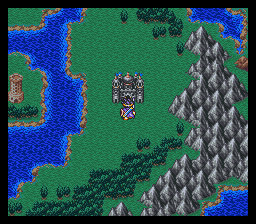

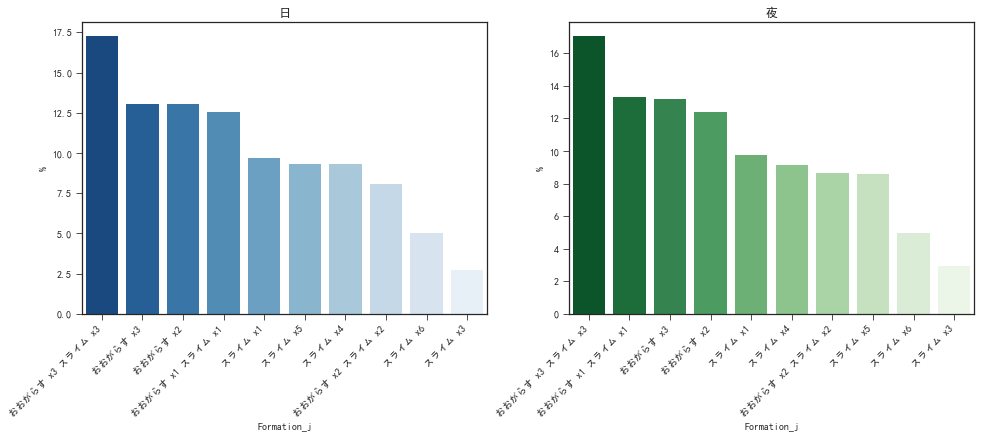

日:
                  Formation_j          %
おおがらす x3 スライム x3         1727  17.271727
おおがらす x3                 1304  13.041304
おおがらす x2                 1302  13.021302
おおがらす x1 スライム x1         1257  12.571257
スライム x1                   971   9.710971
スライム x5                   931   9.310931
スライム x4                   929   9.290929
おおがらす x2 スライム x2          805   8.050805
スライム x6                   503   5.030503
スライム x3                   270   2.700270
-----
夜:
                  Formation_j          %
おおがらす x3 スライム x3         1706  17.061706
おおがらす x1 スライム x1         1331  13.311331
おおがらす x3                 1320  13.201320
おおがらす x2                 1237  12.371237
スライム x1                   977   9.770977
スライム x4                   914   9.140914
おおがらす x2 スライム x2          863   8.630863
スライム x5                   858   8.580858
スライム x6                   499   4.990499
スライム x3                   294   2.940294

-----


**Reeve**

**Overworld zone hex: 0x06**

-----


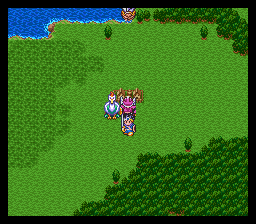

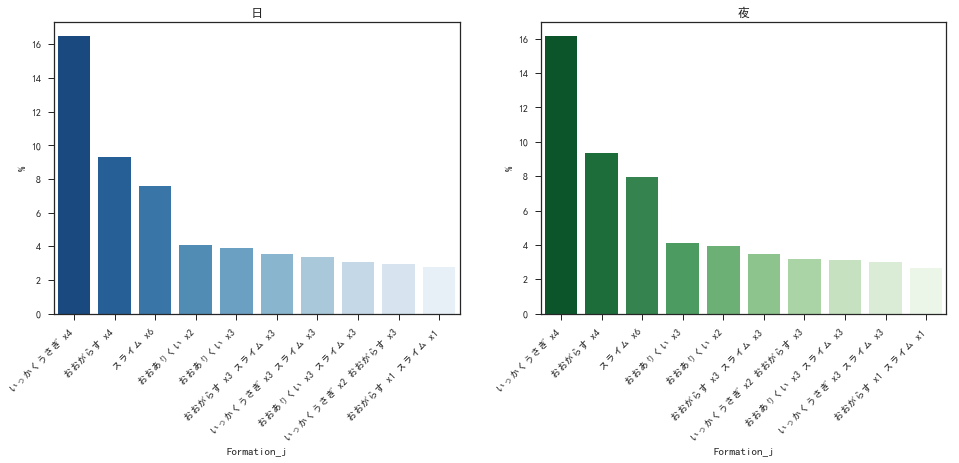

日:
                                       Formation_j          %
いっかくうさぎ x4                                    1649  16.491649
おおがらす x4                                       930   9.300930
スライム x6                                        755   7.550755
おおありくい x2                                      408   4.080408
おおありくい x3                                      388   3.880388
おおがらす x3 スライム x3                               356   3.560356
いっかくうさぎ x3 スライム x3                             335   3.350335
おおありくい x3 スライム x3                              305   3.050305
いっかくうさぎ x2 おおがらす x3                            292   2.920292
おおがらす x1 スライム x1                               276   2.760276
いっかくうさぎ x1 おおがらす x1                            251   2.510251
おおありくい x1 スライム x1                              246   2.460246
いっかくうさぎ x1 スライム x1                             245   2.450245
おおがらす x3                                       234   2.340234
おおありくい x1 おおがらす x1                             229   2.290229
いっかくう

**To Magic Ball**

**Overworld zone hex: 0x07**

-----


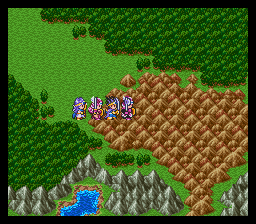

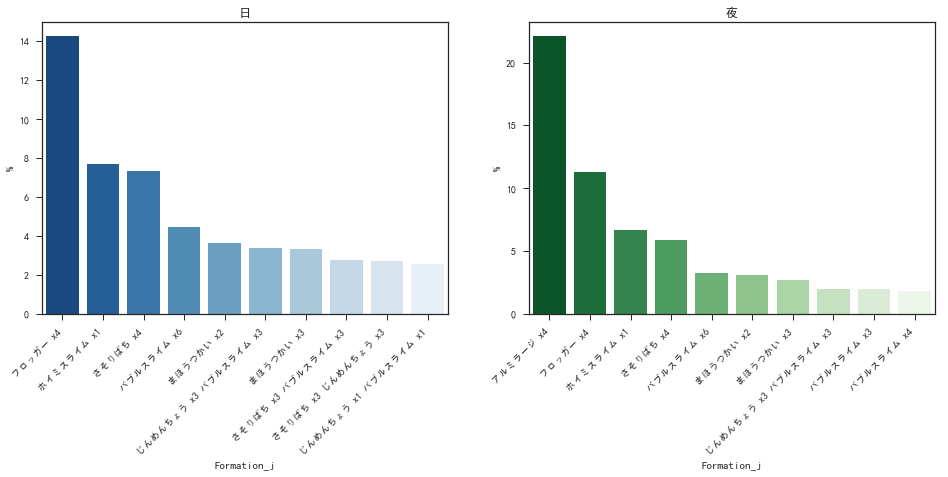

日:
                                         Formation_j          %
フロッガー x4                                        1426  14.261426
ホイミスライム x1                                       770   7.700770
さそりばち x4                                         733   7.330733
バブルスライム x6                                       447   4.470447
まほうつかい x2                                        364   3.640364
じんめんちょう x3 バブルスライム x3                            341   3.410341
まほうつかい x3                                        333   3.330333
さそりばち x3 バブルスライム x3                              277   2.770277
さそりばち x3 じんめんちょう x3                              271   2.710271
じんめんちょう x1 バブルスライム x1                            254   2.540254
バブルスライム x4                                       239   2.390239
バブルスライム x1 フロッガー x1                              229   2.290229
じんめんちょう x1 フロッガー x1                              228   2.280228
バブルスライム x3                                       221   2.210221
さそりばち x1 バブルスライム x1                  

**Romaly**

**Overworld zone hex: 0x08**

-----


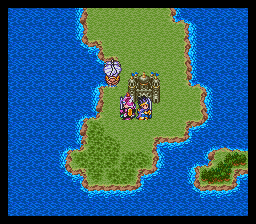

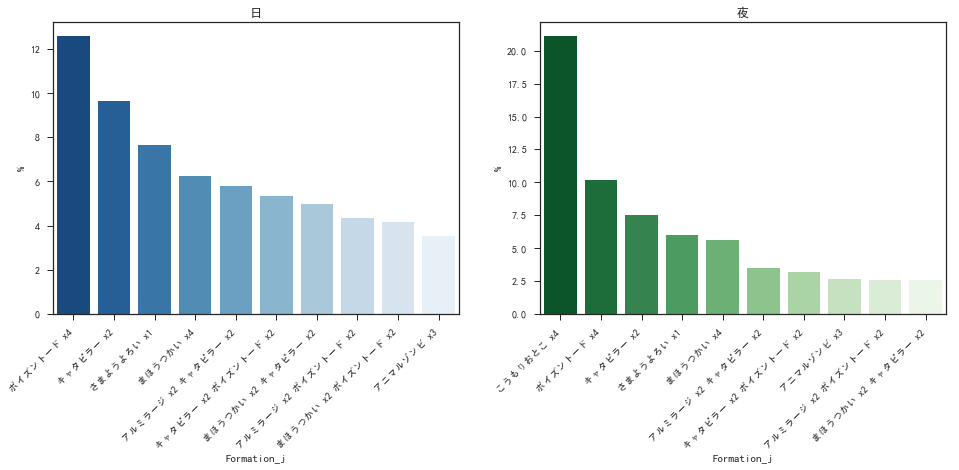

日:
                                          Formation_j          %
ポイズントード x4                                       1260  12.601260
キャタピラー x2                                         965   9.650965
さまようよろい x1                                        767   7.670767
まほうつかい x4                                         624   6.240624
アルミラージ x2 キャタピラー x2                               579   5.790579
キャタピラー x2 ポイズントード x2                              535   5.350535
まほうつかい x2 キャタピラー x2                               499   4.990499
アルミラージ x2 ポイズントード x2                              435   4.350435
まほうつかい x2 ポイズントード x2                              415   4.150415
アニマルゾンビ x3                                        351   3.510351
アニマルゾンビ x2                                        337   3.370337
まほうつかい x2 アルミラージ x2                               336   3.360336
まほうつかい x1 アルミラージ x1 キャタピラー x1 ポイズントード x1          318   3.180318
アルミラージ x1 キャタピラー x1                               295   2.950295
キャタピラー x1 ポイズントード x1  

**Kazave**

**Overworld zone hex: 0x09**

-----


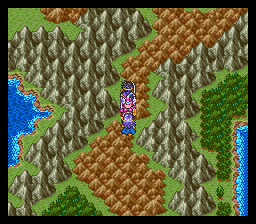

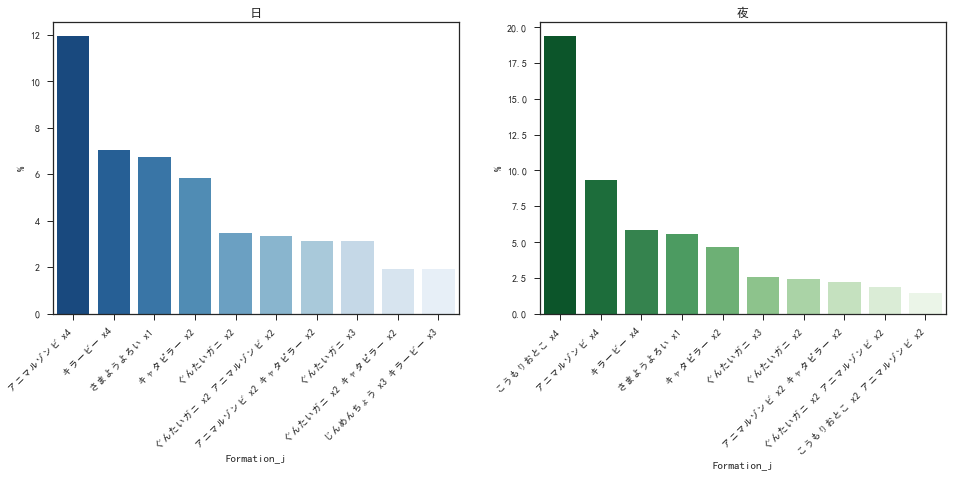

日:
                                           Formation_j          %
アニマルゾンビ x4                                        1194  11.941194
キラービー x4                                           705   7.050705
さまようよろい x1                                         672   6.720672
キャタピラー x2                                          585   5.850585
ぐんたいガニ x2                                          347   3.470347
ぐんたいガニ x2 アニマルゾンビ x2                               332   3.320332
アニマルゾンビ x2 キャタピラー x2                               314   3.140314
ぐんたいガニ x3                                          313   3.130313
ぐんたいガニ x2 キャタピラー x2                                193   1.930193
じんめんちょう x3 キラービー x3                                191   1.910191
アニマルゾンビ x1 キャタピラー x1                               191   1.910191
アニマルゾンビ x1 キラービー x1                                186   1.860186
じんめんちょう x1 アニマルゾンビ x1                              183   1.830183
じんめんちょう x3 キャタピラー x2                               177   1.770177
キャタピラー 

**Portoga**

**Overworld zone hex: 0x0F**

-----


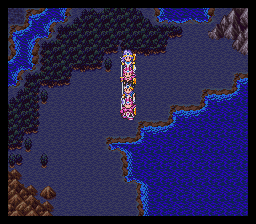

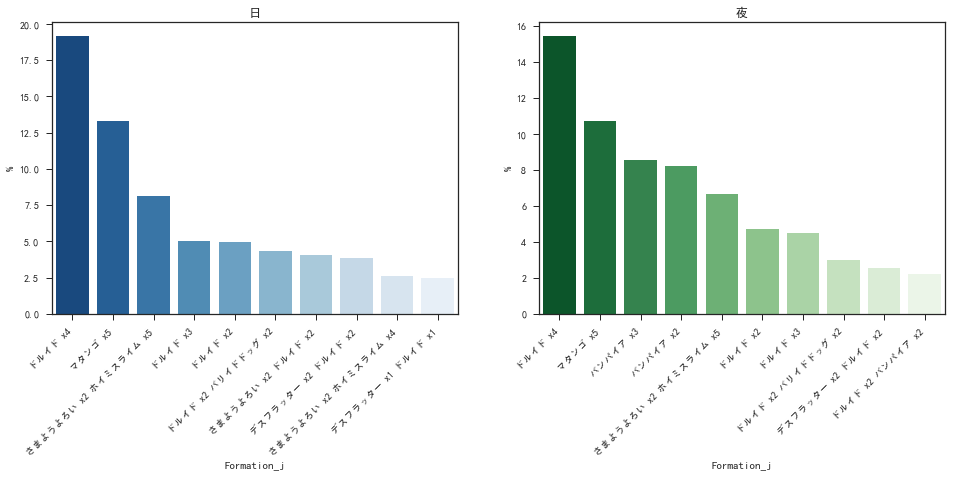

日:
                                          Formation_j          %
ドルイド x4                                          1917  19.171917
マタンゴ x5                                          1329  13.291329
さまようよろい x2 ホイミスライム x5                             812   8.120812
ドルイド x3                                           505   5.050505
ドルイド x2                                           495   4.950495
ドルイド x2 バリイドドッグ x2                                433   4.330433
さまようよろい x2 ドルイド x2                                403   4.030403
デスフラッター x2 ドルイド x2                                382   3.820382
さまようよろい x2 ホイミスライム x4                             263   2.630263
デスフラッター x1 ドルイド x1                                245   2.450245
ドルイド x1 バリイドドッグ x1                                227   2.270227
さまようよろい x2 バリイドドッグ x2                             222   2.220222
デスフラッター x1 バリイドドッグ x1                             179   1.790179
デスフラッター x3 ドルイド x2                                155   1.550155
ドルイド x1 ドルイド x1       

**To Assalam**

**Overworld zone hex: 0x0C**

-----


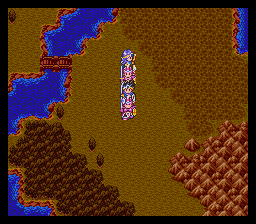

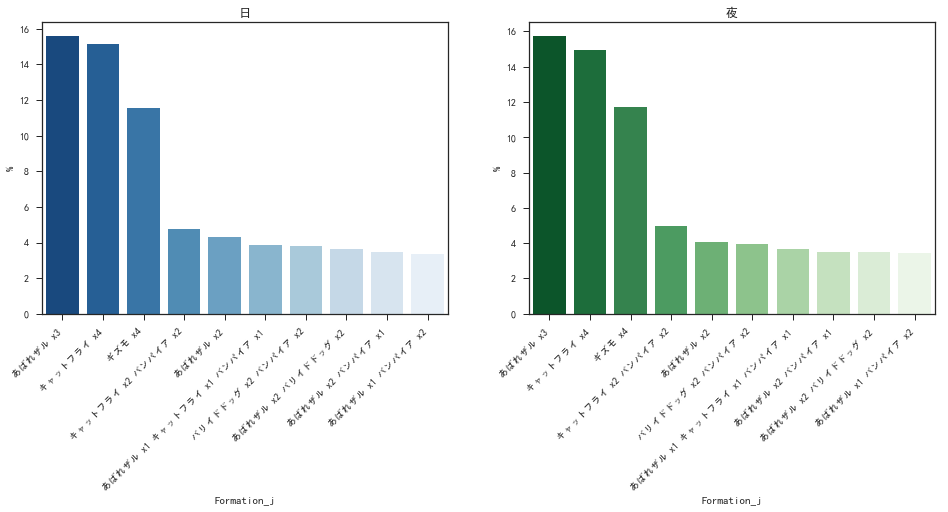

日:
                                         Formation_j          %
あばれザル x3                                        1559  15.591559
キャットフライ x4                                      1516  15.161516
ギズモ x4                                          1153  11.531153
キャットフライ x2 バンパイア x2                              473   4.730473
あばれザル x2                                         431   4.310431
あばれザル x1 キャットフライ x1 バンパイア x1                     387   3.870387
バリイドドッグ x2 バンパイア x2                              382   3.820382
あばれザル x2 バリイドドッグ x2                              361   3.610361
あばれザル x2 バンパイア x1                                348   3.480348
あばれザル x1 バンパイア x2                                334   3.340334
あばれザル x1 バンパイア x1                                332   3.320332
あばれザル x2 キャットフライ x1                              321   3.210321
どくイモムシ x1                                        294   2.940294
あばれザル x1 キャットフライ x1                              232   2.320232
キャットフライ x1 バンパイア x1                  

**Desert**

**Overworld zone hex: 0x0D**

-----


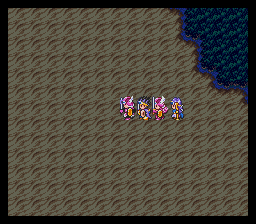

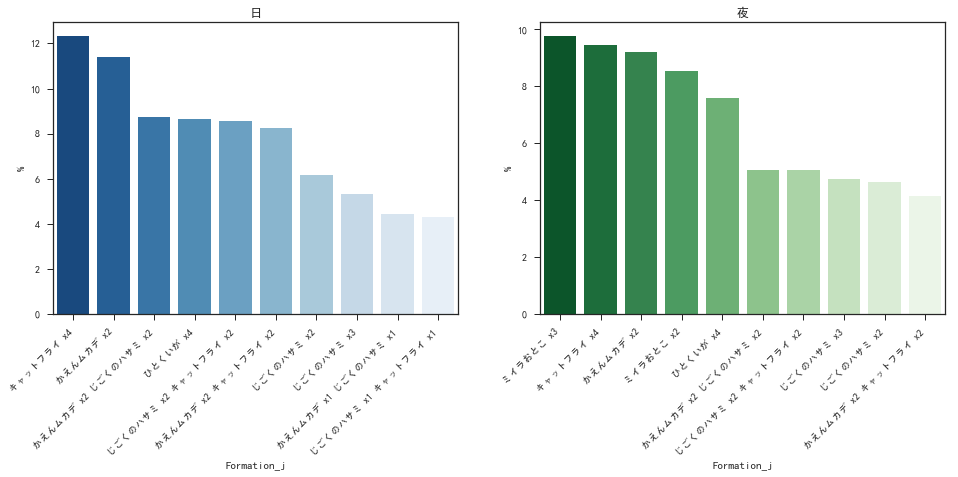

日:
                       Formation_j          %
キャットフライ x4                    1232  12.321232
かえんムカデ x2                     1139  11.391139
かえんムカデ x2 じごくのハサミ x2           873   8.730873
ひとくいが x4                       863   8.630863
じごくのハサミ x2 キャットフライ x2          857   8.570857
かえんムカデ x2 キャットフライ x2           824   8.240824
じごくのハサミ x2                     615   6.150615
じごくのハサミ x3                     530   5.300530
かえんムカデ x1 じごくのハサミ x1           444   4.440444
じごくのハサミ x1 キャットフライ x1          430   4.300430
かえんムカデ x1 キャットフライ x1           350   3.500350
おばけキノコ x1 キャットフライ x3           293   2.930293
じごくのハサミ x1 じごくのハサミ x1          285   2.850285
おばけキノコ x1 じごくのハサミ x3           275   2.750275
おばけキノコ x1 かえんムカデ x2            263   2.630263
じごくのハサミ x4                     245   2.450245
ひとくいが x3                       206   2.060206
じごくのハサミ x2 じごくのハサミ x2          169   1.690169
じごくのハサミ x1 じごくのハサミ x3          106   1.060106
-----
夜:
                       Formation_j         %
ミイラおとこ x3              

**Isis**

**Overworld zone hex: 0x0E**

-----


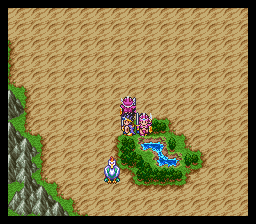

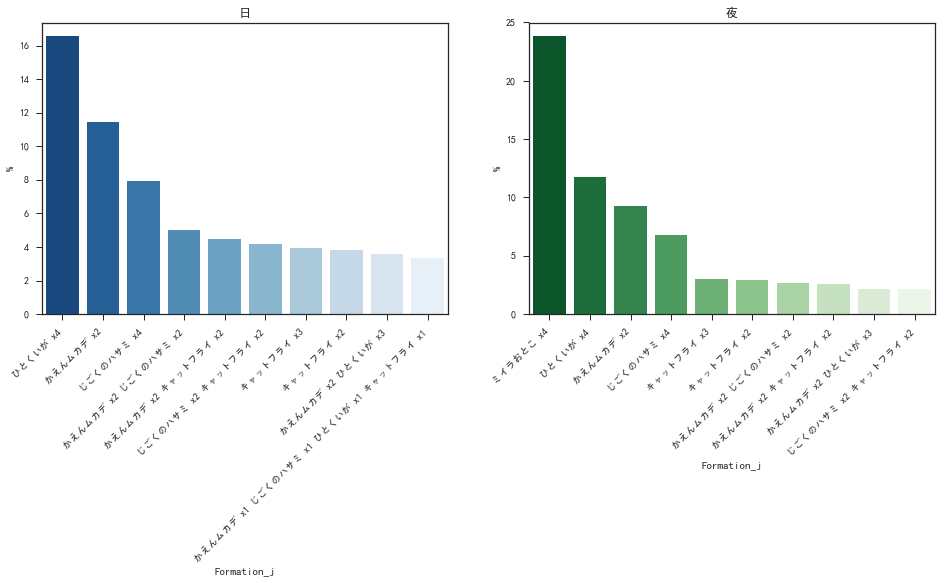

日:
                                          Formation_j          %
ひとくいが x4                                         1654  16.541654
かえんムカデ x2                                        1147  11.471147
じごくのハサミ x4                                        792   7.920792
かえんムカデ x2 じごくのハサミ x2                              499   4.990499
かえんムカデ x2 キャットフライ x2                              448   4.480448
じごくのハサミ x2 キャットフライ x2                             416   4.160416
キャットフライ x3                                        396   3.960396
キャットフライ x2                                        382   3.820382
かえんムカデ x2 ひとくいが x3                                356   3.560356
かえんムカデ x1 じごくのハサミ x1 ひとくいが x1 キャットフライ x1          335   3.350335
ひとくいが x3 キャットフライ x2                               325   3.250325
じごくのハサミ x2 ひとくいが x2                               292   2.920292
かえんムカデ x1 ひとくいが x1                                254   2.540254
かえんムカデ x1 じごくのハサミ x1                              249   2.490249
ひとくいが x1 キャットフライ x1   

**Baharata (1)**

**Overworld zone hex: 0x10**

-----


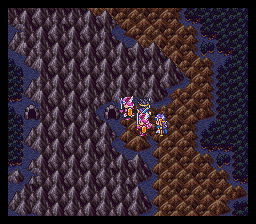

**Day chance to see metal: 0.0%**

**Night chance to see metal: 7.59%**

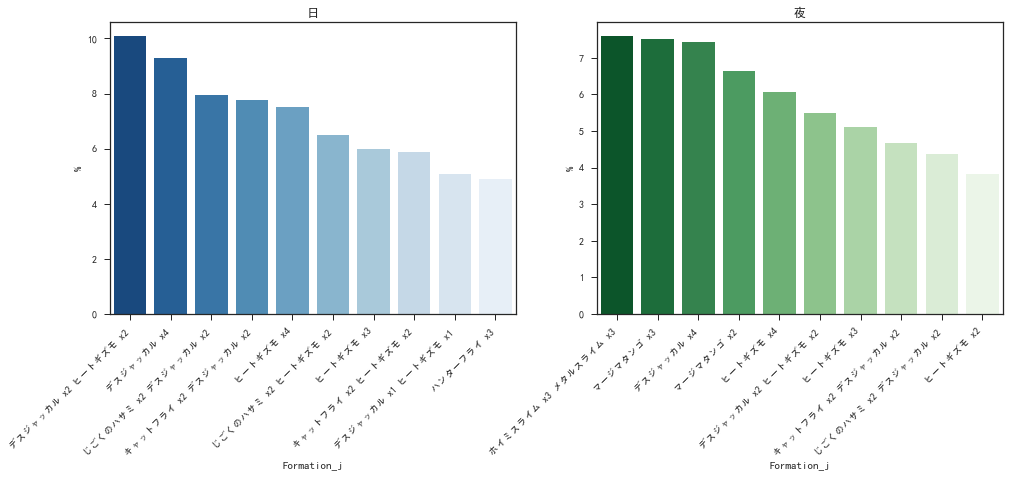

日:
                       Formation_j          %
デスジャッカル x2 ヒートギズモ x2          1008  10.081008
デスジャッカル x4                     930   9.300930
じごくのハサミ x2 デスジャッカル x2          795   7.950795
キャットフライ x2 デスジャッカル x2          775   7.750775
ヒートギズモ x4                      752   7.520752
じごくのハサミ x2 ヒートギズモ x2           651   6.510651
ヒートギズモ x3                      599   5.990599
キャットフライ x2 ヒートギズモ x2           589   5.890589
デスジャッカル x1 ヒートギズモ x1           507   5.070507
ハンターフライ x3                     489   4.890489
ヒートギズモ x2                      483   4.830483
ハンターフライ x2                     429   4.290429
じごくのハサミ x2 キャットフライ x2          419   4.190419
じごくのハサミ x1 デスジャッカル x1          361   3.610361
キャットフライ x1 デスジャッカル x1          354   3.540354
じごくのハサミ x1 ヒートギズモ x1           340   3.400340
キャットフライ x1 ヒートギズモ x1           297   2.970297
じごくのハサミ x1 キャットフライ x1          221   2.210221
-----
夜:
                       Formation_j         %
ホイミスライム x3 メタルスライム x3          759  7.590759
マージマタンゴ x3              

**Baharata (2)**

**Overworld zone hex: 0x11**

-----


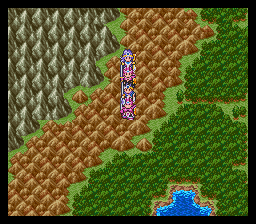

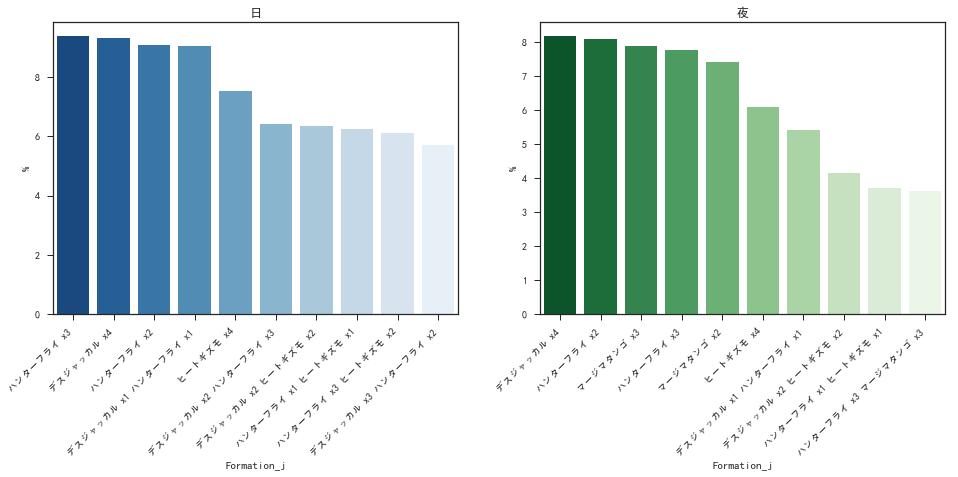

日:
                       Formation_j         %
ハンターフライ x3                     938  9.380938
デスジャッカル x4                     932  9.320932
ハンターフライ x2                     907  9.070907
デスジャッカル x1 ハンターフライ x1          905  9.050905
ヒートギズモ x4                      752  7.520752
デスジャッカル x2 ハンターフライ x3          640  6.400640
デスジャッカル x2 ヒートギズモ x2           635  6.350635
ハンターフライ x1 ヒートギズモ x1           623  6.230623
ハンターフライ x3 ヒートギズモ x2           612  6.120612
デスジャッカル x3 ハンターフライ x2          569  5.690569
デスジャッカル x2 ハンターフライ x2          568  5.680568
ハンターフライ x2 ヒートギズモ x2           486  4.860486
ハンターフライ x4 ホイミスライム x1          348  3.480348
デスジャッカル x1 ヒートギズモ x1           300  3.000300
ハンターフライ x2 ヒートギズモ x3           282  2.820282
デスジャッカル x4 ホイミスライム x1          180  1.800180
ヒートギズモ x4 ホイミスライム x1           164  1.640164
ヒートギズモ x3                      158  1.580158
-----
夜:
                       Formation_j         %
デスジャッカル x4                     818  8.180818
ハンターフライ x2                     811  8.11081

**Baharata (3)**

**Overworld zone hex: 0x12**

-----


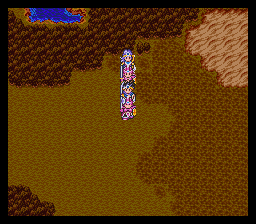

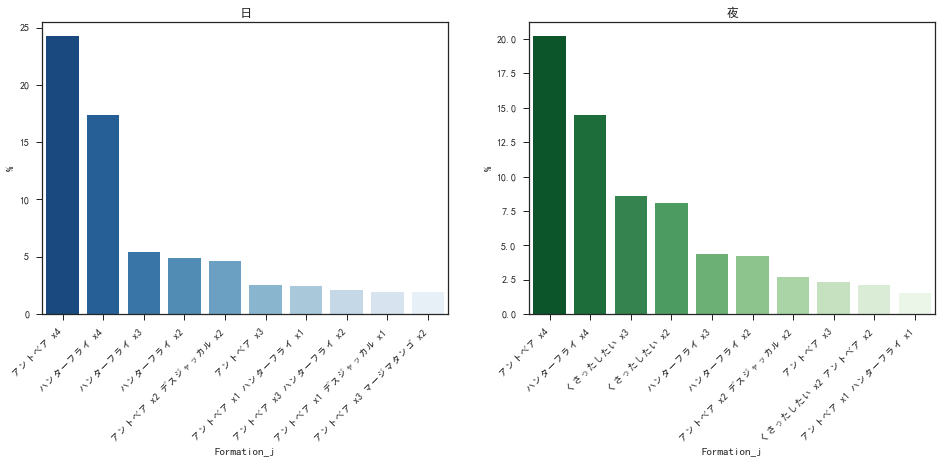

日:
                                           Formation_j          %
アントべア x4                                          2423  24.232423
ハンターフライ x4                                        1736  17.361736
ハンターフライ x3                                         540   5.400540
ハンターフライ x2                                         493   4.930493
アントべア x2 デスジャッカル x2                                463   4.630463
アントべア x3                                           255   2.550255
アントべア x1 ハンターフライ x1                                241   2.410241
アントべア x3 ハンターフライ x2                                213   2.130213
アントべア x1 デスジャッカル x1                                193   1.930193
アントべア x3 マージマタンゴ x2                                191   1.910191
アントべア x1 マージマタンゴ x1                                177   1.770177
ハンターフライ x3 マージマタンゴ x3                              175   1.750175
デスジャッカル x1 ハンターフライ x1                              175   1.750175
アントべア x2 ハンターフライ x3                                153   1.530153
アントべア x

**To Kandar 2**

**Overworld zone hex: 0x13**

-----


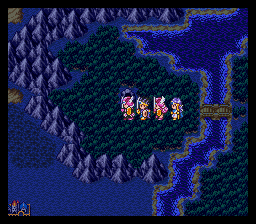

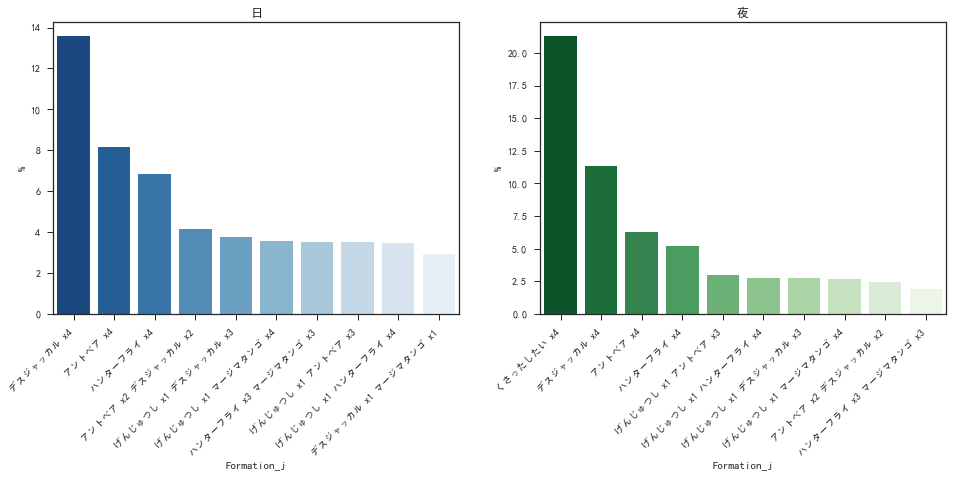

日:
                                           Formation_j          %
デスジャッカル x4                                        1357  13.571357
アントべア x4                                           817   8.170817
ハンターフライ x4                                         683   6.830683
アントべア x2 デスジャッカル x2                                413   4.130413
げんじゅつし x1 デスジャッカル x3                               377   3.770377
げんじゅつし x1 マージマタンゴ x4                               355   3.550355
ハンターフライ x3 マージマタンゴ x3                              354   3.540354
げんじゅつし x1 アントべア x3                                 353   3.530353
げんじゅつし x1 ハンターフライ x4                               349   3.490349
デスジャッカル x1 マージマタンゴ x1                              293   2.930293
ハンターフライ x1 マージマタンゴ x1                              254   2.540254
アントべア x1 マージマタンゴ x1                                240   2.400240
アントべア x2 マージマタンゴ x3                                231   2.310231
デスジャッカル x2 マージマタンゴ x3                              223   2.230223
デスジャッカル

**Dhama (1)**

**Overworld zone hex: 0x15**

-----


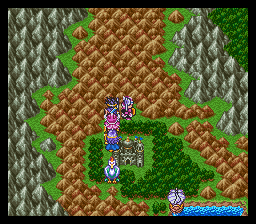

**Day chance to see metal: 21.35%**

**Night chance to see metal: 13.92%**

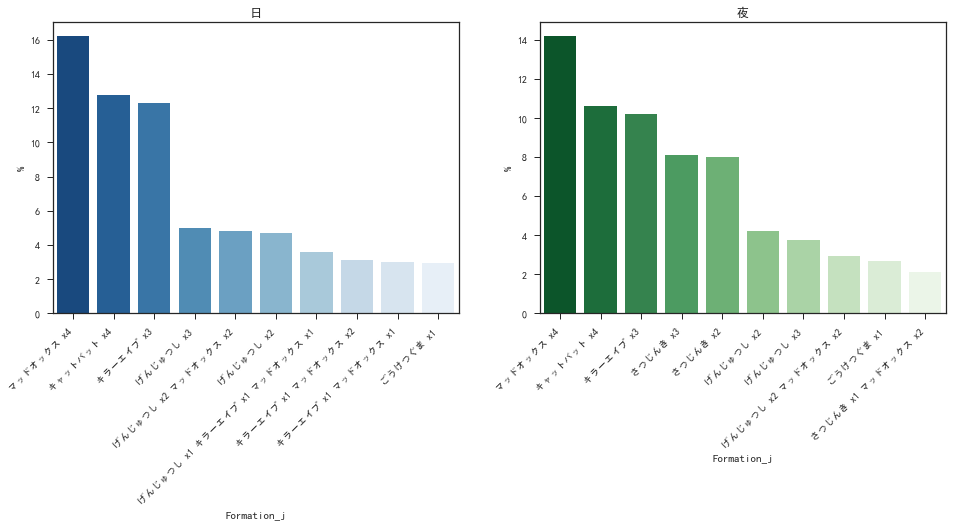

日:
                                           Formation_j          %
マッドオックス x4                                        1625  16.251625
キャットバット x4                                        1278  12.781278
キラーエイプ x3                                         1229  12.291229
げんじゅつし x3                                          498   4.980498
げんじゅつし x2 マッドオックス x2                               484   4.840484
げんじゅつし x2                                          469   4.690469
げんじゅつし x1 キラーエイプ x1 マッドオックス x1                     360   3.600360
キラーエイプ x1 マッドオックス x2                               314   3.140314
キラーエイプ x1 マッドオックス x1                               301   3.010301
ごうけつぐま x1                                          294   2.940294
げんじゅつし x1 マッドオックス x1                               259   2.590259
げんじゅつし x1 キラーエイプ x2                                222   2.220222
マッドオックス x1 メタルスライム x1                              202   2.020202
キラーエイプ x2 マッドオックス x1                               199   1.990199
げんじゅつし 

**Dhama (2)**

**Overworld zone hex: 0x16**

-----


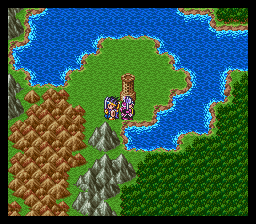

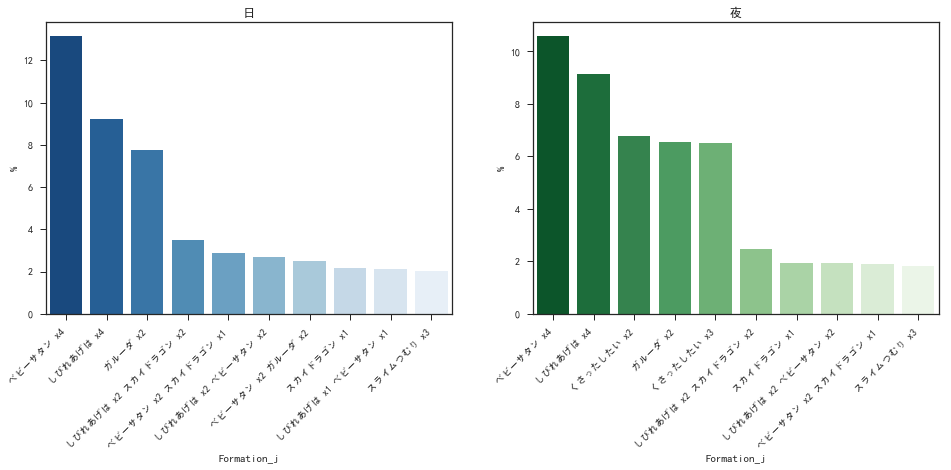

日:
                                           Formation_j          %
べビーサタン x4                                         1314  13.141314
しびれあげは x4                                          922   9.220922
ガルーダ x2                                            775   7.750775
しびれあげは x2 スカイドラゴン x2                               347   3.470347
べビーサタン x2 スカイドラゴン x1                               286   2.860286
しびれあげは x2 べビーサタン x2                                267   2.670267
べビーサタン x2 ガルーダ x2                                  250   2.500250
スカイドラゴン x1                                         215   2.150215
しびれあげは x1 べビーサタン x1                                211   2.110211
スライムつむり x3                                         205   2.050205
スライムつむり x5                                         193   1.930193
しびれあげは x3 ガルーダ x2                                  186   1.860186
べビーサタン x3 スライムつむり x3                               186   1.860186
べビーサタン x1 スカイドラゴン x1                               175   1.750175
しびれあげは 

**Samanosa (1)**

**Overworld zone hex: 0x27**

-----


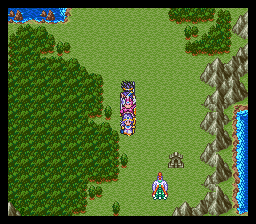

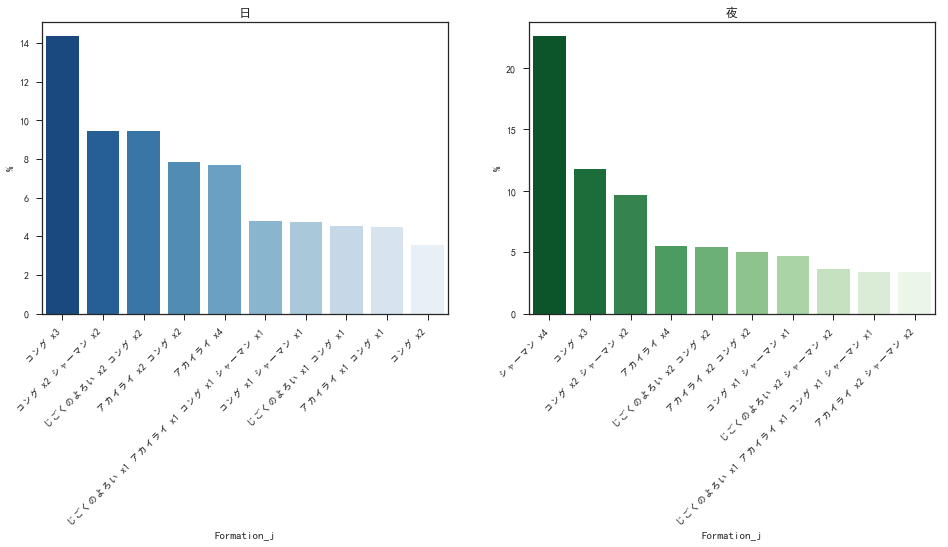

日:
                                     Formation_j          %
コング x3                                      1437  14.371437
コング x2 シャーマン x2                              945   9.450945
じごくのよろい x2 コング x2                            943   9.430943
アカイライ x2 コング x2                              784   7.840784
アカイライ x4                                     768   7.680768
じごくのよろい x1 アカイライ x1 コング x1 シャーマン x1          478   4.780478
コング x1 シャーマン x1                              473   4.730473
じごくのよろい x1 コング x1                            454   4.540454
アカイライ x1 コング x1                              446   4.460446
コング x2                                       356   3.560356
じごくのよろい x2 アカイライ x2                          353   3.530353
じごくのよろい x2 シャーマン x2                          334   3.340334
アカイライ x2 シャーマン x2                            317   3.170317
じごくのよろい x1 シャーマン x1                          209   2.090209
アカイライ x1 シャーマン x1                            173   1.730173
アカイライ x1 コング x2 シャーマン x1             

**Samanosa (2)**

**Overworld zone hex: 0x2A**

-----


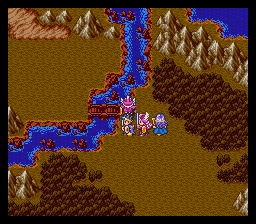

**Day chance to see metal: 8.75%**

**Night chance to see metal: 9.05%**

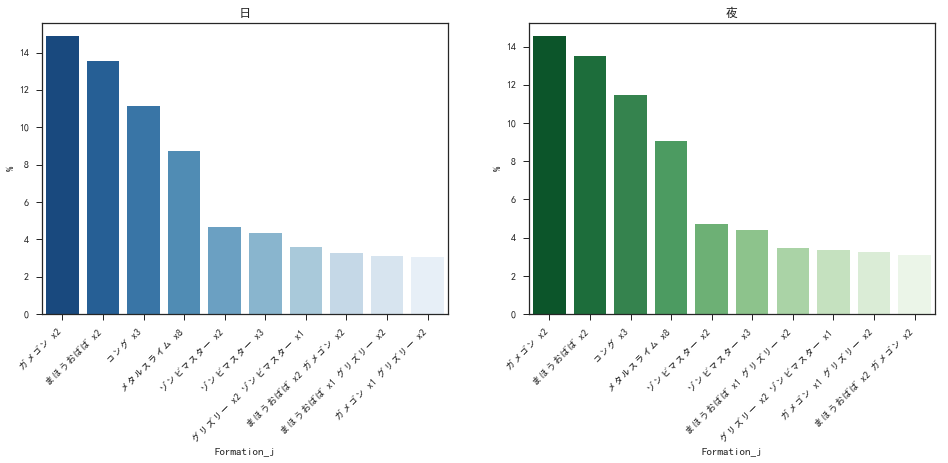

日:
                                        Formation_j          %
ガメゴン x2                                        1486  14.861486
まほうおばば x2                                      1353  13.531353
コング x3                                         1114  11.141114
メタルスライム x8                                      875   8.750875
ゾンビマスター x2                                      468   4.680468
ゾンビマスター x3                                      432   4.320432
グリズリー x2 ゾンビマスター x1                             361   3.610361
まほうおばば x2 ガメゴン x2                               327   3.270327
まほうおばば x1 グリズリー x2                              313   3.130313
ガメゴン x1 グリズリー x2                                306   3.060306
まほうおばば x1 ガメゴン x1 グリズリー x1                      255   2.550255
ガメゴン x1                                         250   2.500250
まほうおばば x1 グリズリー x1                              249   2.490249
ガメゴン x1 グリズリー x1                                249   2.490249
まほうおばば x2 ゾンビマスター x2                            225 

**Samanosa (3)**

**Overworld zone hex: 0x27**

-----


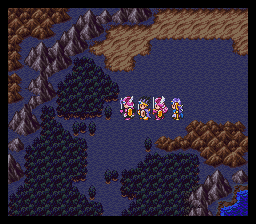

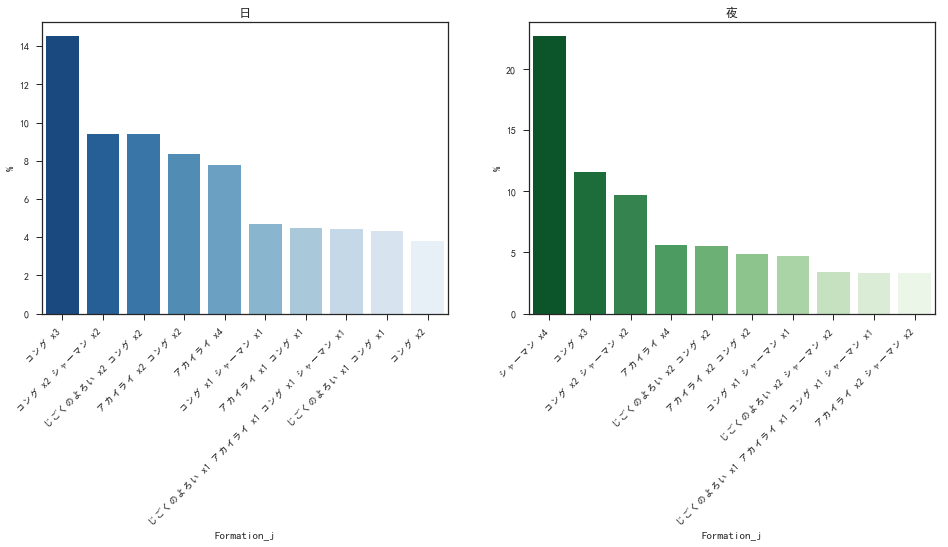

日:
                                     Formation_j          %
コング x3                                      1454  14.541454
コング x2 シャーマン x2                              941   9.410941
じごくのよろい x2 コング x2                            940   9.400940
アカイライ x2 コング x2                              836   8.360836
アカイライ x4                                     780   7.800780
コング x1 シャーマン x1                              468   4.680468
アカイライ x1 コング x1                              450   4.500450
じごくのよろい x1 アカイライ x1 コング x1 シャーマン x1          445   4.450445
じごくのよろい x1 コング x1                            432   4.320432
コング x2                                       378   3.780378
じごくのよろい x2 シャーマン x2                          352   3.520352
じごくのよろい x2 アカイライ x2                          352   3.520352
アカイライ x2 シャーマン x2                            336   3.360336
じごくのよろい x1 シャーマン x1                          183   1.830183
アカイライ x1 シャーマン x1                            174   1.740174
じごくのよろい x1 アカイライ x1                  

**Samanosa (4)**

**Overworld zone hex: 0x2B**

-----


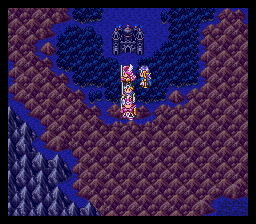

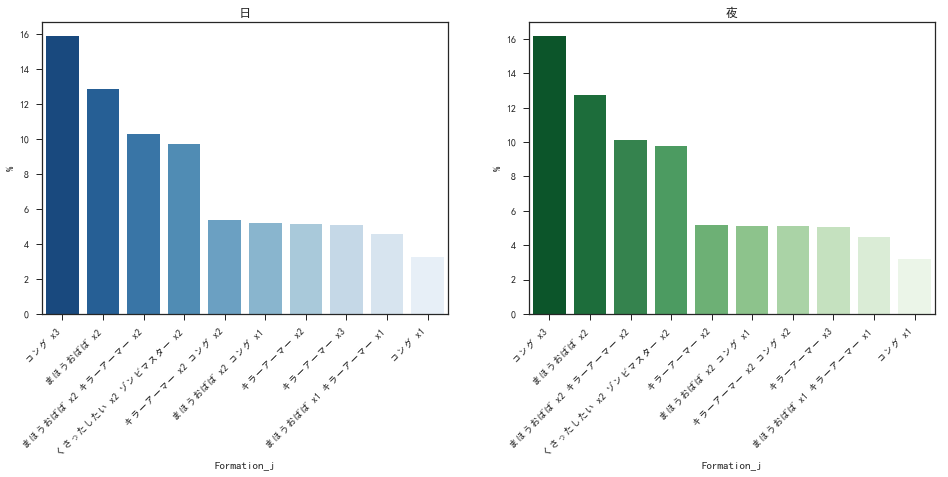

日:
                                            Formation_j          %
コング x3                                             1587  15.871587
まほうおばば x2                                          1286  12.861286
まほうおばば x2 キラーアーマー x2                               1030  10.301030
くさったしたい x2 ゾンビマスター x2                               971   9.710971
キラーアーマー x2 コング x2                                   539   5.390539
まほうおばば x2 コング x1                                    519   5.190519
キラーアーマー x2                                          516   5.160516
キラーアーマー x3                                          509   5.090509
まほうおばば x1 キラーアーマー x1                                455   4.550455
コング x1                                              323   3.230323
まほうおばば x1 コング x1                                    287   2.870287
まほうおばば x2 キラーアーマー x1 コング x1                         252   2.520252
キラーアーマー x1 コング x1                                   251   2.510251
まほうおばば x1 キラーアーマー x1 コング x1                         225   2

**Edinbear**

**Overworld zone hex: 0x1F**

-----


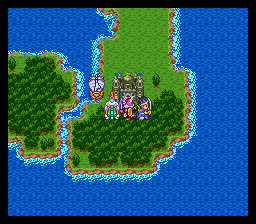

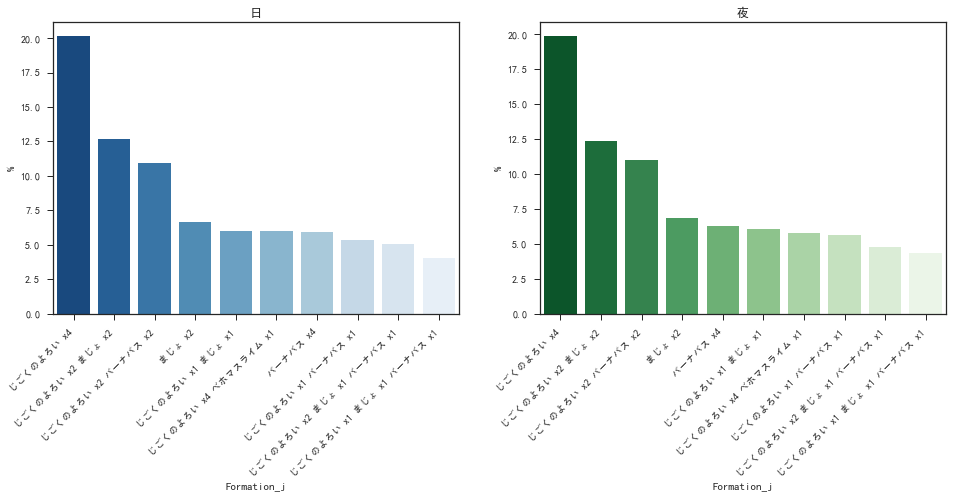

日:
                            Formation_j          %
じごくのよろい x4                         2014  20.142014
じごくのよろい x2 まじょ x2                  1266  12.661266
じごくのよろい x2 バーナバス x2                1091  10.911091
まじょ x2                              668   6.680668
じごくのよろい x1 まじょ x1                   604   6.040604
じごくのよろい x4 べホマスライム x1               601   6.010601
バーナバス x4                            593   5.930593
じごくのよろい x1 バーナバス x1                 532   5.320532
じごくのよろい x2 まじょ x1 バーナバス x1          508   5.080508
じごくのよろい x1 まじょ x1 バーナバス x1          407   4.070407
まじょ x2 バーナバス x2                     366   3.660366
べホマスライム x1 バーナバス x3                 338   3.380338
べホマスライム x1 まじょ x2                   322   3.220322
じごくのよろい x1 まじょ x2 バーナバス x1          207   2.070207
じごくのよろい x3                          186   1.860186
まじょ x1 バーナバス x1                     162   1.620162
じごくのよろい x1 まじょ x1 バーナバス x2          134   1.340134
-----
夜:
                            Formation_j          %
じごくのよろい x4         

**Tedanki**

**Overworld zone hex: 0x1B**

-----


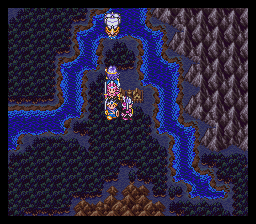

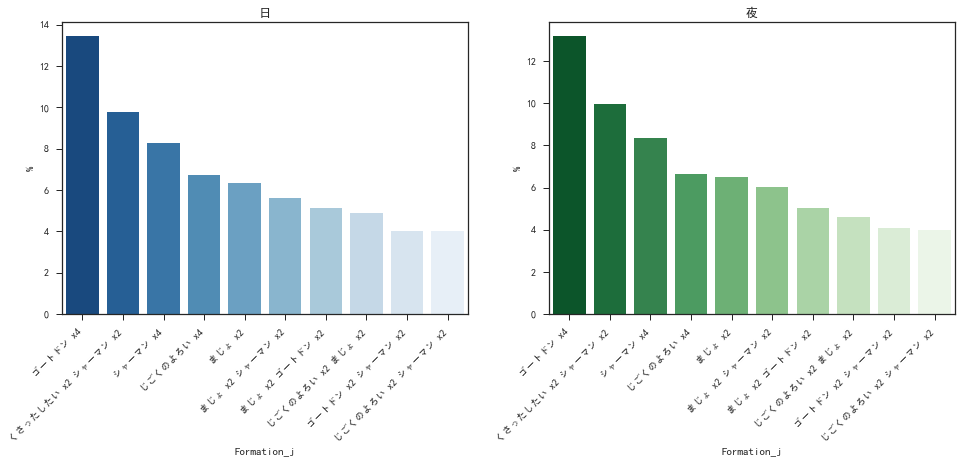

日:
                                     Formation_j          %
ゴートドン x4                                    1344  13.441344
くさったしたい x2 シャーマン x2                          979   9.790979
シャーマン x4                                     827   8.270827
じごくのよろい x4                                   673   6.730673
まじょ x2                                       635   6.350635
まじょ x2 シャーマン x2                              563   5.630563
まじょ x2 ゴートドン x2                              511   5.110511
じごくのよろい x2 まじょ x2                            487   4.870487
ゴートドン x2 シャーマン x2                            404   4.040404
じごくのよろい x2 シャーマン x2                          401   4.010401
じごくのよろい x2 ゴートドン x2                          339   3.390339
まじょ x1 シャーマン x1                              301   3.010301
じごくのよろい x1 まじょ x1 ゴートドン x1 シャーマン x1          297   2.970297
まじょ x1 ゴートドン x1                              267   2.670267
じごくのよろい x1 まじょ x1                            237   2.370237
じごくのよろい x1 シャーマン x1                  

**Necrogond**

**Overworld zone hex: 0x30**

-----


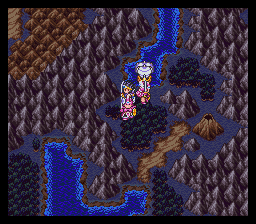

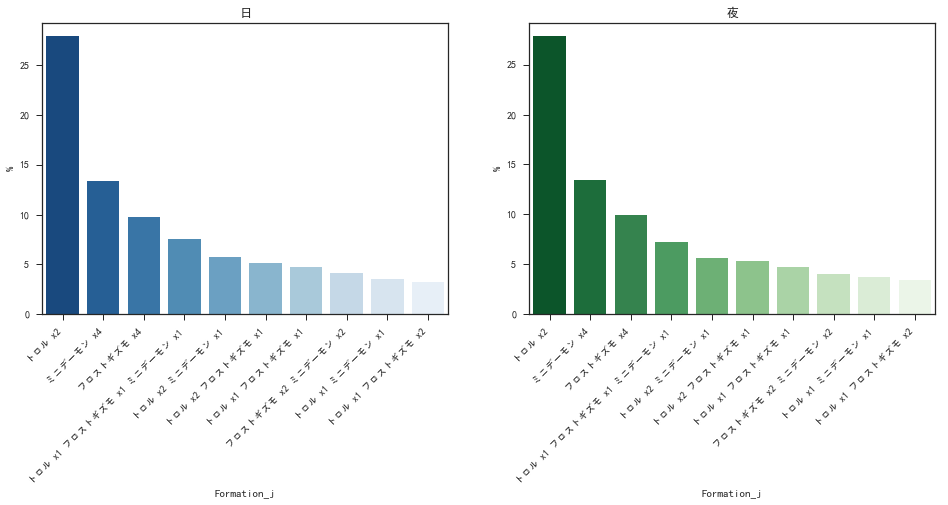

日:
                             Formation_j          %
トロル x2                              2788  27.882788
ミニデーモン x4                           1337  13.371337
フロストギズモ x4                           980   9.800980
トロル x1 フロストギズモ x1 ミニデーモン x1          756   7.560756
トロル x2 ミニデーモン x1                     574   5.740574
トロル x2 フロストギズモ x1                    518   5.180518
トロル x1 フロストギズモ x1                    476   4.760476
フロストギズモ x2 ミニデーモン x2                 413   4.130413
トロル x1 ミニデーモン x1                     353   3.530353
トロル x1 フロストギズモ x2                    323   3.230323
フロストギズモ x3                           287   2.870287
べホマスライム x1 フロストギズモ x4                240   2.400240
べホマスライム x1 トロル x2                    237   2.370237
べホマスライム x1 ミニデーモン x3                 234   2.340234
トロル x1 フロストギズモ x2 ミニデーモン x1          203   2.030203
フロストギズモ x1 ミニデーモン x1                 196   1.960196
トロル x1 ミニデーモン x2                      84   0.840084
-----
夜:
                             Formation_j          %


**Silver Orb Shrine**

**Overworld zone hex: 0x31**

-----


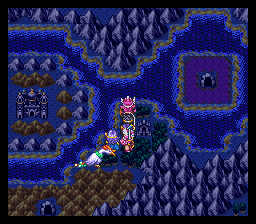

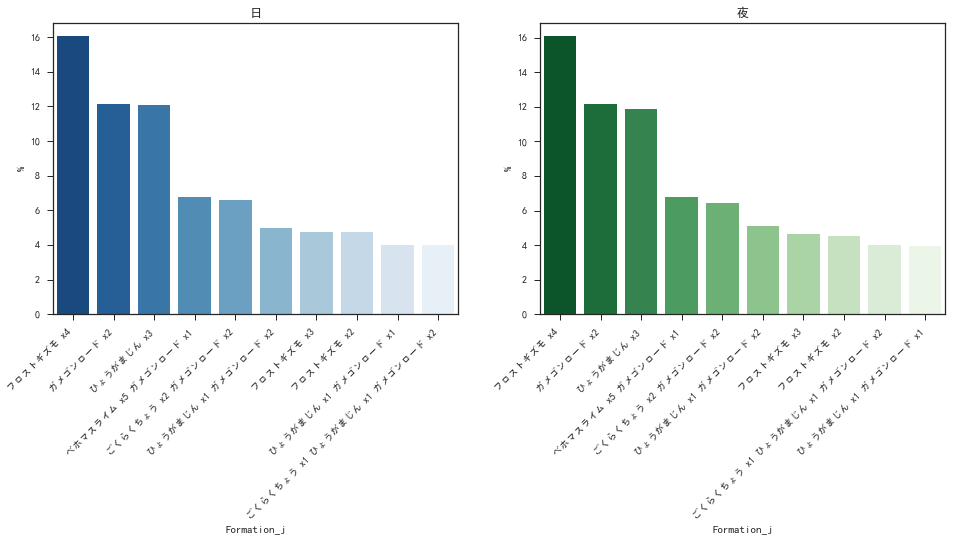

日:
                                  Formation_j          %
フロストギズモ x4                               1604  16.041604
ガメゴンロード x2                               1215  12.151215
ひょうがまじん x3                               1206  12.061206
べホマスライム x5 ガメゴンロード x1                     678   6.780678
ごくらくちょう x2 ガメゴンロード x2                     657   6.570657
ひょうがまじん x1 ガメゴンロード x2                     496   4.960496
フロストギズモ x3                                477   4.770477
フロストギズモ x2                                477   4.770477
ひょうがまじん x1 ガメゴンロード x1                     400   4.000400
ごくらくちょう x1 ひょうがまじん x1 ガメゴンロード x2          400   4.000400
ごくらくちょう x1 ガメゴンロード x1                     313   3.130313
ごくらくちょう x2 ひょうがまじん x2                     303   3.030303
ごくらくちょう x1 ひょうがまじん x1 ガメゴンロード x1          286   2.860286
べホマスライム x4 ガメゴンロード x1                     240   2.400240
ひょうがまじん x2 スノードラゴン x1                     240   2.400240
ごくらくちょう x2 スノードラゴン x1                     220   2.200220
ガメゴンロード x2 スノードラゴン x1       

**Merchant Town**

**Overworld zone hex: 0x20**

-----


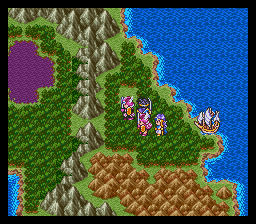

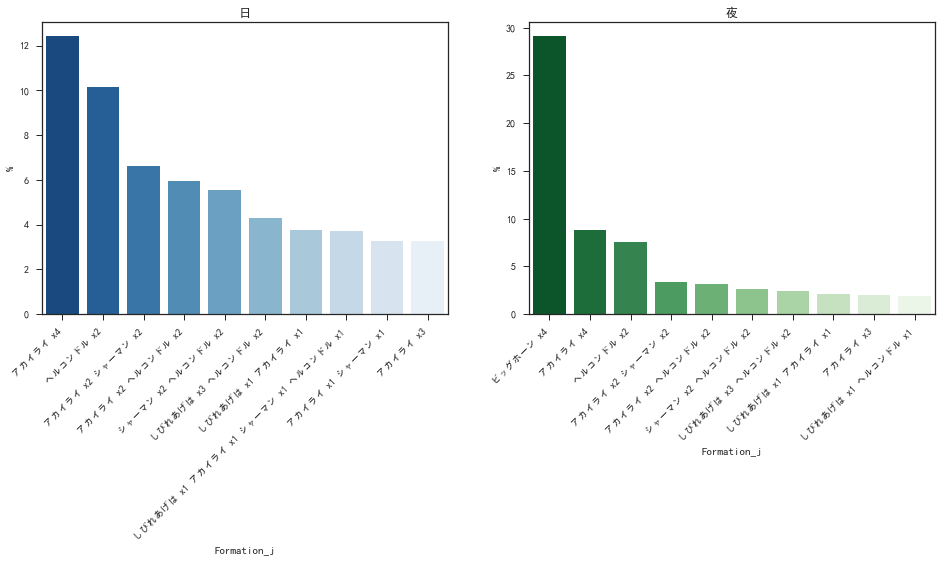

日:
                                       Formation_j          %
アカイライ x4                                      1242  12.421242
ヘルコンドル x2                                     1017  10.171017
アカイライ x2 シャーマン x2                              662   6.620662
アカイライ x2 ヘルコンドル x2                             595   5.950595
シャーマン x2 ヘルコンドル x2                             556   5.560556
しびれあげは x3 ヘルコンドル x2                            429   4.290429
しびれあげは x1 アカイライ x1                             377   3.770377
しびれあげは x1 アカイライ x1 シャーマン x1 ヘルコンドル x1          372   3.720372
アカイライ x1 シャーマン x1                              326   3.260326
アカイライ x3                                       325   3.250325
しびれあげは x1 ヘルコンドル x1                            315   3.150315
アカイライ x1 ヘルコンドル x1                             313   3.130313
しびれあげは x1 シャーマン x1                             306   3.060306
シャーマン x1 ヘルコンドル x1                             247   2.470247
しびれあげは x3 シャーマン x2                             236   2.360236
しびれあげ

**Lamia Shrine**

**Overworld zone hex: 0x1E**

-----


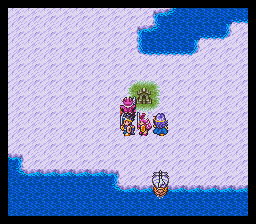

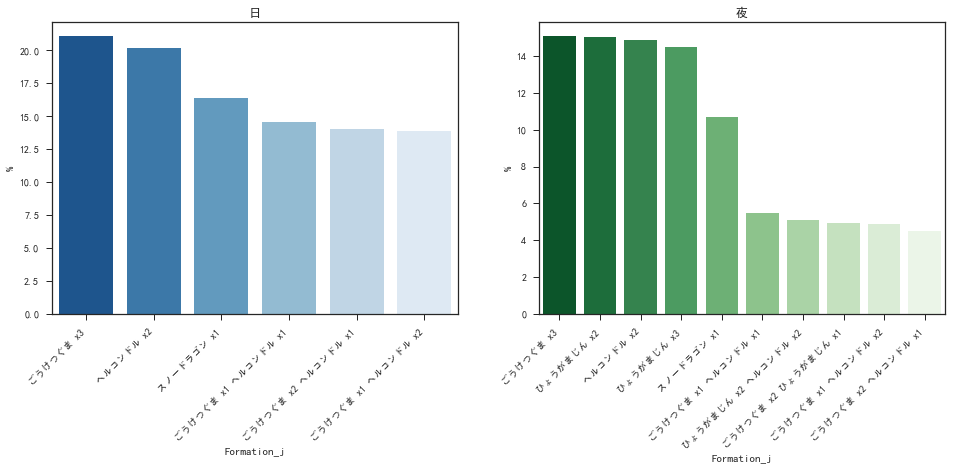

日:
                     Formation_j          %
ごうけつぐま x3                   2106  21.062106
ヘルコンドル x2                   2013  20.132013
スノードラゴン x1                  1634  16.341634
ごうけつぐま x1 ヘルコンドル x1         1458  14.581458
ごうけつぐま x2 ヘルコンドル x1         1400  14.001400
ごうけつぐま x1 ヘルコンドル x2         1388  13.881388
-----
夜:
                      Formation_j          %
ごうけつぐま x3                    1508  15.081508
ひょうがまじん x2                   1506  15.061506
ヘルコンドル x2                    1487  14.871487
ひょうがまじん x3                   1448  14.481448
スノードラゴン x1                   1069  10.691069
ごうけつぐま x1 ヘルコンドル x1           549   5.490549
ひょうがまじん x2 ヘルコンドル x2          511   5.110511
ごうけつぐま x2 ひょうがまじん x1          496   4.960496
ごうけつぐま x1 ヘルコンドル x2           490   4.900490
ごうけつぐま x2 ヘルコンドル x1           449   4.490449
ごうけつぐま x1 ひょうがまじん x1          264   2.640264
ひょうがまじん x1 ヘルコンドル x1          222   2.220222

-----


**To Ludatorm**

**Overworld zone hex: 0x10**

-----


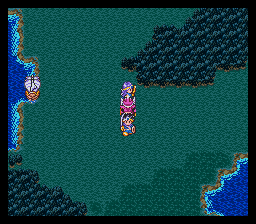

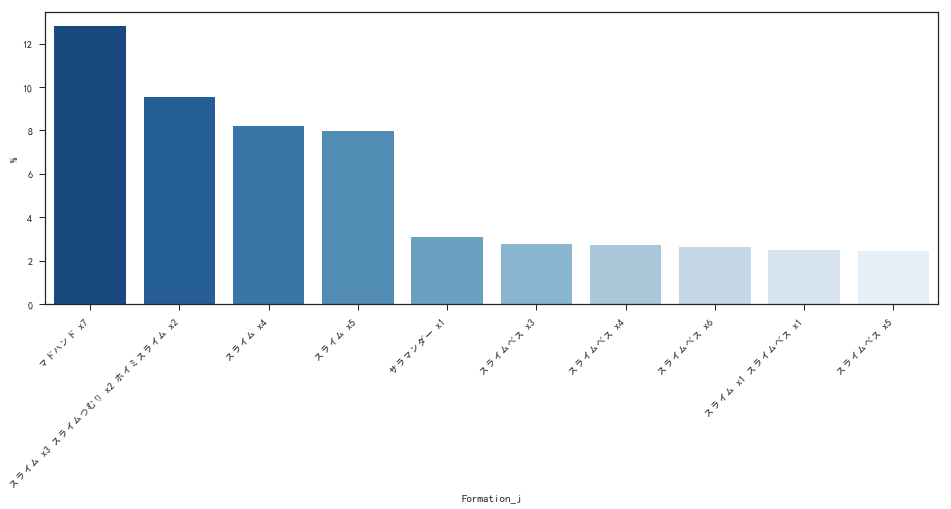

                                         Formation_j          %
マドハンド x7                                        1281  12.811281
スライム x3 スライムつむり x2 ホイミスライム x2                    952   9.520952
スライム x4                                          820   8.200820
スライム x5                                          799   7.990799
サラマンダー x1                                        307   3.070307
スライムべス x3                                        278   2.780278
スライムべス x4                                        272   2.720272
スライムべス x6                                        262   2.620262
スライム x1 スライムべス x1                                247   2.470247
スライムべス x5                                        243   2.430243
じごくのきし x3 スライムべス x3                              207   2.070207
スライムべス x7                                        206   2.060206
スライムべス x1 マドハンド x1                               205   2.050205
スライムべス x4 マドハンド x4                               197   1.970197
じごくのきし x2 マドハンド x2                      

**To Mountain Cave**

**Overworld zone hex: 0x11**

-----


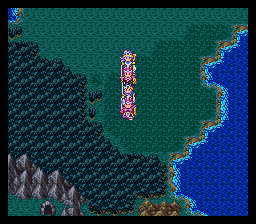

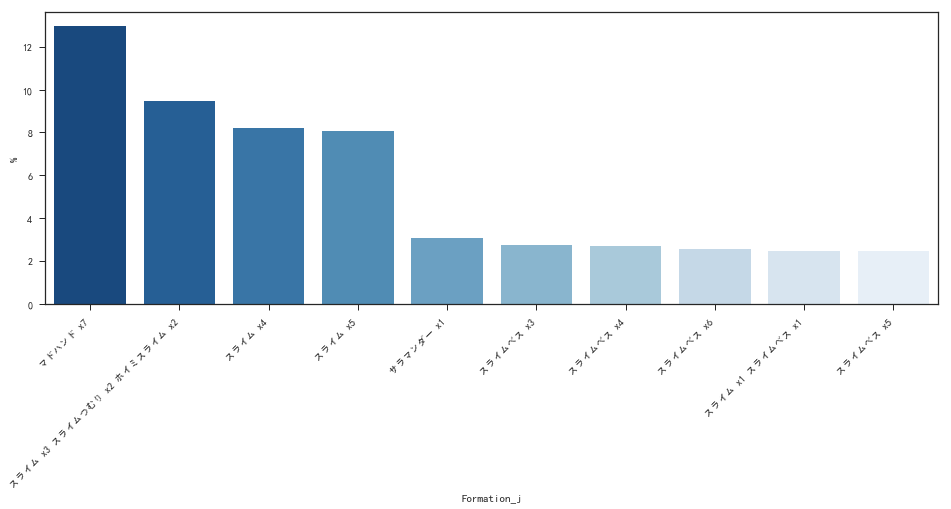

                                         Formation_j          %
マドハンド x7                                        1296  12.961296
スライム x3 スライムつむり x2 ホイミスライム x2                    948   9.480948
スライム x4                                          823   8.230823
スライム x5                                          805   8.050805
サラマンダー x1                                        308   3.080308
スライムべス x3                                        273   2.730273
スライムべス x4                                        272   2.720272
スライムべス x6                                        257   2.570257
スライム x1 スライムべス x1                                248   2.480248
スライムべス x5                                        247   2.470247
じごくのきし x3 スライムべス x3                              208   2.080208
スライムべス x7                                        206   2.060206
スライムべス x1 マドハンド x1                               205   2.050205
じごくのきし x2 マドハンド x2                               196   1.960196
スライム x4 スライムべス x4                       

**To Domdora**

**Overworld zone hex: 0x12**

-----


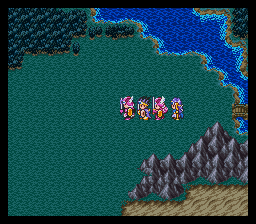

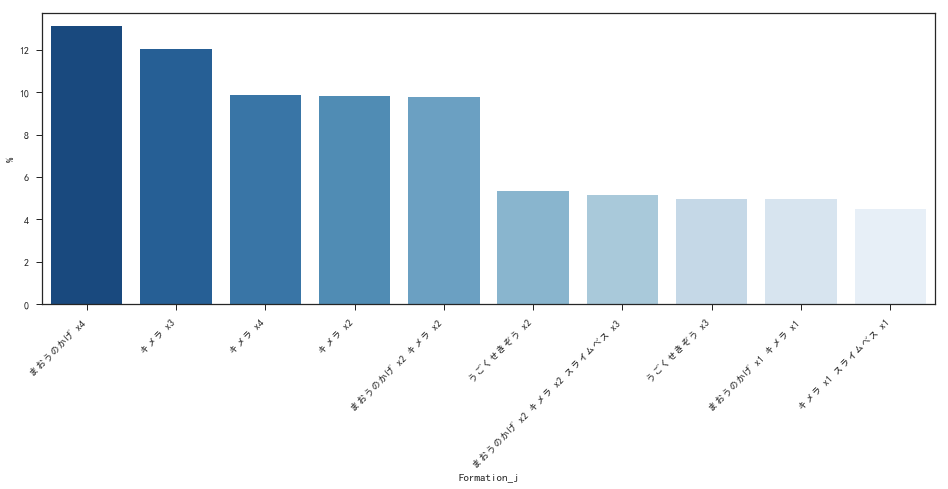

                            Formation_j          %
まおうのかげ x4                          1311  13.111311
キメラ x3                             1204  12.041204
キメラ x4                              989   9.890989
キメラ x2                              982   9.820982
まおうのかげ x2 キメラ x2                    977   9.770977
うごくせきぞう x2                          534   5.340534
まおうのかげ x2 キメラ x2 スライムべス x3          517   5.170517
うごくせきぞう x3                          498   4.980498
まおうのかげ x1 キメラ x1                    497   4.970497
キメラ x1 スライムべス x1                    448   4.480448
まおうのかげ x1 キメラ x1 スライムべス x1          370   3.700370
キメラ x2 スライムべス x2                    312   3.120312
まおうのかげ x2 キメラ x2 スライムべス x2          253   2.530253
キメラ x4 スライムべス x3                    249   2.490249
キメラ x3 スライムべス x3                    217   2.170217
まおうのかげ x1 スライムべス x1                 191   1.910191
キメラ x3 スライムべス x4                    130   1.300130
まおうのかげ x2 スライムべス x2                 105   1.050105
まおうのかげ x4 スライムべス x3            

**Outside Garin Tomb**

**Overworld zone hex: 0x8**

-----


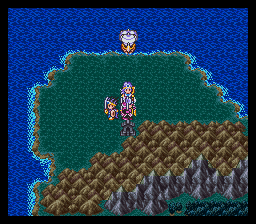

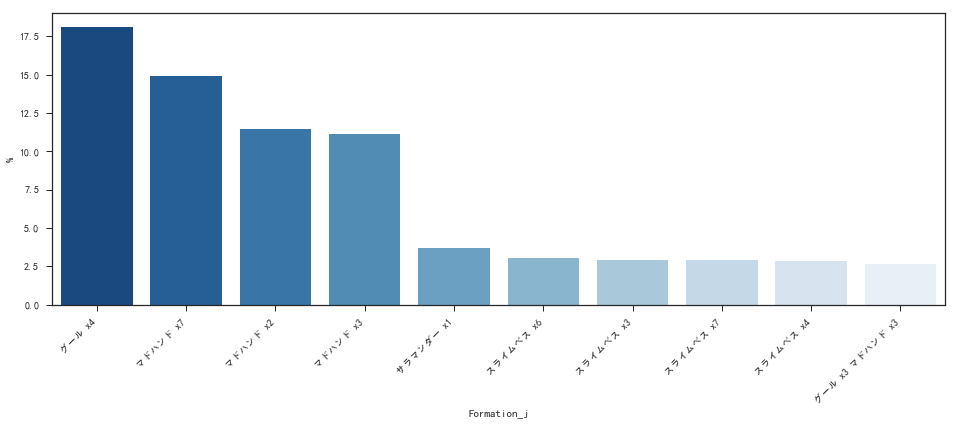

                                      Formation_j          %
グール x4                                       1811  18.111811
マドハンド x7                                     1490  14.901490
マドハンド x2                                     1147  11.471147
マドハンド x3                                     1113  11.131113
サラマンダー x1                                     369   3.690369
スライムべス x6                                     304   3.040304
スライムべス x3                                     292   2.920292
スライムべス x7                                     291   2.910291
スライムべス x4                                     283   2.830283
グール x3 マドハンド x3                               264   2.640264
スライムべス x5                                     258   2.580258
スライムべス x1 マドハンド x1                            250   2.500250
スライムべス x4 マドハンド x4                            237   2.370237
スライムべス x2 マドハンド x2                            166   1.660166
グール x1 マドハンド x1                               154   1.540154
スライムべス x3 マドハンド x3      

**To Kol (1)**

**Overworld zone hex: 0x18**

-----


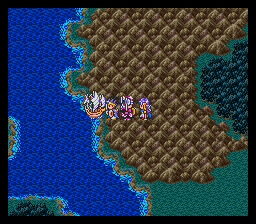

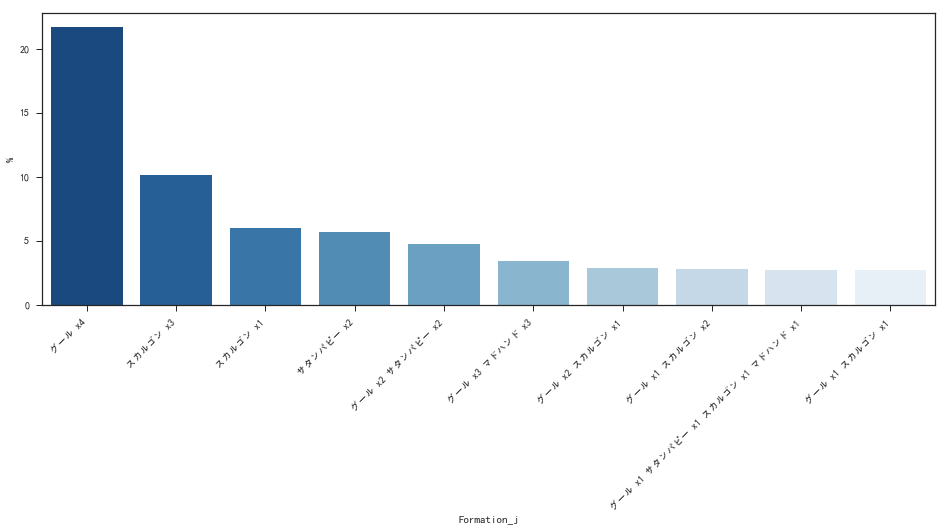

                                    Formation_j          %
グール x4                                     2168  21.682168
スカルゴン x3                                   1014  10.141014
スカルゴン x1                                    598   5.980598
サタンパピー x2                                   567   5.670567
グール x2 サタンパピー x2                            475   4.750475
グール x3 マドハンド x3                             339   3.390339
グール x2 スカルゴン x1                             286   2.860286
グール x1 スカルゴン x2                             276   2.760276
グール x1 サタンパピー x1 スカルゴン x1 マドハンド x1          272   2.720272
グール x1 スカルゴン x1                             269   2.690269
グール x2                                      256   2.560256
スカルゴン x2 マドハンド x2                           254   2.540254
グール x1 サタンパピー x1 スカルゴン x1                   252   2.520252
グール x3                                      242   2.420242
グール x1 マドハンド x1                             224   2.240224
グール x1 サタンパピー x1                            216   2.1602

**To Kol (2)**

**Overworld zone hex: 0x24**

-----


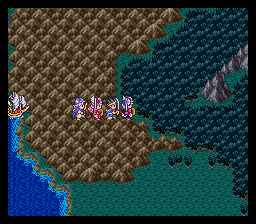

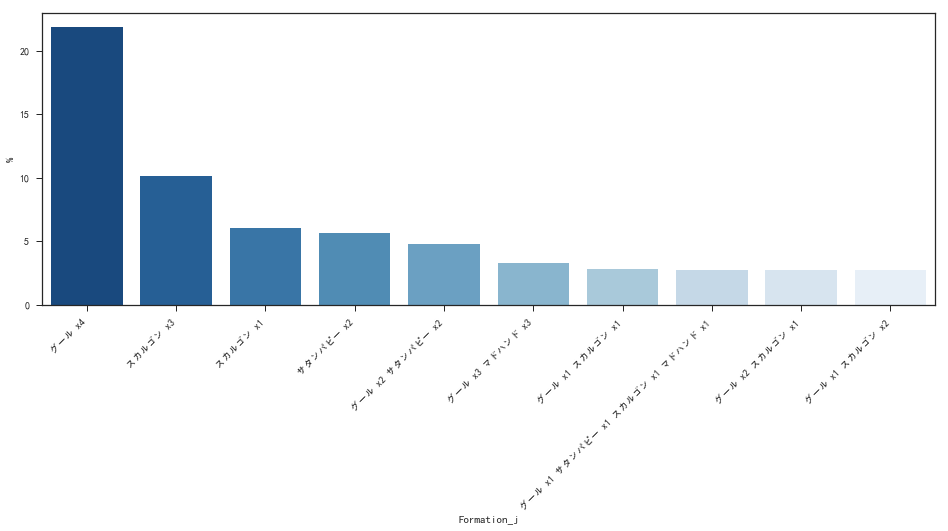

                                    Formation_j          %
グール x4                                     2186  21.862186
スカルゴン x3                                   1017  10.171017
スカルゴン x1                                    601   6.010601
サタンパピー x2                                   563   5.630563
グール x2 サタンパピー x2                            476   4.760476
グール x3 マドハンド x3                             331   3.310331
グール x1 スカルゴン x1                             278   2.780278
グール x1 サタンパピー x1 スカルゴン x1 マドハンド x1          274   2.740274
グール x2 スカルゴン x1                             273   2.730273
グール x1 スカルゴン x2                             273   2.730273
グール x1 サタンパピー x1 スカルゴン x1                   264   2.640264
グール x2                                      257   2.570257
スカルゴン x2 マドハンド x2                           256   2.560256
グール x1 マドハンド x1                             239   2.390239
グール x3                                      236   2.360236
グール x1 サタンパピー x1                            212   2.1202

**Southwest Domdora**

**Overworld zone hex: 0x30**

-----


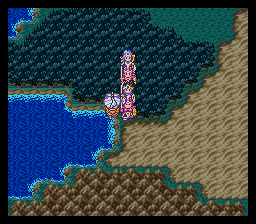

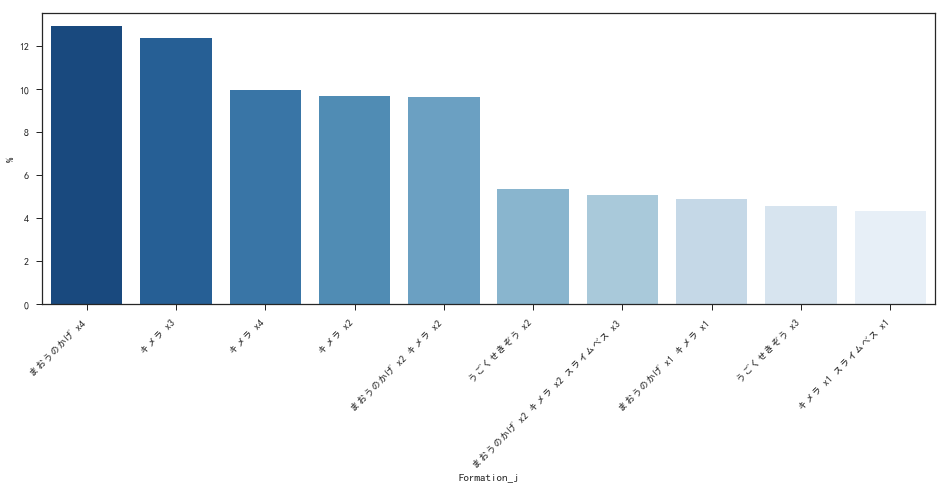

                            Formation_j          %
まおうのかげ x4                          1290  12.901290
キメラ x3                             1234  12.341234
キメラ x4                              996   9.960996
キメラ x2                              966   9.660966
まおうのかげ x2 キメラ x2                    964   9.640964
うごくせきぞう x2                          537   5.370537
まおうのかげ x2 キメラ x2 スライムべス x3          509   5.090509
まおうのかげ x1 キメラ x1                    490   4.900490
うごくせきぞう x3                          454   4.540454
キメラ x1 スライムべス x1                    433   4.330433
まおうのかげ x1 キメラ x1 スライムべス x1          398   3.980398
キメラ x2 スライムべス x2                    309   3.090309
まおうのかげ x2 キメラ x2 スライムべス x2          273   2.730273
キメラ x4 スライムべス x3                    262   2.620262
キメラ x3 スライムべス x3                    209   2.090209
まおうのかげ x1 スライムべス x1                 209   2.090209
キメラ x3 スライムべス x4                    127   1.270127
まおうのかげ x2 スライムべス x2                 109   1.090109
まおうのかげ x4 スライムべス x3            

**Outside RainStaff Shrine**

**Overworld zone hex: 0x6**

-----


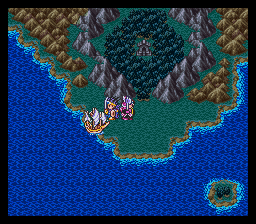

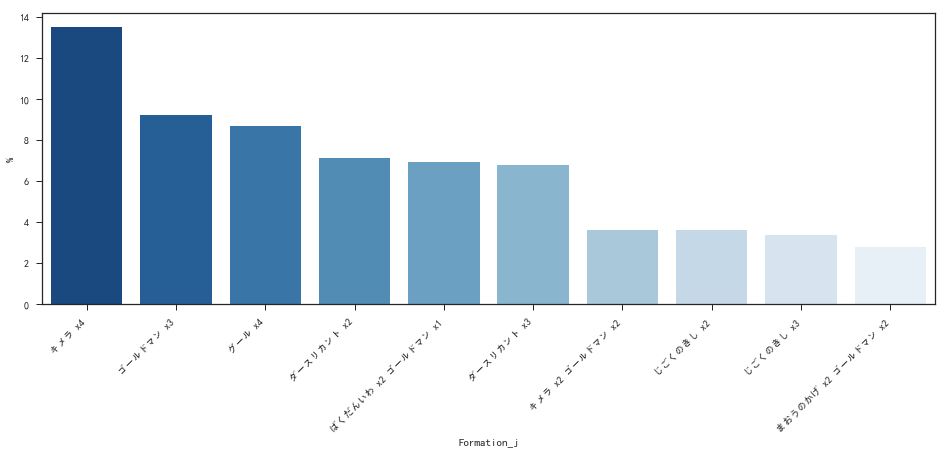

                                       Formation_j          %
キメラ x4                                        1353  13.531353
ゴールドマン x3                                      925   9.250925
グール x4                                         869   8.690869
ダースリカント x2                                     716   7.160716
ばくだんいわ x2 ゴールドマン x1                            692   6.920692
ダースリカント x3                                     680   6.800680
キメラ x2 ゴールドマン x2                               363   3.630363
じごくのきし x2                                      362   3.620362
じごくのきし x3                                      339   3.390339
まおうのかげ x2 ゴールドマン x2                            282   2.820282
まおうのかげ x2 キメラ x2                               233   2.330233
ゴールドマン x1                                      225   2.250225
グール x2 ゴールドマン x2                               203   2.030203
キメラ x2 グール x2                                  177   1.770177
ゴールドマン x2 ダースリカント x1                           170   1.700170
キメラ x2 ダ

**Eastern Darkworld Continent**

**Overworld zone hex: 0x1C**

-----


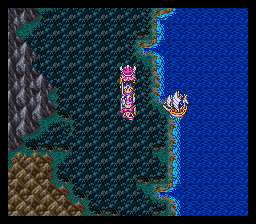

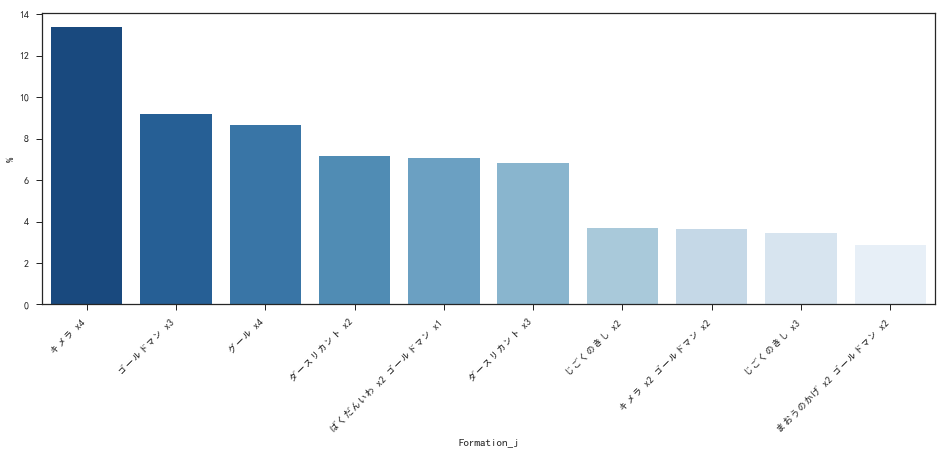

                                       Formation_j          %
キメラ x4                                        1339  13.391339
ゴールドマン x3                                      920   9.200920
グール x4                                         866   8.660866
ダースリカント x2                                     714   7.140714
ばくだんいわ x2 ゴールドマン x1                            706   7.060706
ダースリカント x3                                     681   6.810681
じごくのきし x2                                      369   3.690369
キメラ x2 ゴールドマン x2                               364   3.640364
じごくのきし x3                                      345   3.450345
まおうのかげ x2 ゴールドマン x2                            285   2.850285
まおうのかげ x2 キメラ x2                               221   2.210221
ゴールドマン x1                                      218   2.180218
グール x2 ゴールドマン x2                               211   2.110211
ゴールドマン x2 ダースリカント x1                           176   1.760176
キメラ x2 グール x2                                  169   1.690169
キメラ x2 ダ

**To Zoma (1)**

**Overworld zone hex: 0x20**

-----


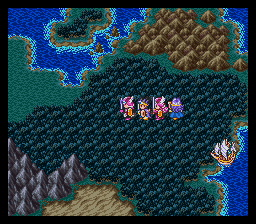

**Chance to see metal: 29.28%**

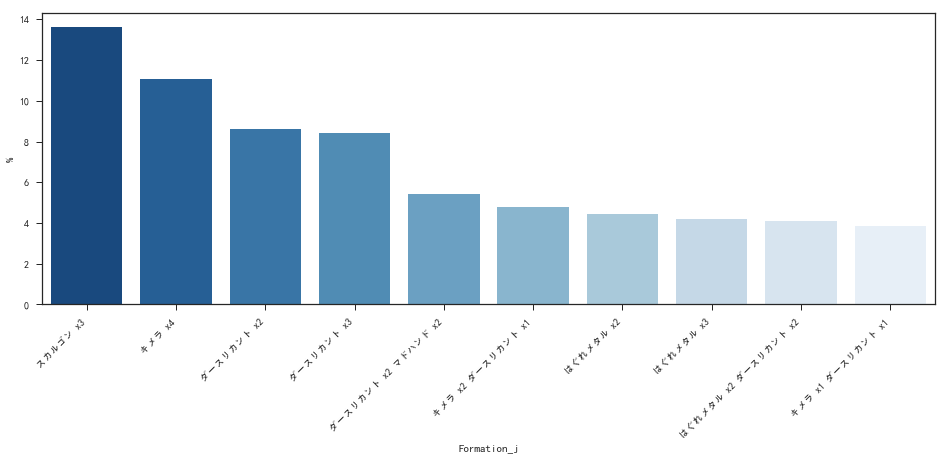

                                      Formation_j          %
スカルゴン x3                                     1365  13.651365
キメラ x4                                       1107  11.071107
ダースリカント x2                                    860   8.600860
ダースリカント x3                                    843   8.430843
ダースリカント x2 マドハンド x2                           542   5.420542
キメラ x2 ダースリカント x1                             477   4.770477
はぐれメタル x2                                     446   4.460446
はぐれメタル x3                                     421   4.210421
はぐれメタル x2 ダースリカント x2                          411   4.110411
キメラ x1 ダースリカント x1                             386   3.860386
キメラ x1 ダースリカント x2                             340   3.400340
ダースリカント x1 マドハンド x1                           276   2.760276
はぐれメタル x1 ダースリカント x1                          213   2.130213
はぐれメタル x3 キメラ x3                              205   2.050205
キメラ x3 マドハンド x3                               204   2.040204
キメラ x1 マドハンド x1         

**To Zoma (2)**

**Overworld zone hex: 0x17**

-----


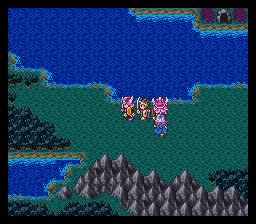

**Chance to see metal: 29.15%**

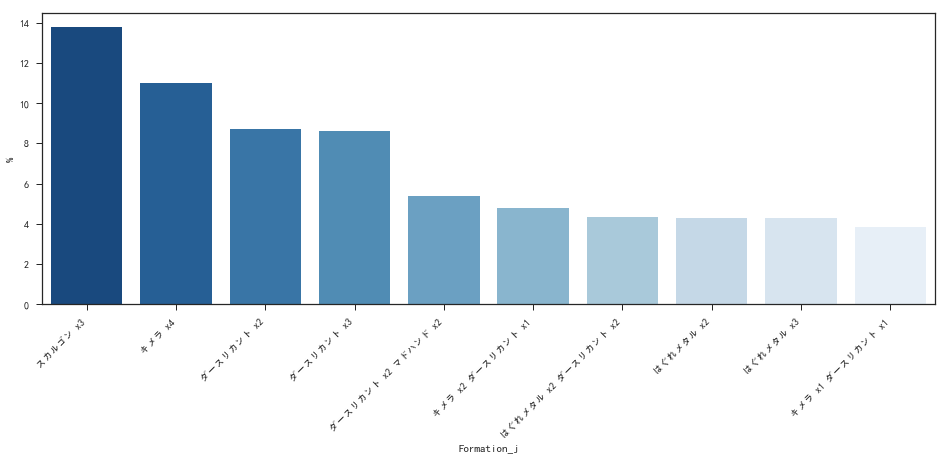

                                      Formation_j          %
スカルゴン x3                                     1380  13.801380
キメラ x4                                       1100  11.001100
ダースリカント x2                                    871   8.710871
ダースリカント x3                                    861   8.610861
ダースリカント x2 マドハンド x2                           539   5.390539
キメラ x2 ダースリカント x1                             480   4.800480
はぐれメタル x2 ダースリカント x2                          432   4.320432
はぐれメタル x2                                     430   4.300430
はぐれメタル x3                                     428   4.280428
キメラ x1 ダースリカント x1                             383   3.830383
キメラ x1 ダースリカント x2                             341   3.410341
ダースリカント x1 マドハンド x1                           286   2.860286
はぐれメタル x1 ダースリカント x1                          209   2.090209
はぐれメタル x3 キメラ x3                              204   2.040204
キメラ x3 マドハンド x3                               204   2.040204
キメラ x1 マドハンド x1         

**To Zoma (3)**

**Overworld zone hex: 0x16**

-----


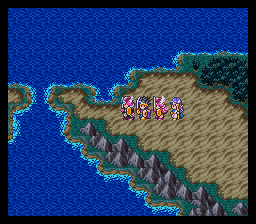

**Chance to see metal: 29.26%**

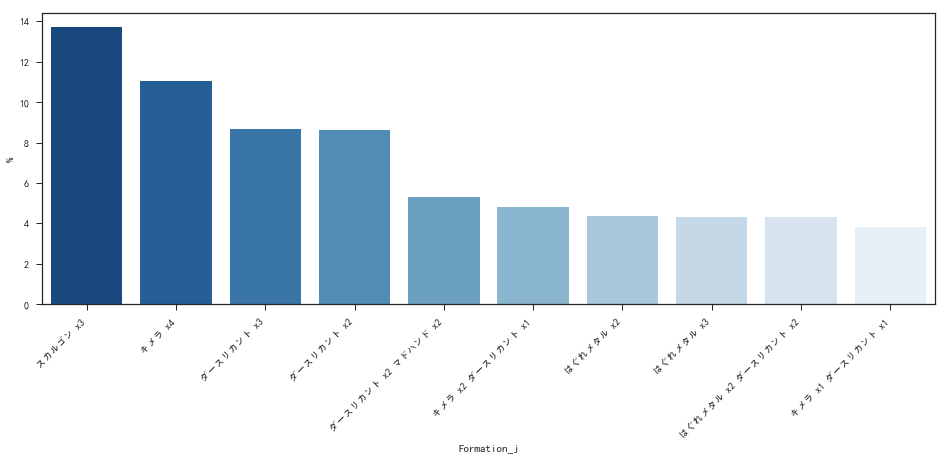

                                      Formation_j          %
スカルゴン x3                                     1374  13.741374
キメラ x4                                       1105  11.051105
ダースリカント x3                                    866   8.660866
ダースリカント x2                                    863   8.630863
ダースリカント x2 マドハンド x2                           533   5.330533
キメラ x2 ダースリカント x1                             481   4.810481
はぐれメタル x2                                     438   4.380438
はぐれメタル x3                                     431   4.310431
はぐれメタル x2 ダースリカント x2                          430   4.300430
キメラ x1 ダースリカント x1                             384   3.840384
キメラ x1 ダースリカント x2                             341   3.410341
ダースリカント x1 マドハンド x1                           289   2.890289
はぐれメタル x1 ダースリカント x1                          213   2.130213
はぐれメタル x3 キメラ x3                              202   2.020202
キメラ x3 マドハンド x3                               200   2.000200
キメラ x1 マドハンド x1         

**To Zoma (4)**

**Overworld zone hex: 0x15**

-----


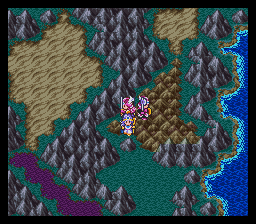

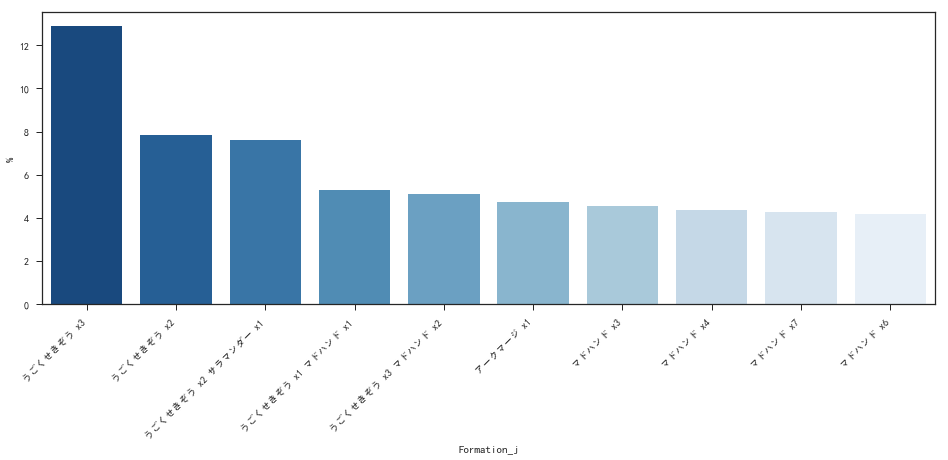

                                           Formation_j          %
うごくせきぞう x3                                        1289  12.891289
うごくせきぞう x2                                         782   7.820782
うごくせきぞう x2 サラマンダー x1                               759   7.590759
うごくせきぞう x1 マドハンド x1                                527   5.270527
うごくせきぞう x3 マドハンド x2                                512   5.120512
アークマージ x1                                          475   4.750475
マドハンド x3                                           454   4.540454
マドハンド x4                                           438   4.380438
マドハンド x7                                           425   4.250425
マドハンド x6                                           419   4.190419
うごくせきぞう x1 サラマンダー x1                               405   4.050405
マドハンド x5                                           377   3.770377
うごくせきぞう x2 マドハンド x2                                322   3.220322
うごくせきぞう x1 うごくせきぞう x1                              285   2.850285
サラマンダー x2 

**To Zoma (5)**

**Overworld zone hex: 0x14**

-----


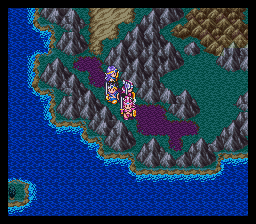

**Chance to see metal: 7.2%**

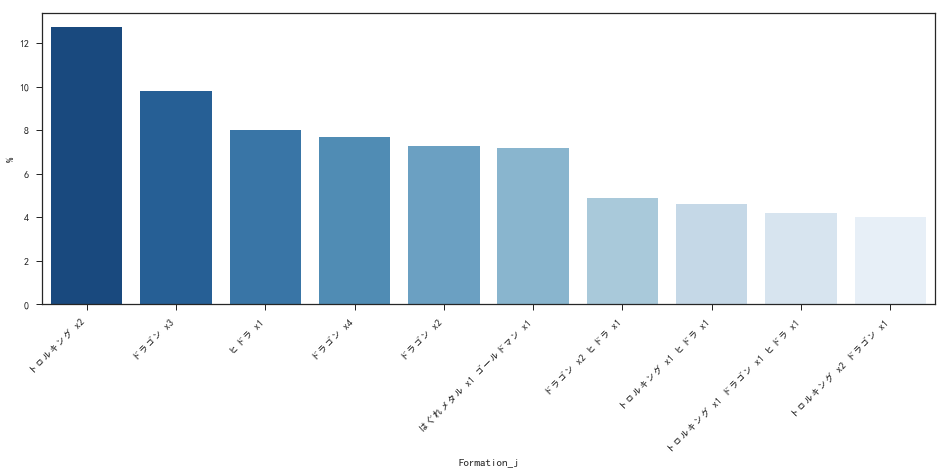

                             Formation_j          %
トロルキング x2                           1276  12.761276
ドラゴン x3                              979   9.790979
ヒドラ x1                               800   8.000800
ドラゴン x4                              769   7.690769
ドラゴン x2                              726   7.260726
はぐれメタル x1 ゴールドマン x1                  720   7.200720
ドラゴン x2 ヒドラ x1                       489   4.890489
トロルキング x1 ヒドラ x1                     460   4.600460
トロルキング x1 ドラゴン x1 ヒドラ x1             419   4.190419
トロルキング x2 ドラゴン x1                    400   4.000400
トロルキング x1 ドラゴン x1                    396   3.960396
ドラゴン x2 マクロべータ x2                    364   3.640364
トロルキング x1 ドラゴン x1 マクロべータ x1          337   3.370337
トロルキング x1 ドラゴン x2                    292   2.920292
マクロべータ x1                            271   2.710271
ドラゴン x1 ヒドラ x1                       235   2.350235
ドラゴン x1 ヒドラ x1 マクロべータ x1             212   2.120212
トロルキング x2 マクロべータ x1                  206   2.060206
ドラゴン x1 マクロべ

**Ultimate Key Tile**

**Overworld zone hex: 0x23**

-----


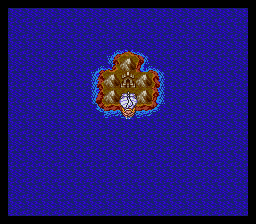

**Day chance to see metal: 9.56%**

**Night chance to see metal: 9.55%**

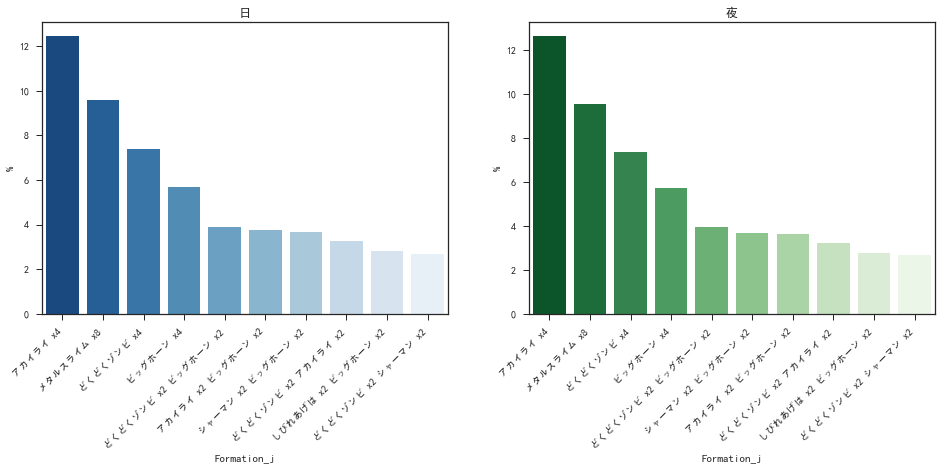

日:
                                         Formation_j          %
アカイライ x4                                        1243  12.431243
メタルスライム x8                                       956   9.560956
どくどくゾンビ x4                                       738   7.380738
ビッグホーン x4                                        569   5.690569
どくどくゾンビ x2 ビッグホーン x2                             389   3.890389
アカイライ x2 ビッグホーン x2                               374   3.740374
シャーマン x2 ビッグホーン x2                               366   3.660366
どくどくゾンビ x2 アカイライ x2                              325   3.250325
しびれあげは x2 ビッグホーン x2                              283   2.830283
どくどくゾンビ x2 シャーマン x2                              269   2.690269
アカイライ x2 シャーマン x2                                268   2.680268
どくどくゾンビ x1 ビッグホーン x1                             215   2.150215
しびれあげは x1 ビッグホーン x1                              201   2.010201
どくどくゾンビ x3                                       192   1.920192
アカイライ x1 ビッグホーン x1                   

**To Samanosa Shrine**

**Overworld zone hex: 0x24**

-----


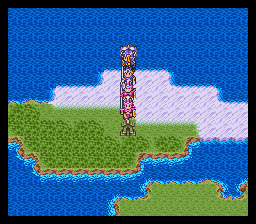

**Day chance to see metal: 2.71%**

**Night chance to see metal: 29.3%**

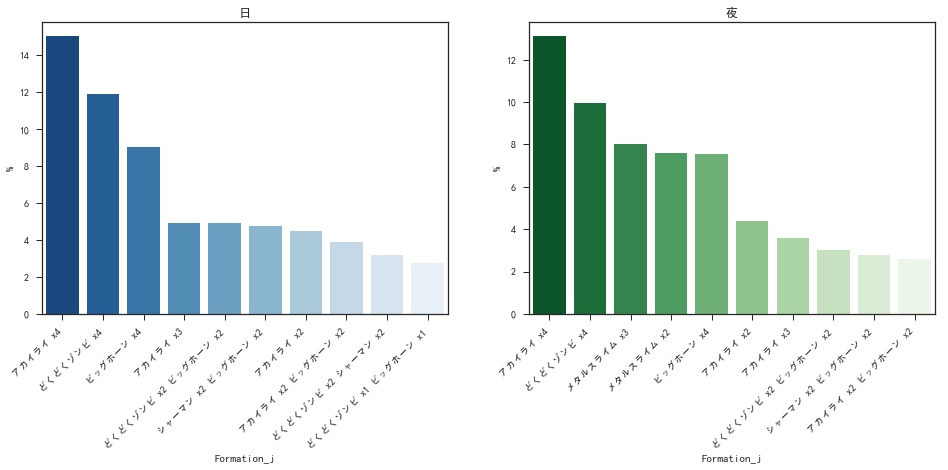

日:
                                        Formation_j          %
アカイライ x4                                       1503  15.031503
どくどくゾンビ x4                                     1189  11.891189
ビッグホーン x4                                       904   9.040904
アカイライ x3                                        494   4.940494
どくどくゾンビ x2 ビッグホーン x2                            492   4.920492
シャーマン x2 ビッグホーン x2                              476   4.760476
アカイライ x2                                        451   4.510451
アカイライ x2 ビッグホーン x2                              390   3.900390
どくどくゾンビ x2 シャーマン x2                             318   3.180318
どくどくゾンビ x1 ビッグホーン x1                            274   2.740274
はぐれメタル x1                                       271   2.710271
ビッグホーン x3                                       267   2.670267
シャーマン x1 ビッグホーン x1                              256   2.560256
どくどくゾンビ x2 アカイライ x2                             227   2.270227
アカイライ x1 ビッグホーン x1                              216 

**Map Type: Dungeon**

-----


**Najimi Tower B1**

-----


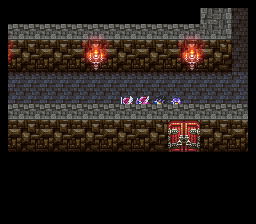

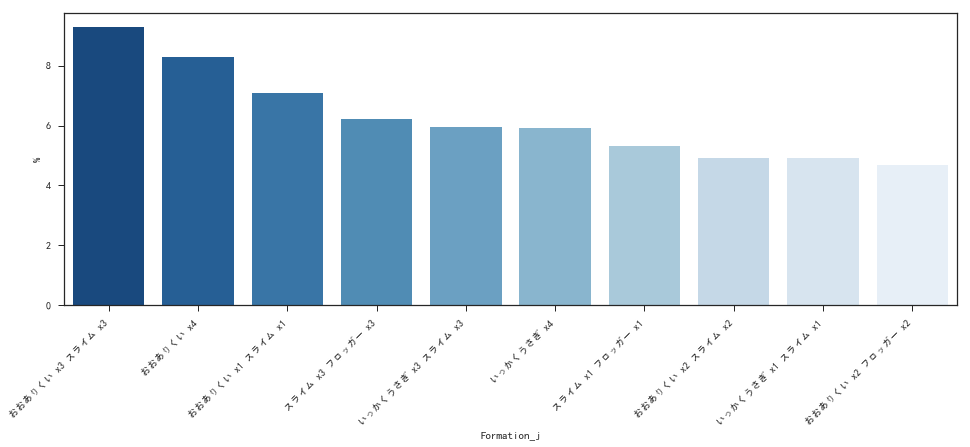

                      Formation_j         %
おおありくい x3 スライム x3             930  9.300930
おおありくい x4                     828  8.280828
おおありくい x1 スライム x1             708  7.080708
スライム x3 フロッガー x3              621  6.210621
いっかくうさぎ x3 スライム x3            596  5.960596
いっかくうさぎ x4                    592  5.920592
スライム x1 フロッガー x1              532  5.320532
おおありくい x2 スライム x2             492  4.920492
いっかくうさぎ x1 スライム x1            491  4.910491
おおありくい x2 フロッガー x2            469  4.690469
フロッガー x2                      396  3.960396
フロッガー x3                      387  3.870387
じんめんちょう x2                    377  3.770377
じんめんちょう x3                    361  3.610361
いっかくうさぎ x2 スライム x2            337  3.370337
スライム x2 フロッガー x2              318  3.180318
いっかくうさぎ x2 フロッガー x2           274  2.740274
いっかくうさぎ x2 おおありくい x3          252  2.520252
おおありくい x1 フロッガー x1            246  2.460246
いっかくうさぎ x1 おおありくい x1          241  2.410241
いっかくうさぎ x3                    177  1.770177
いっかくうさぎ x2 おおありくい x2          15

**Najimi Tower F1**

-----


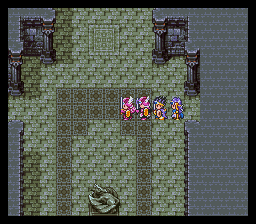

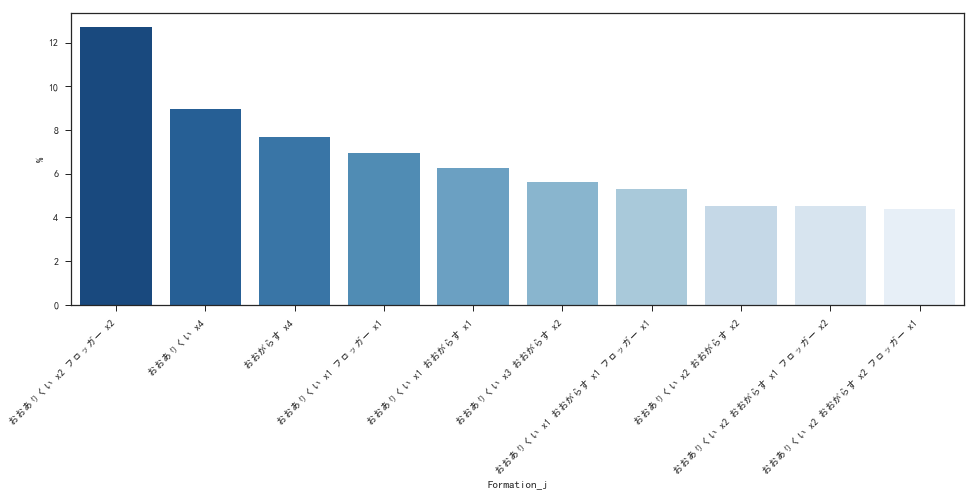

                             Formation_j          %
おおありくい x2 フロッガー x2                  1272  12.721272
おおありくい x4                            897   8.970897
おおがらす x4                             767   7.670767
おおありくい x1 フロッガー x1                   695   6.950695
おおありくい x1 おおがらす x1                   626   6.260626
おおありくい x3 おおがらす x2                   560   5.600560
おおありくい x1 おおがらす x1 フロッガー x1          528   5.280528
おおありくい x2 おおがらす x2                   453   4.530453
おおありくい x2 おおがらす x1 フロッガー x2          450   4.500450
おおありくい x2 おおがらす x2 フロッガー x1          437   4.370437
バブルスライム x3                           362   3.620362
バブルスライム x2                           358   3.580358
いっかくうさぎ x2 じんめんちょう x2                339   3.390339
いっかくうさぎ x2 じんめんちょう x3                335   3.350335
おおありくい x2 おおがらす x3                   331   3.310331
いっかくうさぎ x3 じんめんちょう x1                282   2.820282
おおがらす x1 フロッガー x1                    255   2.550255
おおありくい x3                            206   2.060206
おおがらす x2 フロッ

**Najimi Tower F2**

-----


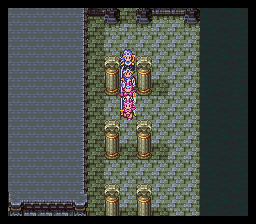

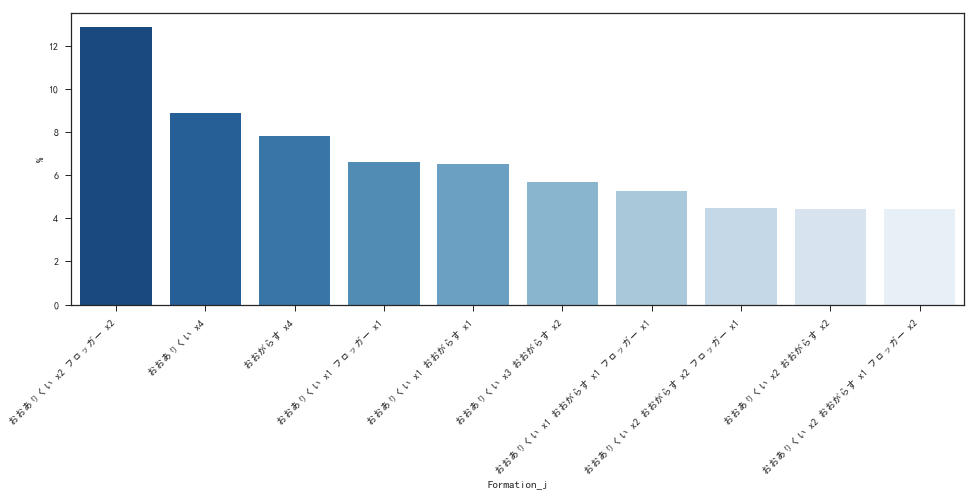

                             Formation_j          %
おおありくい x2 フロッガー x2                  1288  12.881288
おおありくい x4                            888   8.880888
おおがらす x4                             783   7.830783
おおありくい x1 フロッガー x1                   663   6.630663
おおありくい x1 おおがらす x1                   651   6.510651
おおありくい x3 おおがらす x2                   567   5.670567
おおありくい x1 おおがらす x1 フロッガー x1          527   5.270527
おおありくい x2 おおがらす x2 フロッガー x1          448   4.480448
おおありくい x2 おおがらす x2                   445   4.450445
おおありくい x2 おおがらす x1 フロッガー x2          443   4.430443
バブルスライム x3                           363   3.630363
バブルスライム x2                           354   3.540354
おおありくい x2 おおがらす x3                   336   3.360336
いっかくうさぎ x2 じんめんちょう x2                332   3.320332
いっかくうさぎ x2 じんめんちょう x3                326   3.260326
いっかくうさぎ x3 じんめんちょう x1                276   2.760276
おおがらす x1 フロッガー x1                    247   2.470247
おおありくい x3                            208   2.080208
おおがらす x3 フロッ

**Najimi Tower F3**

-----


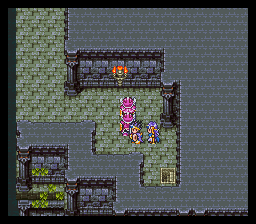

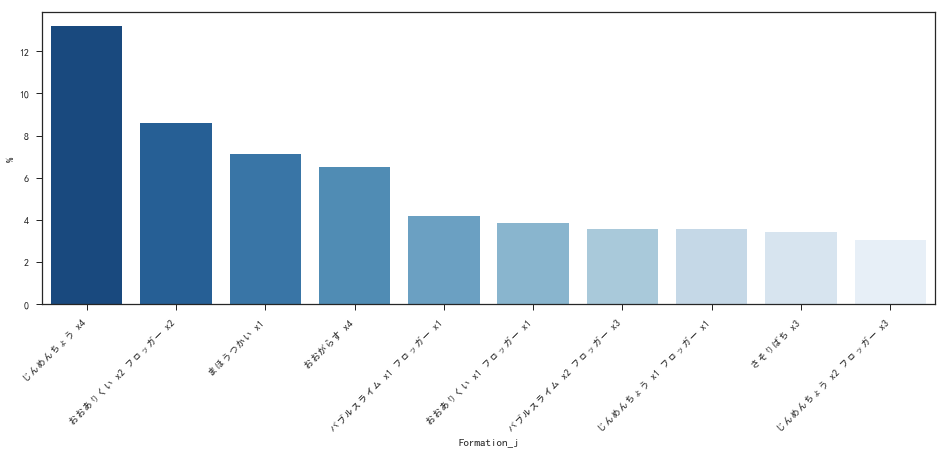

                                          Formation_j          %
じんめんちょう x4                                       1320  13.201320
おおありくい x2 フロッガー x2                                859   8.590859
まほうつかい x1                                         711   7.110711
おおがらす x4                                          652   6.520652
バブルスライム x1 フロッガー x1                               418   4.180418
おおありくい x1 フロッガー x1                                383   3.830383
バブルスライム x2 フロッガー x3                               355   3.550355
じんめんちょう x1 フロッガー x1                               354   3.540354
さそりばち x3                                          340   3.400340
じんめんちょう x2 フロッガー x3                               301   3.010301
さそりばち x2                                          293   2.930293
バブルスライム x2 フロッガー x2                               291   2.910291
じんめんちょう x2 フロッガー x2                               277   2.770277
じんめんちょう x2 バブルスライム x2 フロッガー x2                    246   2.460246
バブルスライム x3 フロッガー x2      

**Magic Ball Cave F1**

-----


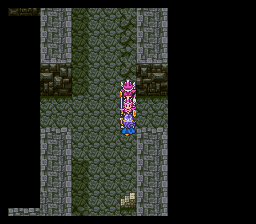

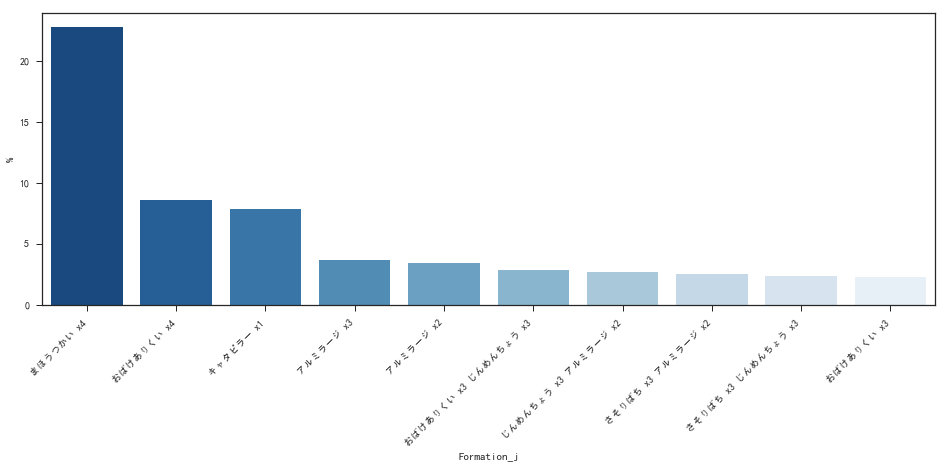

                                           Formation_j          %
まほうつかい x4                                         2282  22.822282
おばけありくい x4                                         859   8.590859
キャタピラー x1                                          785   7.850785
アルミラージ x3                                          369   3.690369
アルミラージ x2                                          339   3.390339
おばけありくい x3 じんめんちょう x3                              284   2.840284
じんめんちょう x3 アルミラージ x2                               272   2.720272
さそりばち x3 アルミラージ x2                                 255   2.550255
さそりばち x3 じんめんちょう x3                                236   2.360236
おばけありくい x3                                         228   2.280228
おばけありくい x1 アルミラージ x1                               215   2.150215
おばけありくい x1 じんめんちょう x1                              213   2.130213
さそりばち x1 アルミラージ x1                                 207   2.070207
おばけありくい x1 さそりばち x1                                192   1.920192
じんめんちょう x1

**Magic Ball Cave B1**

-----


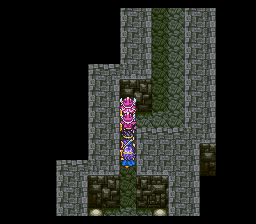

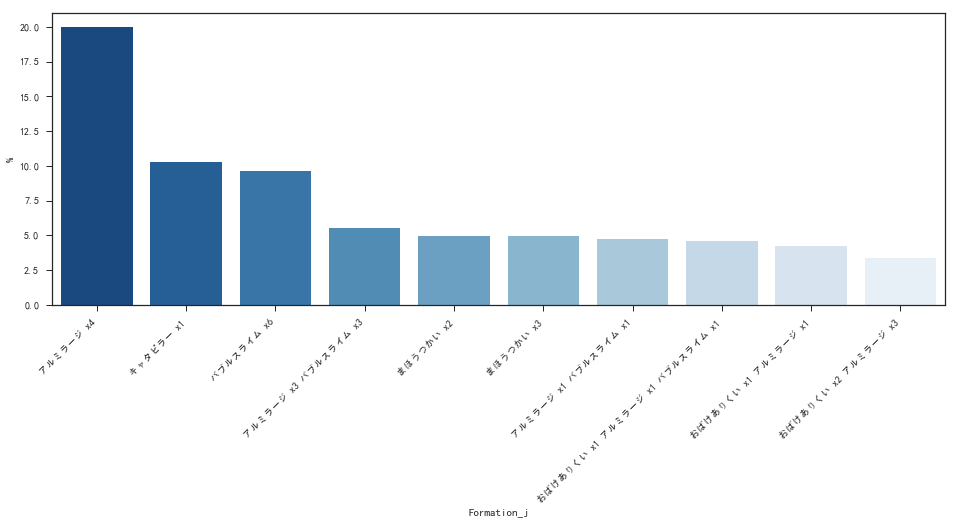

                                 Formation_j          %
アルミラージ x4                               2001  20.012001
キャタピラー x1                               1025  10.251025
バブルスライム x6                               962   9.620962
アルミラージ x3 バブルスライム x3                     552   5.520552
まほうつかい x2                                495   4.950495
まほうつかい x3                                492   4.920492
アルミラージ x1 バブルスライム x1                     476   4.760476
おばけありくい x1 アルミラージ x1 バブルスライム x1          460   4.600460
おばけありくい x1 アルミラージ x1                     420   4.200420
おばけありくい x2 アルミラージ x3                     336   3.360336
おばけありくい x1 バブルスライム x1                    336   3.360336
おばけありくい x1 アルミラージ x2 バブルスライム x2          315   3.150315
おばけありくい x2 アルミラージ x2                     299   2.990299
おばけありくい x2 アルミラージ x2 バブルスライム x1          289   2.890289
おばけありくい x2 アルミラージ x1 バブルスライム x2          275   2.750275
アルミラージ x2 バブルスライム x2                     275   2.750275
おばけありくい x3 アルミラージ x2                     262   2

**Champagne Tower F1**

-----


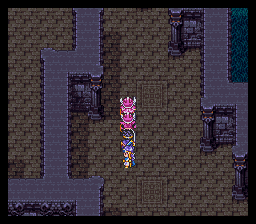

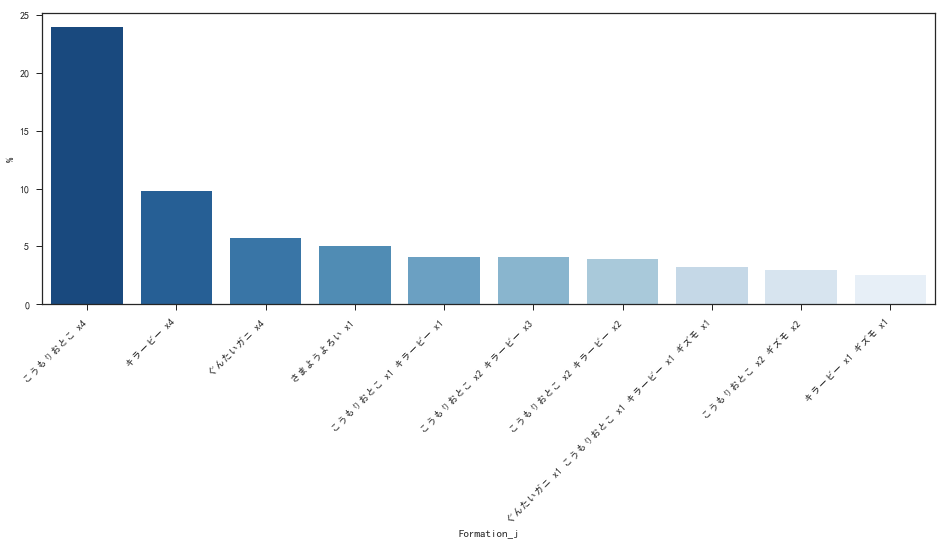

                                      Formation_j          %
こうもりおとこ x4                                   2400  24.002400
キラービー x4                                      979   9.790979
ぐんたいガニ x4                                     569   5.690569
さまようよろい x1                                    504   5.040504
こうもりおとこ x1 キラービー x1                           408   4.080408
こうもりおとこ x2 キラービー x3                           404   4.040404
こうもりおとこ x2 キラービー x2                           393   3.930393
ぐんたいガニ x1 こうもりおとこ x1 キラービー x1 ギズモ x1          318   3.180318
こうもりおとこ x2 ギズモ x2                             293   2.930293
キラービー x1 ギズモ x1                               253   2.530253
ギズモ x2                                        250   2.500250
ぐんたいガニ x2 こうもりおとこ x2                          242   2.420242
ぐんたいガニ x2 キラービー x2                            239   2.390239
ぐんたいガニ x2 キラービー x3                            218   2.180218
ギズモ x3                                        210   2.100210
ぐんたいガニ x1 キラービー x1      

**Champagne Tower F2**

-----


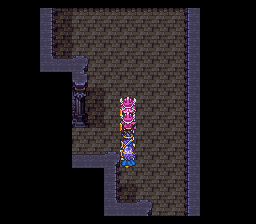

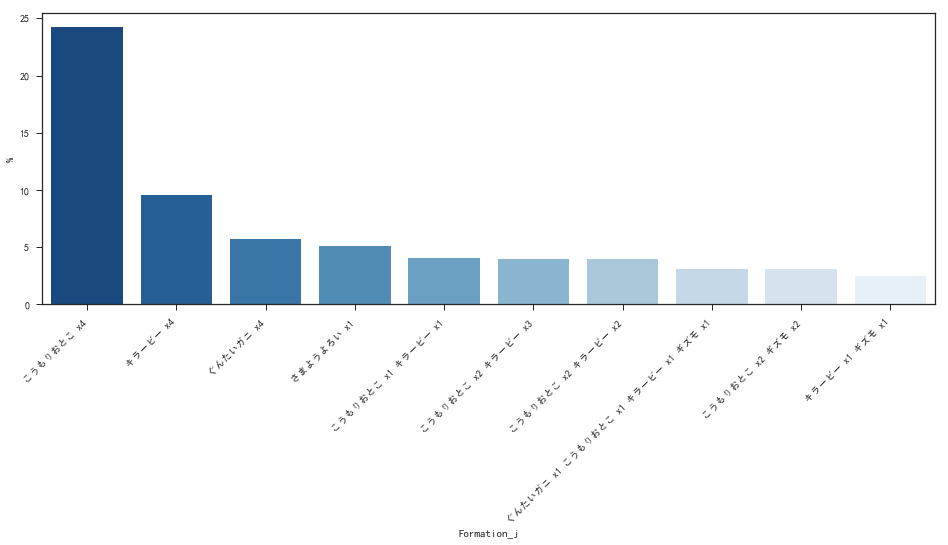

                                      Formation_j          %
こうもりおとこ x4                                   2429  24.292429
キラービー x4                                      957   9.570957
ぐんたいガニ x4                                     572   5.720572
さまようよろい x1                                    506   5.060506
こうもりおとこ x1 キラービー x1                           407   4.070407
こうもりおとこ x2 キラービー x3                           397   3.970397
こうもりおとこ x2 キラービー x2                           393   3.930393
ぐんたいガニ x1 こうもりおとこ x1 キラービー x1 ギズモ x1          309   3.090309
こうもりおとこ x2 ギズモ x2                             305   3.050305
キラービー x1 ギズモ x1                               250   2.500250
ぐんたいガニ x2 キラービー x2                            249   2.490249
ぐんたいガニ x2 こうもりおとこ x2                          245   2.450245
ギズモ x2                                        237   2.370237
ぐんたいガニ x2 キラービー x3                            220   2.200220
ギズモ x3                                        215   2.150215
ぐんたいガニ x1 キラービー x1      

**Champagne Tower F3**

-----


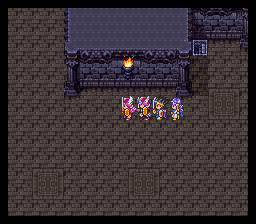

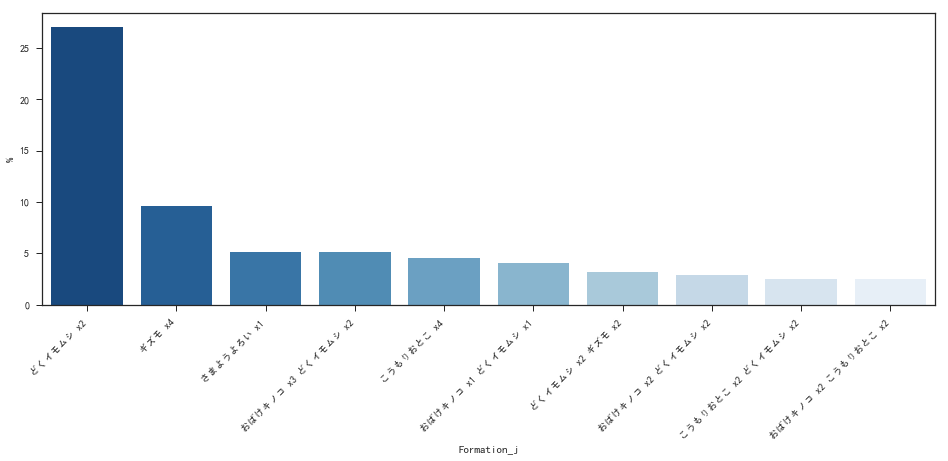

                                       Formation_j          %
どくイモムシ x2                                     2706  27.062706
ギズモ x4                                         962   9.620962
さまようよろい x1                                     518   5.180518
おばけキノコ x3 どくイモムシ x2                            511   5.110511
こうもりおとこ x4                                     455   4.550455
おばけキノコ x1 どくイモムシ x1                            404   4.040404
どくイモムシ x2 ギズモ x2                               320   3.200320
おばけキノコ x2 どくイモムシ x2                            288   2.880288
こうもりおとこ x2 どくイモムシ x2                           252   2.520252
おばけキノコ x2 こうもりおとこ x2                           248   2.480248
おばけキノコ x1 ギズモ x1                               246   2.460246
おばけキノコ x2                                      239   2.390239
おばけキノコ x3 こうもりおとこ x2                           227   2.270227
おばけキノコ x3                                      226   2.260226
おばけキノコ x1 こうもりおとこ x1                           222   2.220222
おばけキノコ x

**Champagne Tower F4**

-----


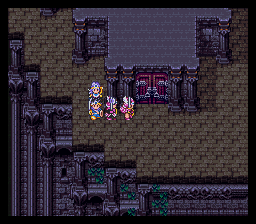

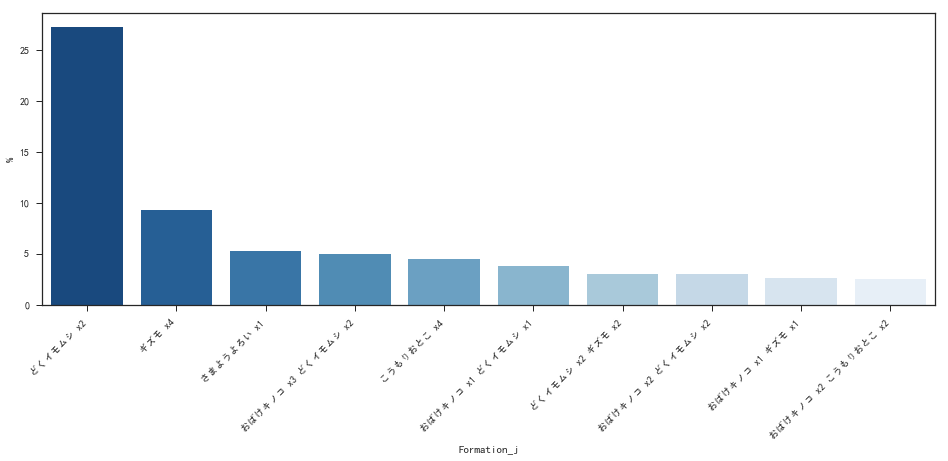

                                       Formation_j          %
どくイモムシ x2                                     2726  27.262726
ギズモ x4                                         925   9.250925
さまようよろい x1                                     524   5.240524
おばけキノコ x3 どくイモムシ x2                            495   4.950495
こうもりおとこ x4                                     444   4.440444
おばけキノコ x1 どくイモムシ x1                            380   3.800380
どくイモムシ x2 ギズモ x2                               306   3.060306
おばけキノコ x2 どくイモムシ x2                            300   3.000300
おばけキノコ x1 ギズモ x1                               258   2.580258
おばけキノコ x2 こうもりおとこ x2                           257   2.570257
こうもりおとこ x2 どくイモムシ x2                           246   2.460246
おばけキノコ x2                                      239   2.390239
おばけキノコ x3                                      227   2.270227
おばけキノコ x3 こうもりおとこ x2                           226   2.260226
おばけキノコ x3 ギズモ x2                               205   2.050205
おばけキノコ x

**Pyramid F1**

-----


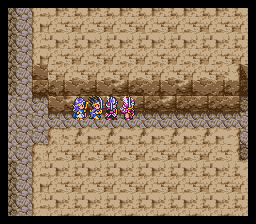

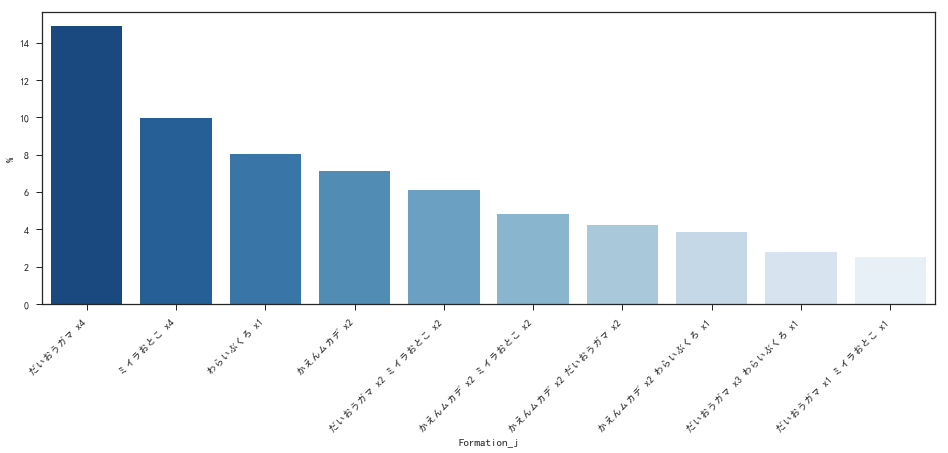

                                         Formation_j          %
だいおうガマ x4                                       1490  14.901490
ミイラおとこ x4                                        999   9.990999
わらいぶくろ x1                                        805   8.050805
かえんムカデ x2                                        714   7.140714
だいおうガマ x2 ミイラおとこ x2                              608   6.080608
かえんムカデ x2 ミイラおとこ x2                              482   4.820482
かえんムカデ x2 だいおうガマ x2                              421   4.210421
かえんムカデ x2 わらいぶくろ x1                              387   3.870387
だいおうガマ x3 わらいぶくろ x1                              279   2.790279
だいおうガマ x1 ミイラおとこ x1                              250   2.500250
わらいぶくろ x1 ミイラおとこ x1                              237   2.370237
かえんムカデ x1 だいおうガマ x1                              227   2.270227
かえんムカデ x1 ミイラおとこ x1                              225   2.250225
ミイラおとこ x3                                        219   2.190219
わらいぶくろ x1 ミイラおとこ x4                     

**Pyramid F2**

-----


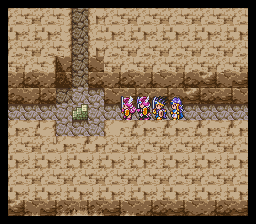

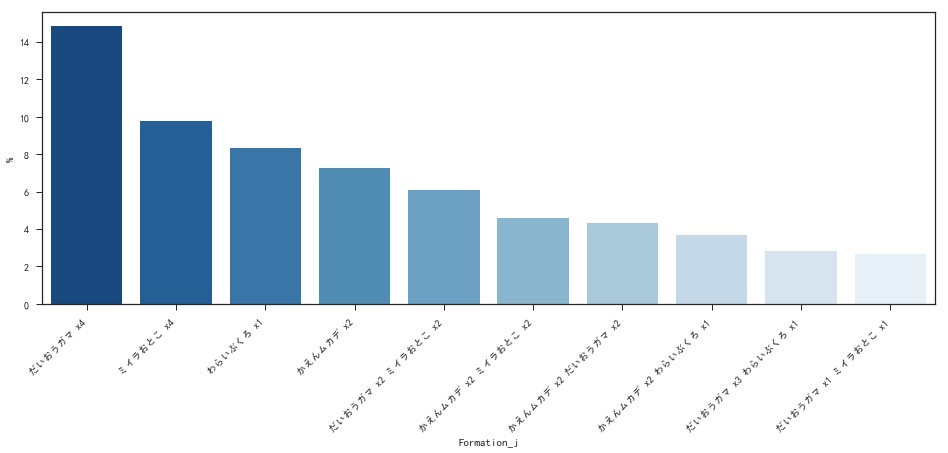

                                         Formation_j          %
だいおうガマ x4                                       1484  14.841484
ミイラおとこ x4                                        975   9.750975
わらいぶくろ x1                                        832   8.320832
かえんムカデ x2                                        727   7.270727
だいおうガマ x2 ミイラおとこ x2                              610   6.100610
かえんムカデ x2 ミイラおとこ x2                              461   4.610461
かえんムカデ x2 だいおうガマ x2                              431   4.310431
かえんムカデ x2 わらいぶくろ x1                              369   3.690369
だいおうガマ x3 わらいぶくろ x1                              281   2.810281
だいおうガマ x1 ミイラおとこ x1                              266   2.660266
わらいぶくろ x1 ミイラおとこ x1                              232   2.320232
かえんムカデ x1 ミイラおとこ x1                              228   2.280228
かえんムカデ x1 だいおうガマ x1                              227   2.270227
わらいぶくろ x1 ミイラおとこ x4                              211   2.110211
ミイラおとこ x3                               

**Pyramid F3**

-----


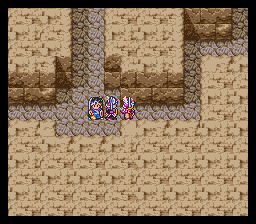

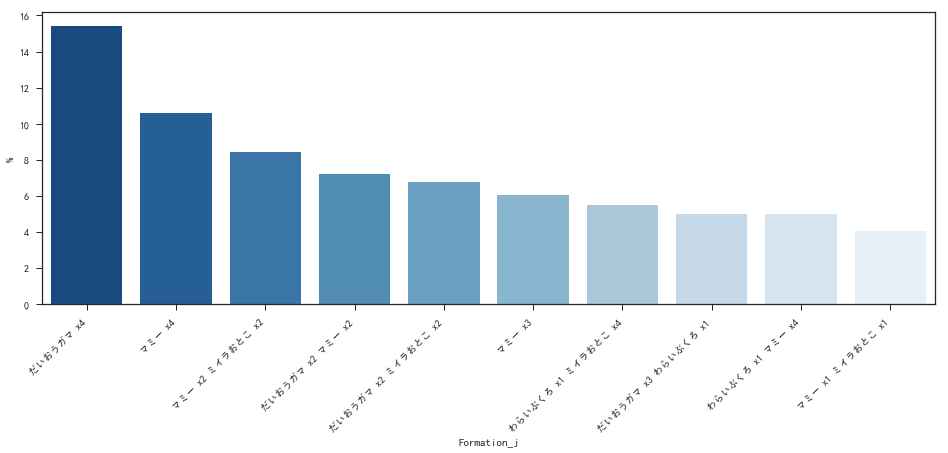

                                   Formation_j          %
だいおうガマ x4                                 1541  15.411541
マミー x4                                    1058  10.581058
マミー x2 ミイラおとこ x2                           841   8.410841
だいおうガマ x2 マミー x2                           720   7.200720
だいおうガマ x2 ミイラおとこ x2                        676   6.760676
マミー x3                                     606   6.060606
わらいぶくろ x1 ミイラおとこ x4                        549   5.490549
だいおうガマ x3 わらいぶくろ x1                        498   4.980498
わらいぶくろ x1 マミー x4                           496   4.960496
マミー x1 ミイラおとこ x1                           403   4.030403
マミー x2                                     387   3.870387
だいおうガマ x1 マミー x1                           339   3.390339
だいおうガマ x1 ミイラおとこ x1                        332   3.320332
だいおうガマ x1 マミー x1 マミー x1 ミイラおとこ x1          209   2.090209
マミー x1 マミー x1                              207   2.070207
だいおうガマ x1 マミー x1 ミイラおとこ x1                 184   1.840184
マミー x2 マミー x2 

**Pyramid F4**

-----


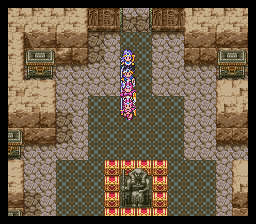

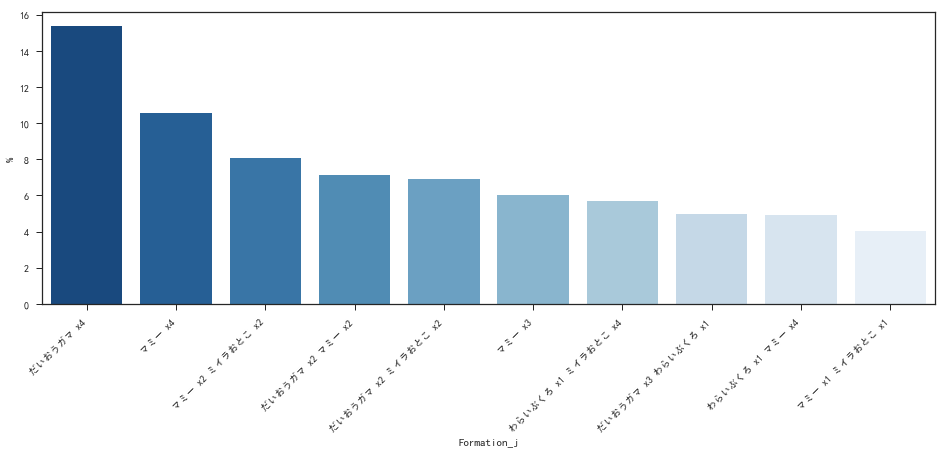

                                   Formation_j          %
だいおうガマ x4                                 1538  15.381538
マミー x4                                    1054  10.541054
マミー x2 ミイラおとこ x2                           807   8.070807
だいおうガマ x2 マミー x2                           716   7.160716
だいおうガマ x2 ミイラおとこ x2                        693   6.930693
マミー x3                                     605   6.050605
わらいぶくろ x1 ミイラおとこ x4                        568   5.680568
だいおうガマ x3 わらいぶくろ x1                        499   4.990499
わらいぶくろ x1 マミー x4                           494   4.940494
マミー x1 ミイラおとこ x1                           403   4.030403
マミー x2                                     393   3.930393
だいおうガマ x1 マミー x1                           341   3.410341
だいおうガマ x1 ミイラおとこ x1                        326   3.260326
だいおうガマ x1 マミー x1 マミー x1 ミイラおとこ x1          209   2.090209
マミー x1 マミー x1                              203   2.030203
だいおうガマ x1 マミー x1 ミイラおとこ x1                 181   1.810181
マミー x2 マミー x2 

**Kandar Cave F1**

-----


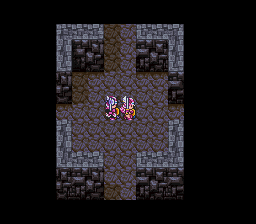

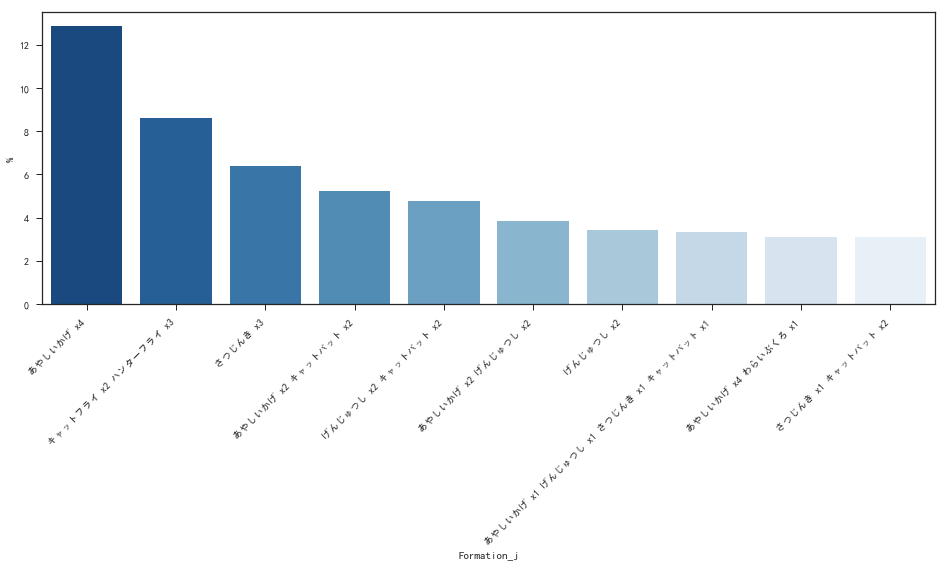

                                         Formation_j          %
あやしいかげ x4                                       1286  12.861286
キャットフライ x2 ハンターフライ x3                            860   8.600860
さつじんき x3                                         640   6.400640
あやしいかげ x2 キャットバット x2                             523   5.230523
げんじゅつし x2 キャットバット x2                             476   4.760476
あやしいかげ x2 げんじゅつし x2                              383   3.830383
げんじゅつし x2                                        343   3.430343
あやしいかげ x1 げんじゅつし x1 さつじんき x1 キャットバット x1          331   3.310331
あやしいかげ x4 わらいぶくろ x1                              311   3.110311
さつじんき x1 キャットバット x2                              308   3.080308
げんじゅつし x3                                        302   3.020302
わらいぶくろ x1 キャットバット x3                             301   3.010301
さつじんき x2 わらいぶくろ x1                               281   2.810281
げんじゅつし x3 わらいぶくろ x1                              275   2.750275
さつじんき x1 キャットバット x1                     

**Garuna Tower F1**

-----


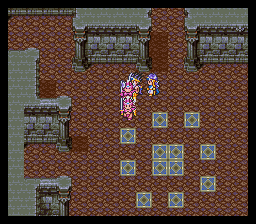

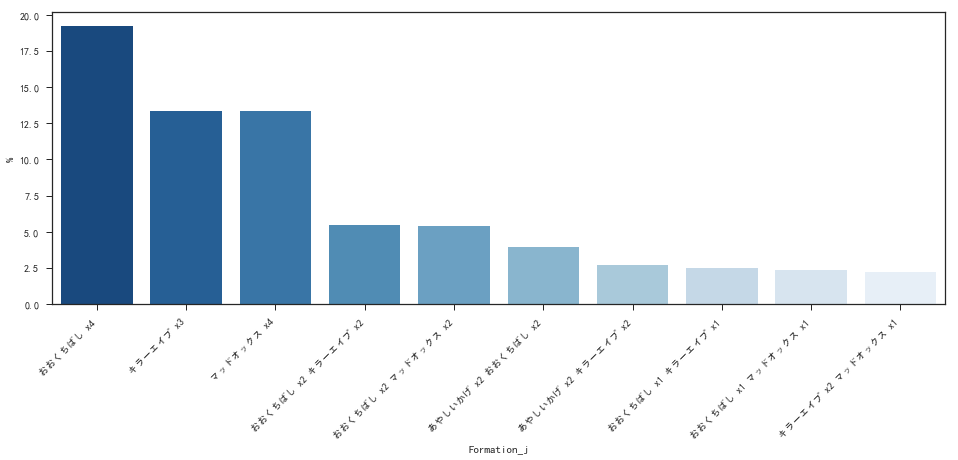

                                          Formation_j          %
おおくちばし x4                                        1920  19.201920
キラーエイプ x3                                        1336  13.361336
マッドオックス x4                                       1331  13.311331
おおくちばし x2 キラーエイプ x2                               547   5.470547
おおくちばし x2 マッドオックス x2                              536   5.360536
あやしいかげ x2 おおくちばし x2                               392   3.920392
あやしいかげ x2 キラーエイプ x2                               270   2.700270
おおくちばし x1 キラーエイプ x1                               248   2.480248
おおくちばし x1 マッドオックス x1                              235   2.350235
キラーエイプ x2 マッドオックス x1                              219   2.190219
あやしいかげ x2 マッドオックス x2                              210   2.100210
あやしいかげ x1 おおくちばし x1                               185   1.850185
キラーエイプ x1 マッドオックス x1                              176   1.760176
げんじゅつし x1 キラーエイプ x2                               161   1.610161
おおくちばし x1 おおくちばし x1      

**Garuna Tower F2**

-----


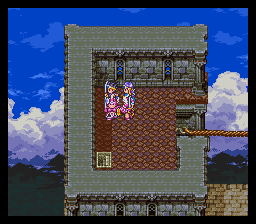

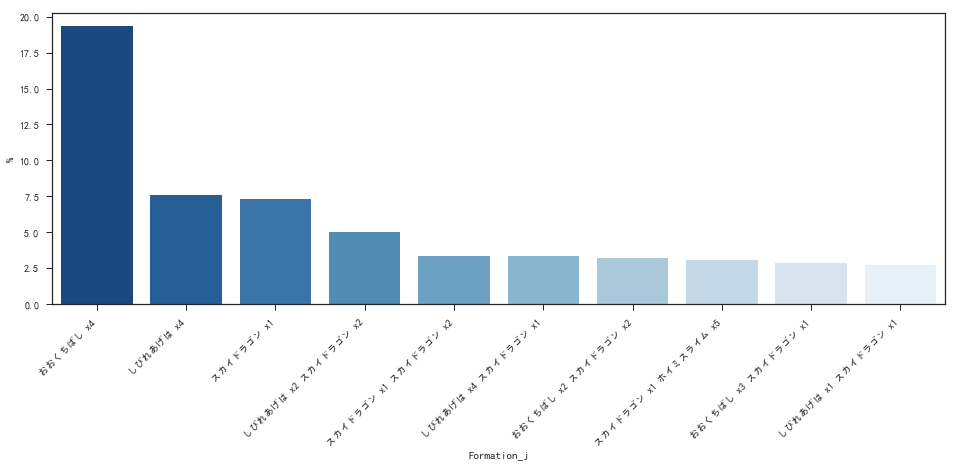

                                           Formation_j          %
おおくちばし x4                                         1932  19.321932
しびれあげは x4                                          759   7.590759
スカイドラゴン x1                                         733   7.330733
しびれあげは x2 スカイドラゴン x2                               502   5.020502
スカイドラゴン x1 スカイドラゴン x2                              336   3.360336
しびれあげは x4 スカイドラゴン x1                               335   3.350335
おおくちばし x2 スカイドラゴン x2                               324   3.240324
スカイドラゴン x1 ホイミスライム x5                              310   3.100310
おおくちばし x3 スカイドラゴン x1                               284   2.840284
しびれあげは x1 スカイドラゴン x1                               271   2.710271
しびれあげは x1 ホイミスライム x1                               269   2.690269
スカイドラゴン x2 ホイミスライム x2                              244   2.440244
おおくちばし x3 ホイミスライム x3                               244   2.440244
しびれあげは x3 ホイミスライム x4                               236   2.360236
おおくちばし x2 

**Garuna Tower F3**

-----


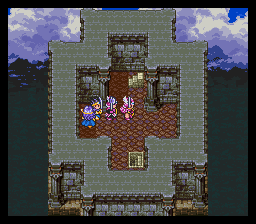

**Chance to see metal: 51.08%**

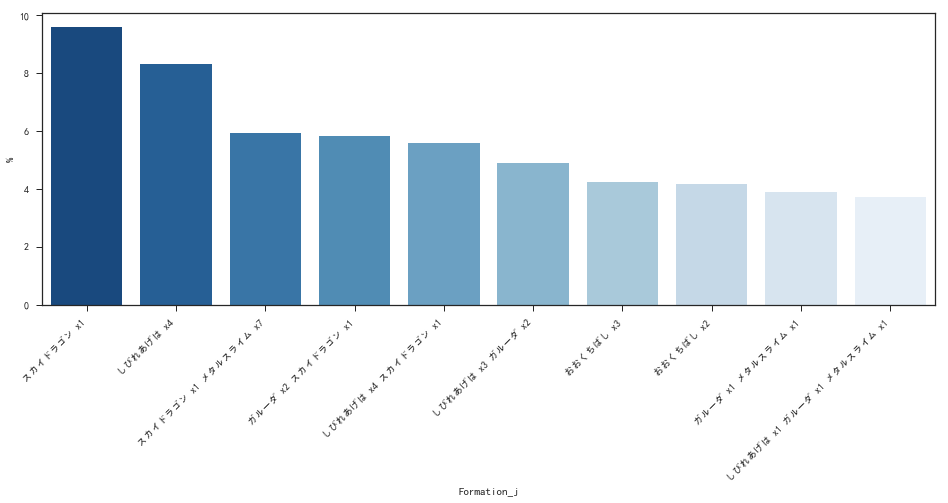

                              Formation_j         %
スカイドラゴン x1                            960  9.600960
しびれあげは x4                             832  8.320832
スカイドラゴン x1 メタルスライム x7                 594  5.940594
ガルーダ x2 スカイドラゴン x1                    582  5.820582
しびれあげは x4 スカイドラゴン x1                  557  5.570557
しびれあげは x3 ガルーダ x2                     489  4.890489
おおくちばし x3                             424  4.240424
おおくちばし x2                             415  4.150415
ガルーダ x1 メタルスライム x1                    388  3.880388
しびれあげは x1 ガルーダ x1 メタルスライム x1          372  3.720372
しびれあげは x1 ガルーダ x1                     361  3.610361
ガルーダ x2 メタルスライム x4                    342  3.420342
しびれあげは x1 メタルスライム x1                  326  3.260326
しびれあげは x4 メタルスライム x4                  299  2.990299
メタルスライム x6                            276  2.760276
しびれあげは x2 ガルーダ x2                     271  2.710271
メタルスライム x7                            260  2.600260
メタルスライム x3                            259  2.590259
ガルーダ x2 メタルス

**Garuna Tower F4**

-----


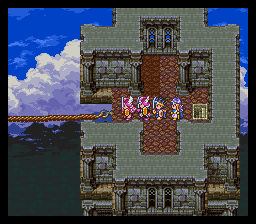

**Chance to see metal: 51.18%**

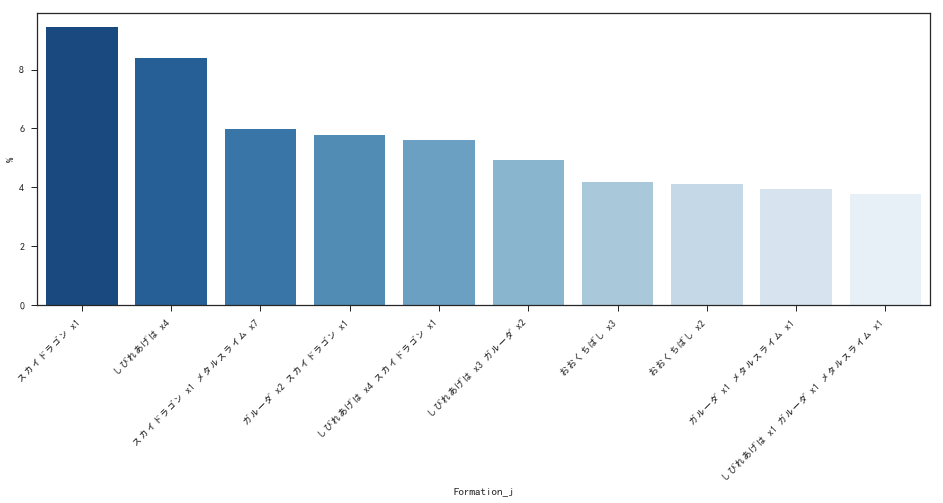

                              Formation_j         %
スカイドラゴン x1                            946  9.460946
しびれあげは x4                             841  8.410841
スカイドラゴン x1 メタルスライム x7                 598  5.980598
ガルーダ x2 スカイドラゴン x1                    577  5.770577
しびれあげは x4 スカイドラゴン x1                  560  5.600560
しびれあげは x3 ガルーダ x2                     493  4.930493
おおくちばし x3                             417  4.170417
おおくちばし x2                             412  4.120412
ガルーダ x1 メタルスライム x1                    394  3.940394
しびれあげは x1 ガルーダ x1 メタルスライム x1          377  3.770377
しびれあげは x1 ガルーダ x1                     370  3.700370
ガルーダ x2 メタルスライム x4                    361  3.610361
しびれあげは x1 メタルスライム x1                  330  3.300330
しびれあげは x4 メタルスライム x4                  288  2.880288
しびれあげは x2 ガルーダ x2                     265  2.650265
しびれあげは x2 ガルーダ x2 メタルスライム x3          259  2.590259
メタルスライム x6                            258  2.580258
メタルスライム x3                            257  2.570257
ガルーダ x2 メタルス

**Garuna Tower F5**

-----


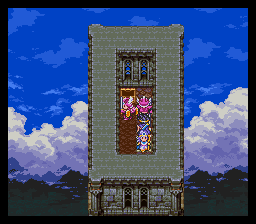

**Chance to see metal: 51.52%**

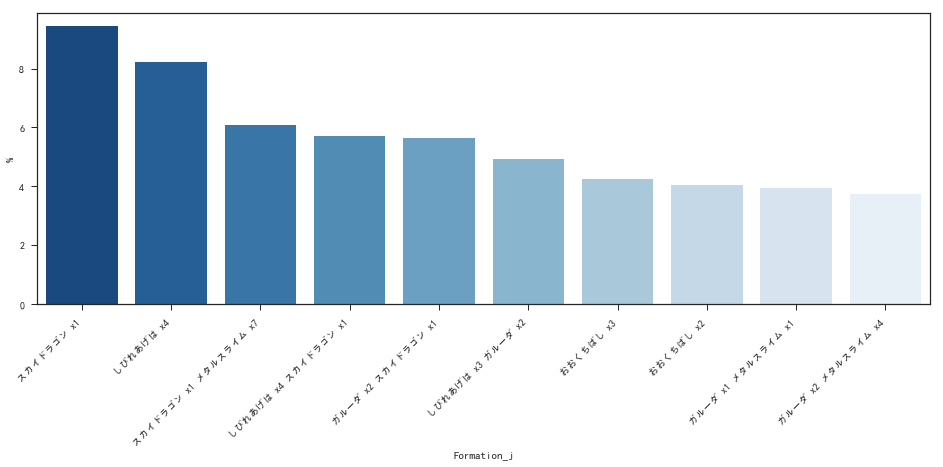

                              Formation_j         %
スカイドラゴン x1                            943  9.430943
しびれあげは x4                             821  8.210821
スカイドラゴン x1 メタルスライム x7                 609  6.090609
しびれあげは x4 スカイドラゴン x1                  572  5.720572
ガルーダ x2 スカイドラゴン x1                    565  5.650565
しびれあげは x3 ガルーダ x2                     494  4.940494
おおくちばし x3                             426  4.260426
おおくちばし x2                             404  4.040404
ガルーダ x1 メタルスライム x1                    394  3.940394
ガルーダ x2 メタルスライム x4                    375  3.750375
しびれあげは x1 ガルーダ x1                     372  3.720372
しびれあげは x1 ガルーダ x1 メタルスライム x1          369  3.690369
しびれあげは x1 メタルスライム x1                  312  3.120312
しびれあげは x4 メタルスライム x4                  302  3.020302
メタルスライム x3                            261  2.610261
メタルスライム x6                            258  2.580258
しびれあげは x2 ガルーダ x2 メタルスライム x3          255  2.550255
メタルスライム x4                            255  2.550255
ガルーダ x2 メタルス

**Gaia's Navel F1**

-----


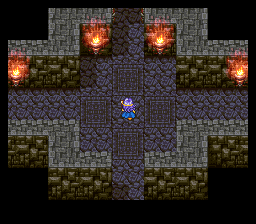

**Chance to see metal: 11.42%**

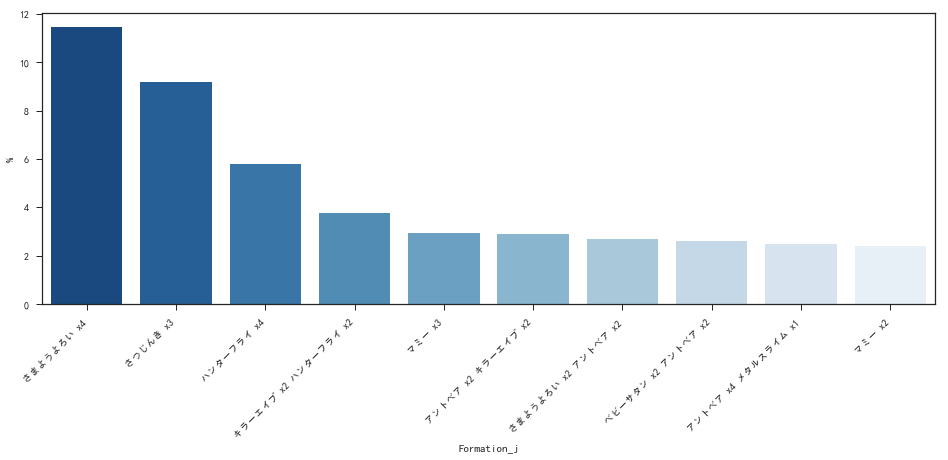

                                           Formation_j          %
さまようよろい x4                                        1147  11.471147
さつじんき x3                                           916   9.160916
ハンターフライ x4                                         579   5.790579
キラーエイプ x2 ハンターフライ x2                               378   3.780378
マミー x3                                             294   2.940294
アントべア x2 キラーエイプ x2                                 292   2.920292
さまようよろい x2 アントべア x2                                270   2.700270
べビーサタン x2 アントべア x2                                 262   2.620262
アントべア x4 メタルスライム x1                                249   2.490249
マミー x2                                             240   2.400240
ハンターフライ x4 メタルスライム x1                              236   2.360236
キラーエイプ x3 メタルスライム x1                               227   2.270227
さまようよろい x2 べビーサタン x2                               224   2.240224
べビーサタン x4 メタルスライム x1                               222   2.220222
さまようよろい x2

**Gaia's Navel B1**

-----


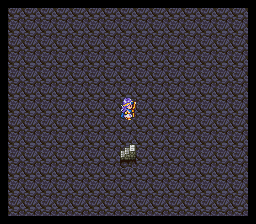

**Chance to see metal: 11.56%**

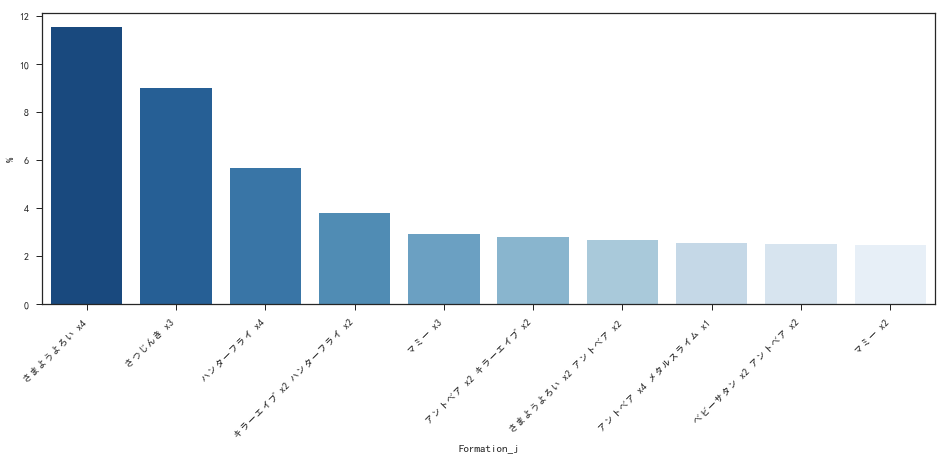

                                           Formation_j          %
さまようよろい x4                                        1157  11.571157
さつじんき x3                                           899   8.990899
ハンターフライ x4                                         569   5.690569
キラーエイプ x2 ハンターフライ x2                               381   3.810381
マミー x3                                             292   2.920292
アントべア x2 キラーエイプ x2                                 281   2.810281
さまようよろい x2 アントべア x2                                268   2.680268
アントべア x4 メタルスライム x1                                254   2.540254
べビーサタン x2 アントべア x2                                 252   2.520252
マミー x2                                             245   2.450245
べビーサタン x4 メタルスライム x1                               236   2.360236
キラーエイプ x3 メタルスライム x1                               227   2.270227
さまようよろい x2 キラーエイプ x2                               226   2.260226
ハンターフライ x4 メタルスライム x1                              220   2.200220
さまようよろい x4

**Gaia's Navel B2**

-----


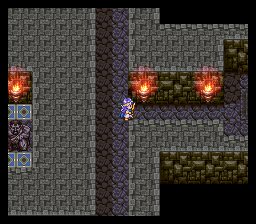

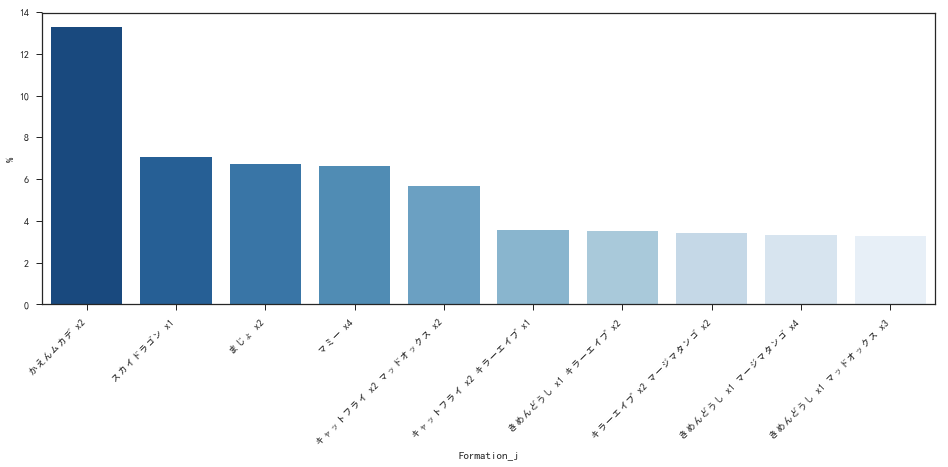

                                            Formation_j          %
かえんムカデ x2                                          1331  13.311331
スカイドラゴン x1                                          705   7.050705
まじょ x2                                              672   6.720672
マミー x4                                              664   6.640664
キャットフライ x2 マッドオックス x2                               567   5.670567
キャットフライ x2 キラーエイプ x1                                358   3.580358
きめんどうし x1 キラーエイプ x2                                 354   3.540354
キラーエイプ x2 マージマタンゴ x2                                341   3.410341
きめんどうし x1 マージマタンゴ x4                                333   3.330333
きめんどうし x1 マッドオックス x3                                329   3.290329
キャットフライ x2 マージマタンゴ x3                               309   3.090309
きめんどうし x1 キャットフライ x3                                307   3.070307
キャットフライ x1 キラーエイプ x1 マッドオックス x1 マージマタンゴ x1          281   2.810281
キャットフライ x1 マッドオックス x1                               278   2.78

**Ra Mirror Cave F1**

-----


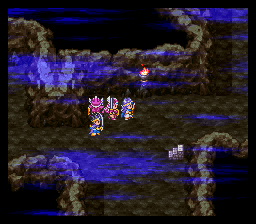

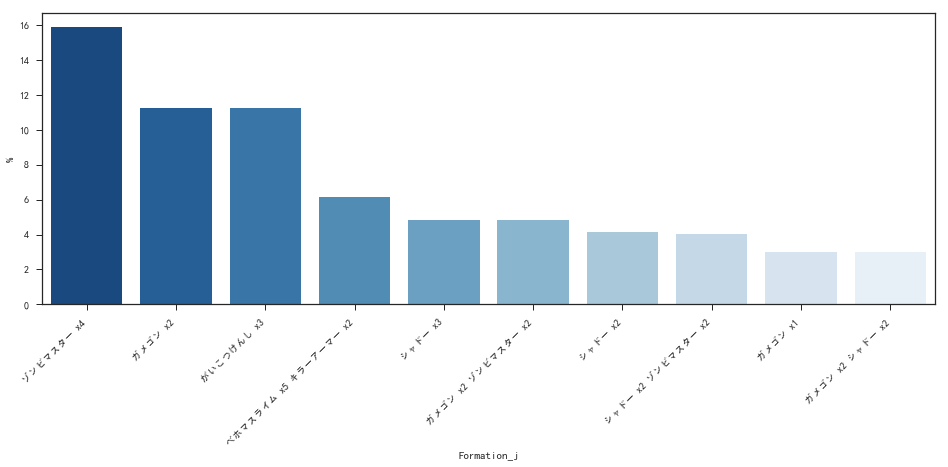

                                          Formation_j          %
ゾンビマスター x4                                       1589  15.891589
ガメゴン x2                                          1125  11.251125
がいこつけんし x3                                       1122  11.221122
べホマスライム x5 キラーアーマー x2                             616   6.160616
シャドー x3                                           484   4.840484
ガメゴン x2 ゾンビマスター x2                                481   4.810481
シャドー x2                                           415   4.150415
シャドー x2 ゾンビマスター x2                                403   4.030403
ガメゴン x1                                           299   2.990299
ガメゴン x2 シャドー x2                                   299   2.990299
がいこつけんし x1 ゾンビマスター x2                             274   2.740274
ガメゴン x1 ゾンビマスター x1                                237   2.370237
べホマスライム x4 キラーアーマー x2                             216   2.160216
シャドー x1 ゾンビマスター x1                                188   1.880188
がいこつけんし x1 ゾンビマスター x1    

**Zipangu Cave F1**

-----


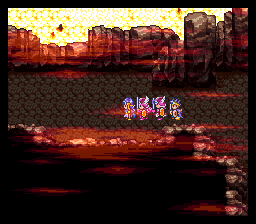

**Chance to see metal: 9.7%**

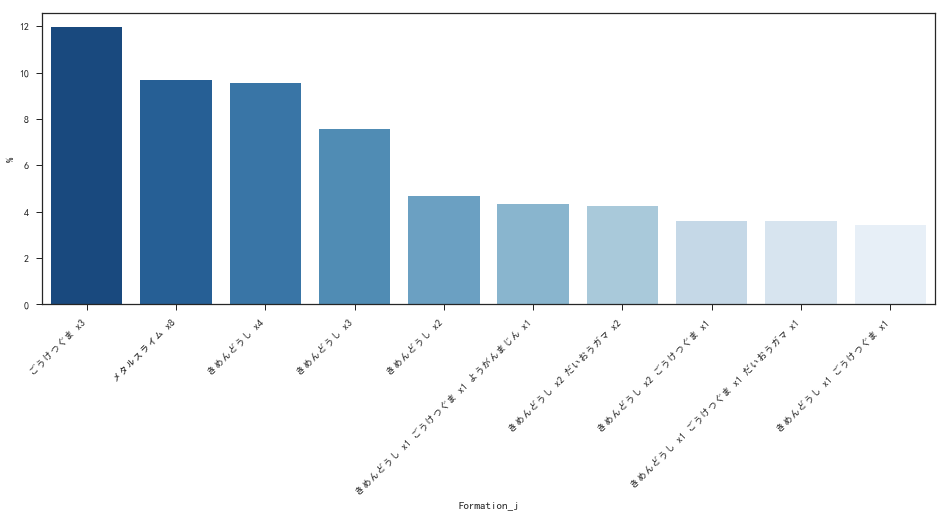

                                Formation_j          %
ごうけつぐま x3                              1198  11.981198
メタルスライム x8                              970   9.700970
きめんどうし x4                               953   9.530953
きめんどうし x3                               756   7.560756
きめんどうし x2                               466   4.660466
きめんどうし x1 ごうけつぐま x1 ようがんまじん x1          434   4.340434
きめんどうし x2 だいおうガマ x2                     425   4.250425
きめんどうし x2 ごうけつぐま x1                     359   3.590359
きめんどうし x1 ごうけつぐま x1 だいおうガマ x1           358   3.580358
きめんどうし x1 ごうけつぐま x1                     342   3.420342
きめんどうし x2 ようがんまじん x1                    338   3.380338
ごうけつぐま x2 ようがんまじん x1                    336   3.360336
きめんどうし x1 ごうけつぐま x2                     331   3.310331
ごうけつぐま x2 だいおうガマ x1                     316   3.160316
ようがんまじん x1                              297   2.970297
きめんどうし x1 ようがんまじん x1                    268   2.680268
ごうけつぐま x1 だいおうガマ x1 ようがんまじん x1          253   2.530253
ごうけつぐま x1 

**Necrogond F1**

-----


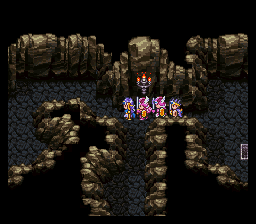

**Chance to see metal: 5.95%**

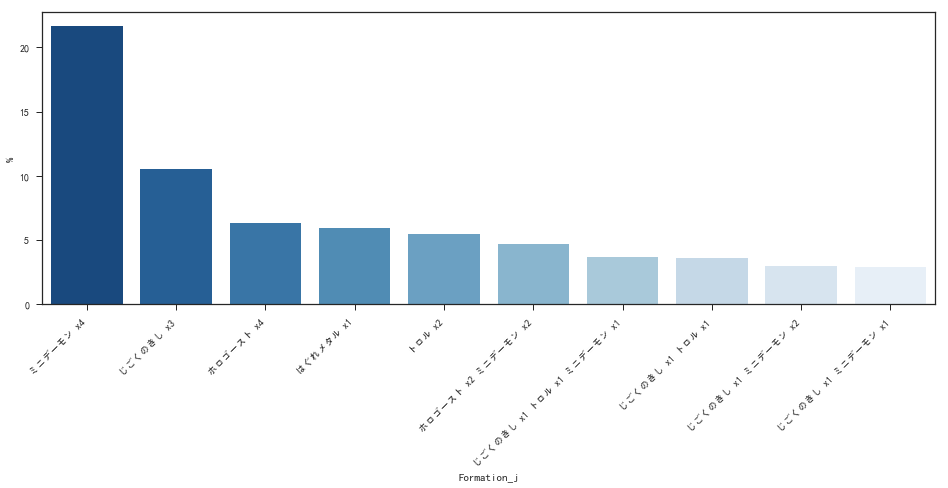

                               Formation_j          %
ミニデーモン x4                             2164  21.642164
じごくのきし x3                             1053  10.531053
ホロゴースト x4                              634   6.340634
はぐれメタル x1                              595   5.950595
トロル x2                                 544   5.440544
ホロゴースト x2 ミニデーモン x2                    466   4.660466
じごくのきし x1 トロル x1 ミニデーモン x1             364   3.640364
じごくのきし x1 トロル x1                       361   3.610361
じごくのきし x1 ミニデーモン x2                    298   2.980298
じごくのきし x1 ミニデーモン x1                    288   2.880288
じごくのきし x1 ホロゴースト x1 ミニデーモン x1          286   2.860286
じごくのきし x2 ミニデーモン x1                    275   2.750275
トロル x1 ホロゴースト x1 ミニデーモン x1             264   2.640264
トロル x1 ミニデーモン x2                       257   2.570257
ミニデーモン x3                              244   2.440244
ホロゴースト x1 ミニデーモン x1                    243   2.430243
ミニデーモン x2                              234   2.340234
トロル x1 ミニデーモン x1            

**Necrogond B1**

-----


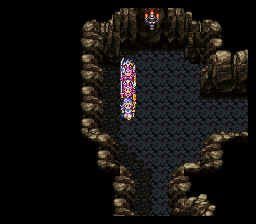

**Chance to see metal: 2.0%**

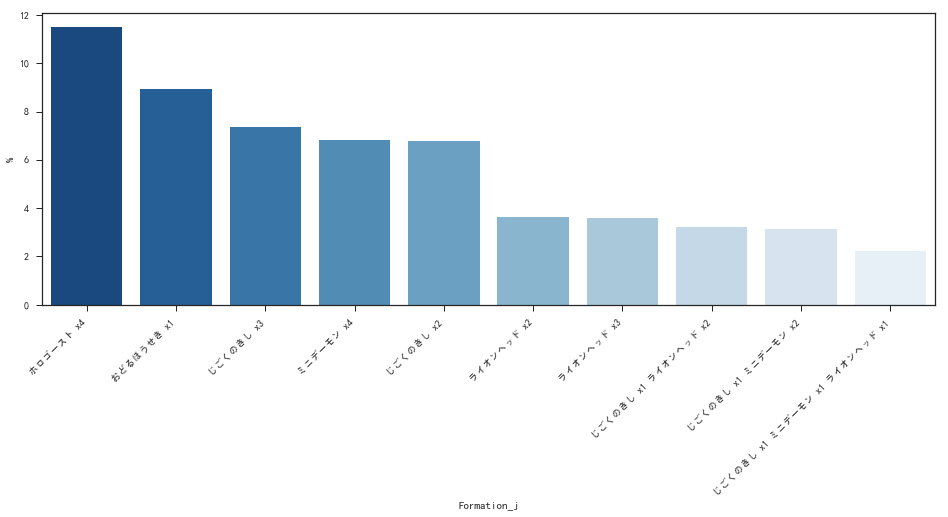

                                            Formation_j          %
ホロゴースト x4                                          1150  11.501150
おどるほうせき x1                                          895   8.950895
じごくのきし x3                                           735   7.350735
ミニデーモン x4                                           682   6.820682
じごくのきし x2                                           679   6.790679
ライオンヘッド x2                                          365   3.650365
ライオンヘッド x3                                          361   3.610361
じごくのきし x1 ライオンヘッド x2                                323   3.230323
じごくのきし x1 ミニデーモン x2                                 313   3.130313
じごくのきし x1 ミニデーモン x1 ライオンヘッド x1                      222   2.220222
じごくのきし x1 ライオンヘッド x1                                212   2.120212
フロストギズモ x2 ミニデーモン x2                                207   2.070207
フロストギズモ x2 ライオンヘッド x2                               201   2.010201
はぐれメタル x1                                           200   2.00

**Necrogond B2**

-----


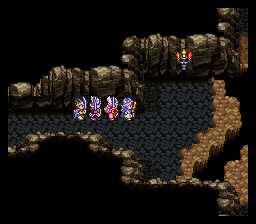

**Chance to see metal: 1.83%**

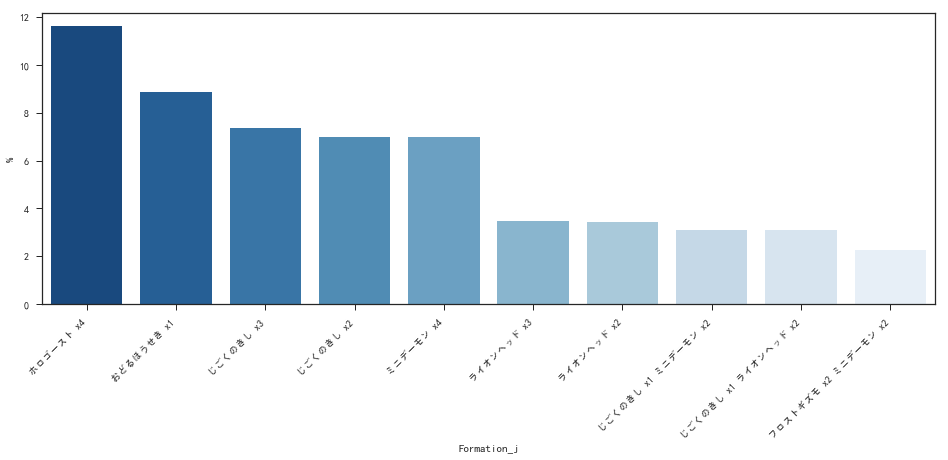

                                            Formation_j          %
ホロゴースト x4                                          1161  11.611161
おどるほうせき x1                                          886   8.860886
じごくのきし x3                                           736   7.360736
じごくのきし x2                                           700   7.000700
ミニデーモン x4                                           698   6.980698
ライオンヘッド x3                                          348   3.480348
ライオンヘッド x2                                          344   3.440344
じごくのきし x1 ミニデーモン x2                                 311   3.110311
じごくのきし x1 ライオンヘッド x2                                309   3.090309
フロストギズモ x2 ミニデーモン x2                                228   2.280228
じごくのきし x1 ライオンヘッド x1                                222   2.220222
じごくのきし x1 ミニデーモン x1 ライオンヘッド x1                      213   2.130213
フロストギズモ x2 ライオンヘッド x2                               211   2.110211
じごくのきし x1 ミニデーモン x1                                 204   2.04

**Necrogond B3**

-----


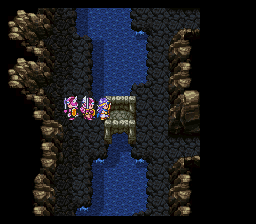

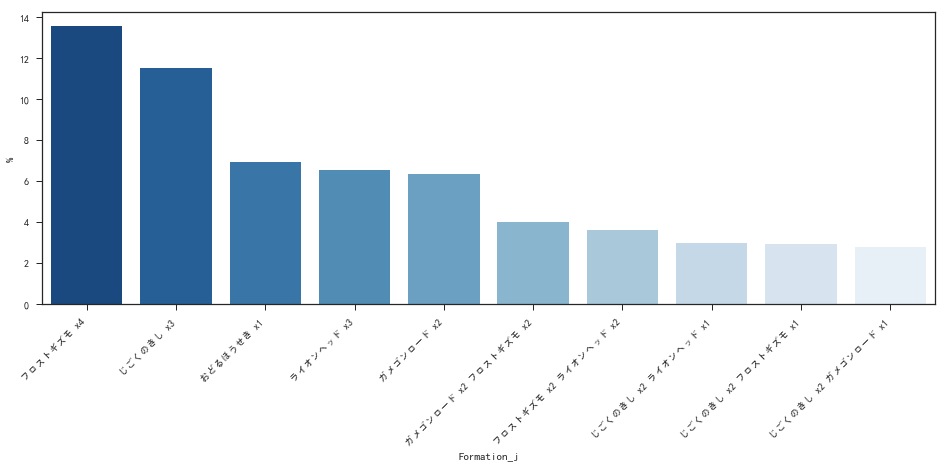

                                  Formation_j          %
フロストギズモ x4                               1356  13.561356
じごくのきし x3                                1155  11.551155
おどるほうせき x1                                695   6.950695
ライオンヘッド x3                                656   6.560656
ガメゴンロード x2                                636   6.360636
ガメゴンロード x2 フロストギズモ x2                     403   4.030403
フロストギズモ x2 ライオンヘッド x2                     363   3.630363
じごくのきし x2 ライオンヘッド x1                      296   2.960296
じごくのきし x2 フロストギズモ x1                      294   2.940294
じごくのきし x2 ガメゴンロード x1                      280   2.800280
じごくのきし x1 ガメゴンロード x1 ライオンヘッド x1           263   2.630263
ガメゴンロード x1 ライオンヘッド x1                     243   2.430243
じごくのきし x1 ライオンヘッド x1                      233   2.330233
ガメゴンロード x1 ライオンヘッド x2                     231   2.310231
じごくのきし x1 フロストギズモ x1 ライオンヘッド x1           227   2.270227
じごくのきし x1 ガメゴンロード x1                      224   2.240224
じごくのきし x1 ライオンヘッド x2           

**Baramos Castle Outer**

-----


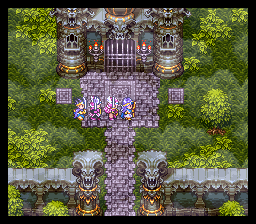

**Chance to see metal: 18.4%**

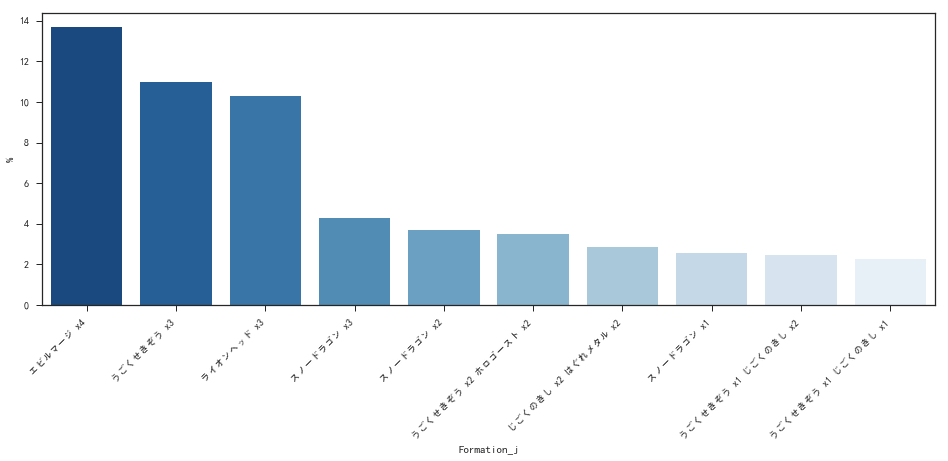

                                            Formation_j          %
エビルマージ x4                                          1369  13.691369
うごくせきぞう x3                                         1097  10.971097
ライオンヘッド x3                                         1028  10.281028
スノードラゴン x3                                          430   4.300430
スノードラゴン x2                                          371   3.710371
うごくせきぞう x2 ホロゴースト x2                                348   3.480348
じごくのきし x2 はぐれメタル x2                                 287   2.870287
スノードラゴン x1                                          255   2.550255
うごくせきぞう x1 じごくのきし x2                                245   2.450245
うごくせきぞう x1 じごくのきし x1                                227   2.270227
じごくのきし x2 ホロゴースト x1                                 221   2.210221
エビルマージ x2 ホロゴースト x2                                 205   2.050205
うごくせきぞう x2 エビルマージ x1                                190   1.900190
じごくのきし x2 エビルマージ x1                                 189   1.89

**Baramos Castle F1**

-----


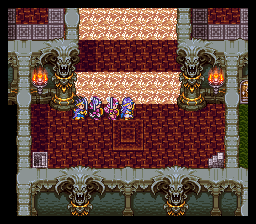

**Chance to see metal: 17.48%**

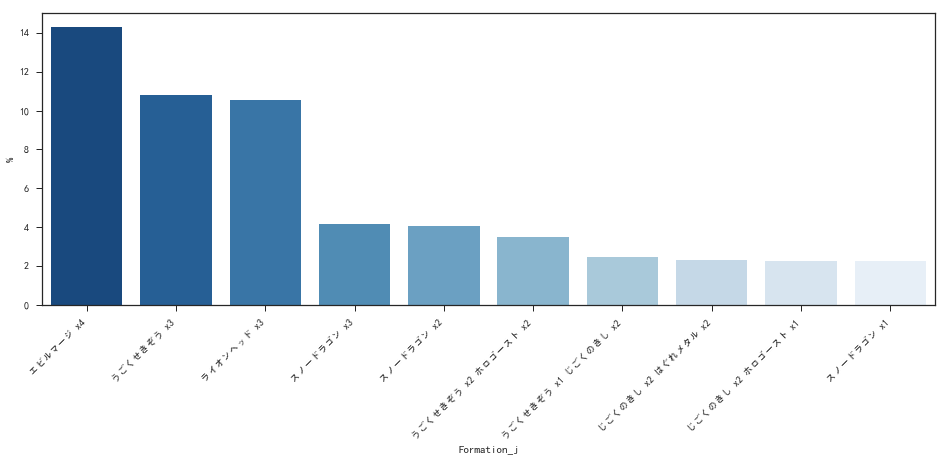

                                           Formation_j          %
エビルマージ x4                                         1430  14.301430
うごくせきぞう x3                                        1080  10.801080
ライオンヘッド x3                                        1054  10.541054
スノードラゴン x3                                         414   4.140414
スノードラゴン x2                                         405   4.050405
うごくせきぞう x2 ホロゴースト x2                               348   3.480348
うごくせきぞう x1 じごくのきし x2                               248   2.480248
じごくのきし x2 はぐれメタル x2                                231   2.310231
じごくのきし x2 ホロゴースト x1                                227   2.270227
スノードラゴン x1                                         227   2.270227
エビルマージ x2 ホロゴースト x2                                207   2.070207
うごくせきぞう x1 じごくのきし x1                               205   2.050205
じごくのきし x2 エビルマージ x1                                204   2.040204
うごくせきぞう x2 じごくのきし x1                               201   2.010201
うごくせきぞう x2

**Baramos Castle B1**

-----


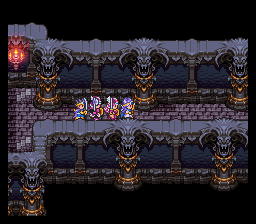

**Chance to see metal: 17.64%**

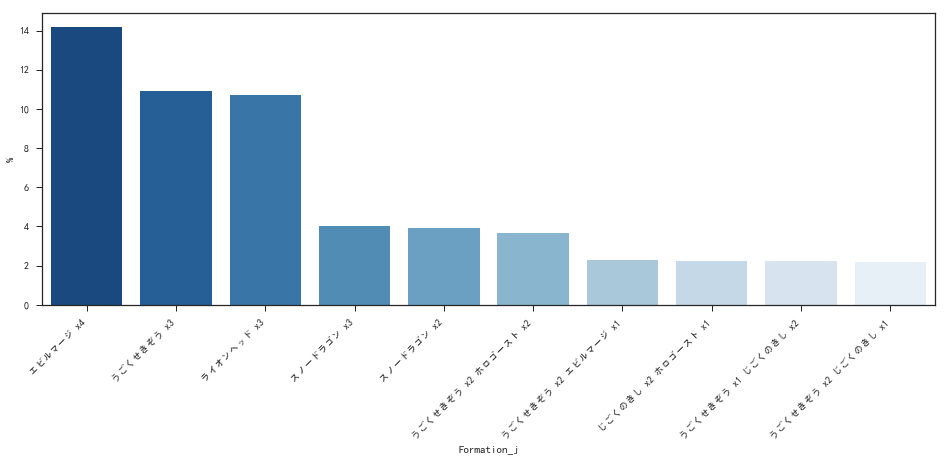

                                           Formation_j          %
エビルマージ x4                                         1418  14.181418
うごくせきぞう x3                                        1094  10.941094
ライオンヘッド x3                                        1072  10.721072
スノードラゴン x3                                         403   4.030403
スノードラゴン x2                                         392   3.920392
うごくせきぞう x2 ホロゴースト x2                               365   3.650365
うごくせきぞう x2 エビルマージ x1                               229   2.290229
じごくのきし x2 ホロゴースト x1                                226   2.260226
うごくせきぞう x1 じごくのきし x2                               226   2.260226
うごくせきぞう x2 じごくのきし x1                               216   2.160216
スノードラゴン x1                                         216   2.160216
じごくのきし x2 エビルマージ x1                                210   2.100210
じごくのきし x2 はぐれメタル x2                                206   2.060206
エビルマージ x2 ホロゴースト x2                                205   2.050205
うごくせきぞう x1

**Mountain Cave F1**

-----


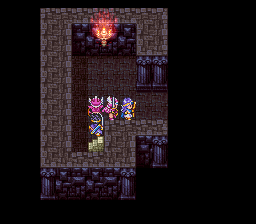

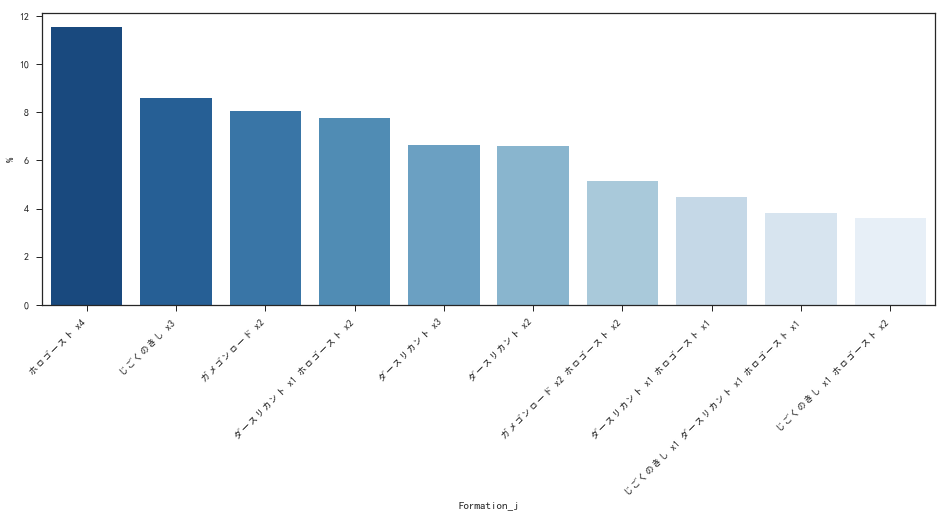

                                 Formation_j          %
ホロゴースト x4                               1155  11.551155
じごくのきし x3                                859   8.590859
ガメゴンロード x2                               807   8.070807
ダースリカント x1 ホロゴースト x2                     775   7.750775
ダースリカント x3                               665   6.650665
ダースリカント x2                               661   6.610661
ガメゴンロード x2 ホロゴースト x2                     515   5.150515
ダースリカント x1 ホロゴースト x1                     450   4.500450
じごくのきし x1 ダースリカント x1 ホロゴースト x1           382   3.820382
じごくのきし x1 ホロゴースト x2                      362   3.620362
マドハンド x2                                 320   3.200320
マドハンド x3                                 316   3.160316
ガメゴンロード x1 ホロゴースト x1                     237   2.370237
おどるほうせき x1                               211   2.110211
ガメゴンロード x1 ダースリカント x1 ホロゴースト x1          203   2.030203
じごくのきし x1 ホロゴースト x1                      201   2.010201
おどるほうせき x1 ホロゴースト x3                     192   1

**Mountain Cave B1**

-----


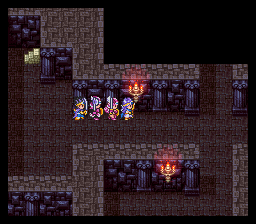

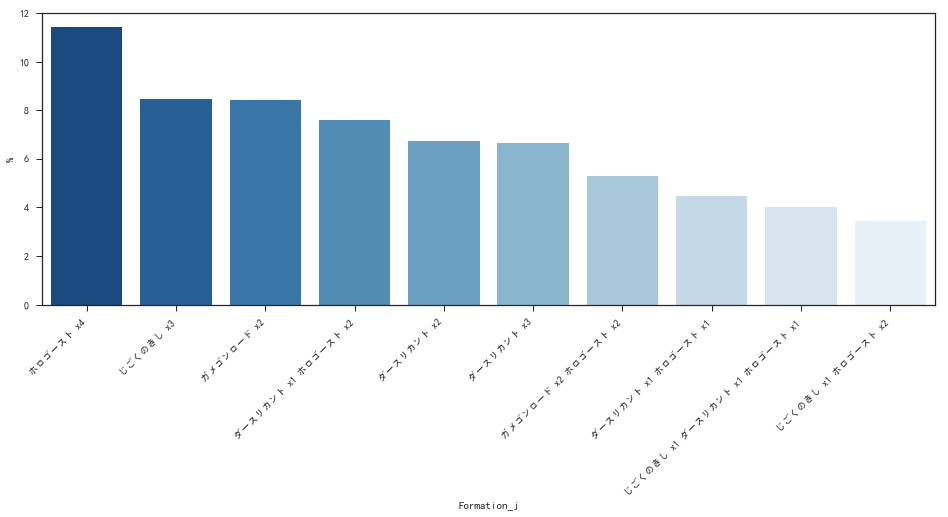

                                 Formation_j          %
ホロゴースト x4                               1142  11.421142
じごくのきし x3                                846   8.460846
ガメゴンロード x2                               840   8.400840
ダースリカント x1 ホロゴースト x2                     759   7.590759
ダースリカント x2                               673   6.730673
ダースリカント x3                               664   6.640664
ガメゴンロード x2 ホロゴースト x2                     528   5.280528
ダースリカント x1 ホロゴースト x1                     449   4.490449
じごくのきし x1 ダースリカント x1 ホロゴースト x1           401   4.010401
じごくのきし x1 ホロゴースト x2                      346   3.460346
マドハンド x2                                 321   3.210321
マドハンド x3                                 299   2.990299
ガメゴンロード x1 ホロゴースト x1                     246   2.460246
ガメゴンロード x1 ダースリカント x1 ホロゴースト x1          220   2.200220
じごくのきし x1 ホロゴースト x1                      215   2.150215
おどるほうせき x1                               207   2.070207
ガメゴンロード x1 ダースリカント x1 ホロゴースト x2          193   1

**Rubiss Tower F1**

-----


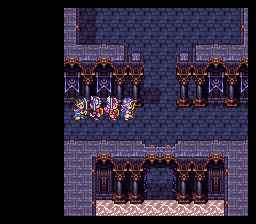

**Chance to see metal: 25.3%**

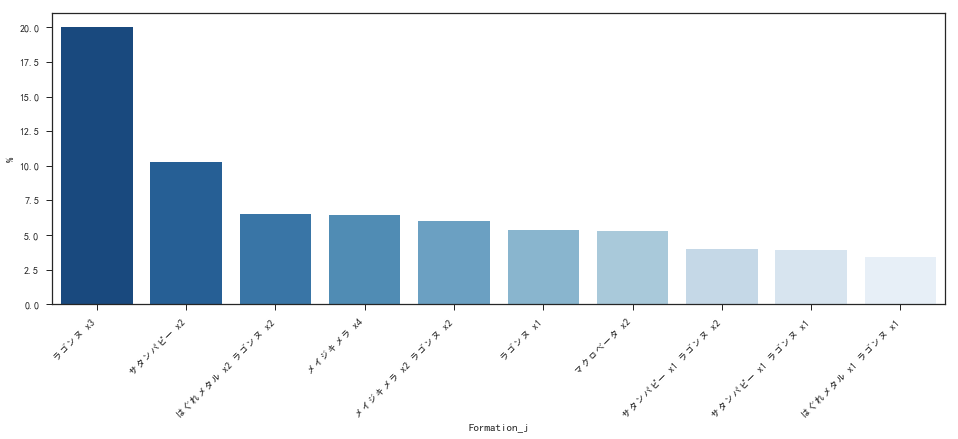

                                       Formation_j          %
ラゴンヌ x3                                       2005  20.052005
サタンパピー x2                                     1029  10.291029
はぐれメタル x2 ラゴンヌ x2                              651   6.510651
メイジキメラ x4                                      642   6.420642
メイジキメラ x2 ラゴンヌ x2                              604   6.040604
ラゴンヌ x1                                        536   5.360536
マクロべータ x2                                      526   5.260526
サタンパピー x1 ラゴンヌ x2                              400   4.000400
サタンパピー x1 ラゴンヌ x1                              389   3.890389
はぐれメタル x1 ラゴンヌ x1                              344   3.440344
メイジキメラ x1 ラゴンヌ x1                              311   3.110311
サタンパピー x2 ラゴンヌ x1                              292   2.920292
サタンパピー x1 メイジキメラ x1 ラゴンヌ x1                    259   2.590259
サタンパピー x2 メイジキメラ x2                            210   2.100210
メイジキメラ x3                                      152   1.520152
はぐれメタル x

**Rubiss Tower F2**

-----


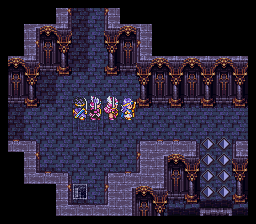

**Chance to see metal: 25.12%**

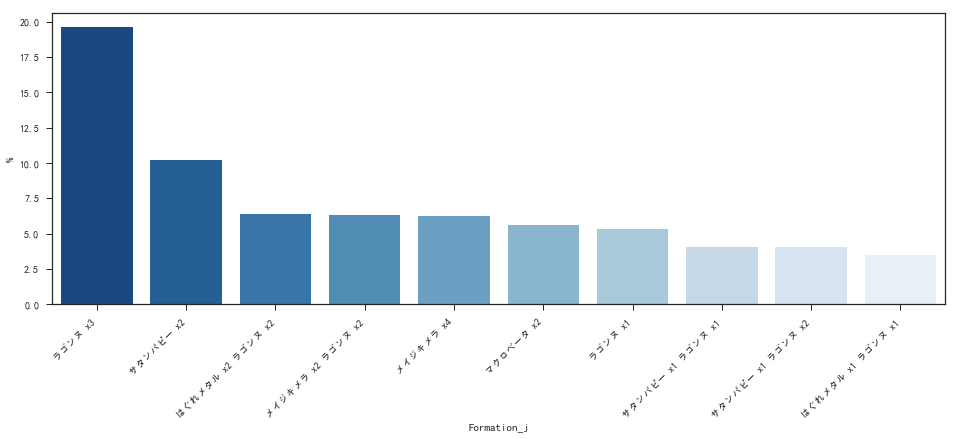

                                       Formation_j          %
ラゴンヌ x3                                       1965  19.651965
サタンパピー x2                                     1019  10.191019
はぐれメタル x2 ラゴンヌ x2                              641   6.410641
メイジキメラ x2 ラゴンヌ x2                              634   6.340634
メイジキメラ x4                                      622   6.220622
マクロべータ x2                                      560   5.600560
ラゴンヌ x1                                        533   5.330533
サタンパピー x1 ラゴンヌ x1                              407   4.070407
サタンパピー x1 ラゴンヌ x2                              407   4.070407
はぐれメタル x1 ラゴンヌ x1                              346   3.460346
メイジキメラ x1 ラゴンヌ x1                              314   3.140314
サタンパピー x2 ラゴンヌ x1                              274   2.740274
サタンパピー x1 メイジキメラ x1 ラゴンヌ x1                    267   2.670267
サタンパピー x2 メイジキメラ x2                            210   2.100210
メイジキメラ x3                                      158   1.580158
はぐれメタル x

**Rubiss Tower F3**

-----


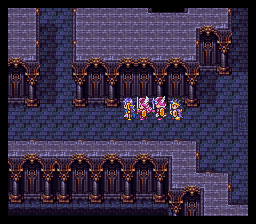

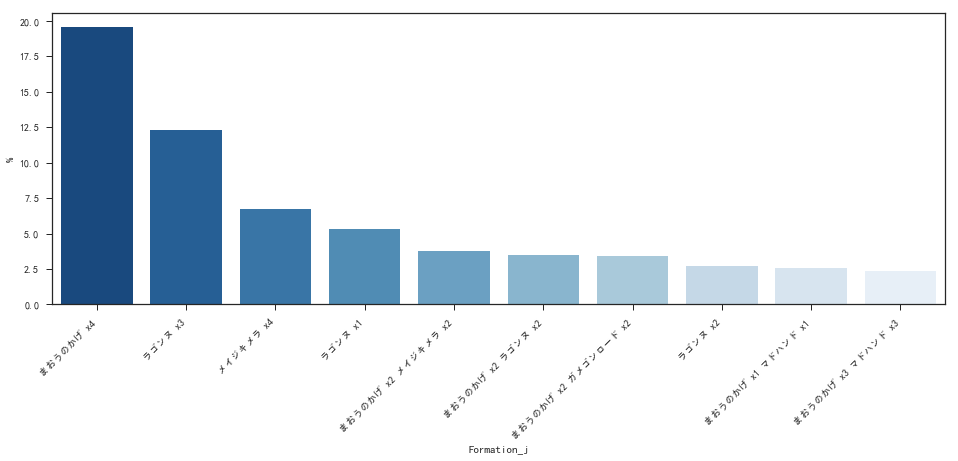

                                         Formation_j          %
まおうのかげ x4                                       1960  19.601960
ラゴンヌ x3                                         1232  12.321232
メイジキメラ x4                                        670   6.700670
ラゴンヌ x1                                          531   5.310531
まおうのかげ x2 メイジキメラ x2                              379   3.790379
まおうのかげ x2 ラゴンヌ x2                                352   3.520352
まおうのかげ x2 ガメゴンロード x2                             340   3.400340
ラゴンヌ x2                                          270   2.700270
まおうのかげ x1 マドハンド x1                               259   2.590259
まおうのかげ x3 マドハンド x3                               235   2.350235
メイジキメラ x2 ラゴンヌ x2                                220   2.200220
まおうのかげ x1 メイジキメラ x1                              208   2.080208
まおうのかげ x1 ガメゴンロード x1                             174   1.740174
ガメゴンロード x2 メイジキメラ x2                             167   1.670167
メイジキメラ x3                               

**Rubiss Tower F6**

-----


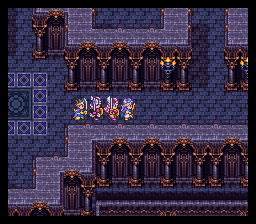

**Chance to see metal: 25.43%**

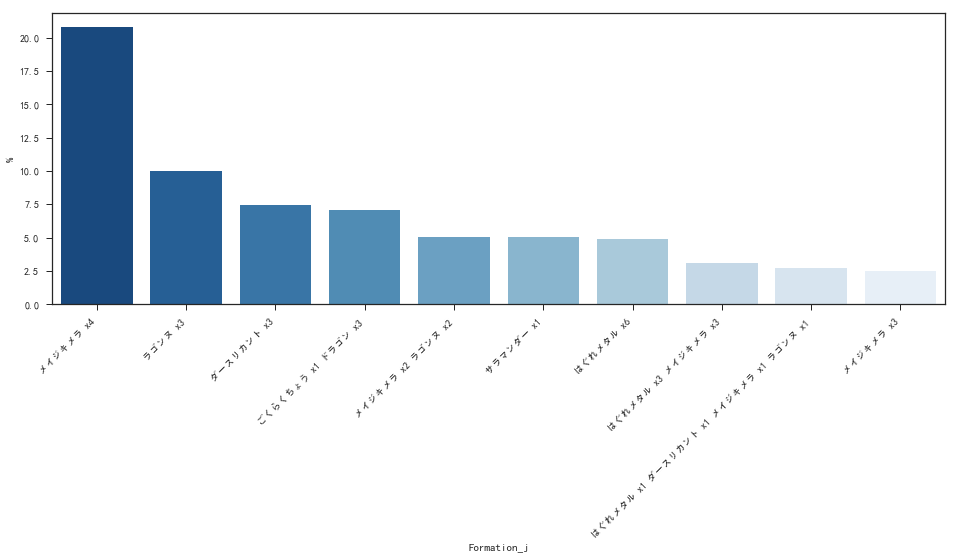

                                        Formation_j          %
メイジキメラ x4                                      2082  20.822082
ラゴンヌ x3                                        1001  10.011001
ダースリカント x3                                      746   7.460746
ごくらくちょう x1 ドラゴン x3                              710   7.100710
メイジキメラ x2 ラゴンヌ x2                               509   5.090509
サラマンダー x1                                       509   5.090509
はぐれメタル x6                                       493   4.930493
はぐれメタル x3 メイジキメラ x3                             311   3.110311
はぐれメタル x1 ダースリカント x1 メイジキメラ x1 ラゴンヌ x1          272   2.720272
メイジキメラ x3                                       248   2.480248
メイジキメラ x1 ラゴンヌ x1                               247   2.470247
ダースリカント x1 メイジキメラ x2                            236   2.360236
メイジキメラ x2                                       225   2.250225
ダースリカント x1 メイジキメラ x1 ラゴンヌ x1                    216   2.160216
はぐれメタル x2 ラゴンヌ x2                               209   2

**Zoma's Castle F1**

-----


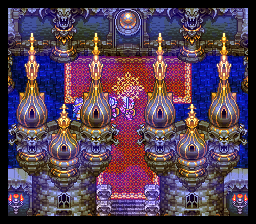

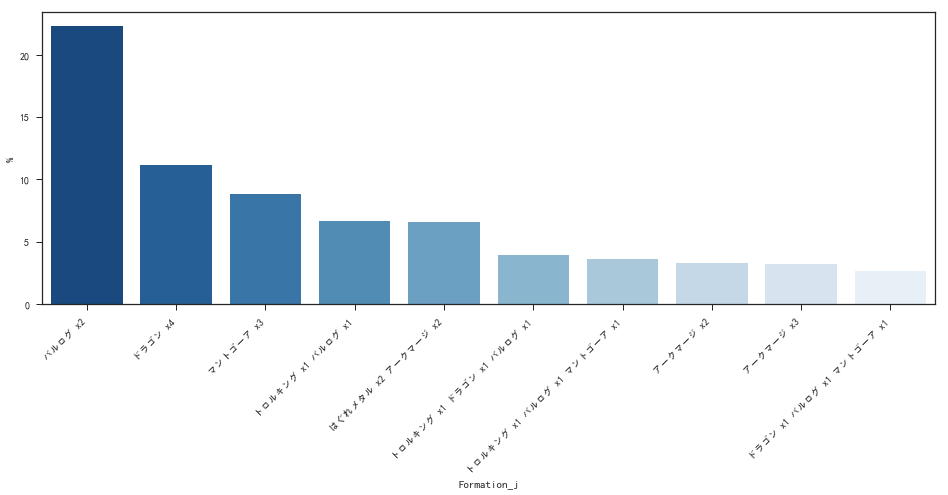

                             Formation_j          %
バルログ x2                             2228  22.282228
ドラゴン x4                             1118  11.181118
マントゴーア x3                            883   8.830883
トロルキング x1 バルログ x1                    669   6.690669
はぐれメタル x2 アークマージ x2                  659   6.590659
トロルキング x1 ドラゴン x1 バルログ x1            393   3.930393
トロルキング x1 バルログ x1 マントゴーア x1          360   3.600360
アークマージ x2                            329   3.290329
アークマージ x3                            323   3.230323
ドラゴン x1 バルログ x1 マントゴーア x1            268   2.680268
トロルキング x1 バルログ x2                    264   2.640264
バルログ x2 マントゴーア x1                    253   2.530253
ドラゴン x1 バルログ x1                      241   2.410241
ドラゴン x1 バルログ x2                      237   2.370237
バルログ x1 マントゴーア x1                    204   2.040204
ドラゴン x2 バルログ x1                      192   1.920192
トロルキング x2 マントゴーア x1                  190   1.900190
バルログ x1 マントゴーア x2                    173   1.730173
トロルキング x2 ドラ

**Zoma's Castle B2**

-----


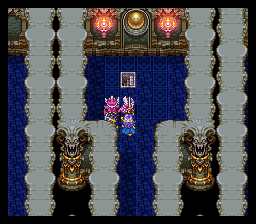

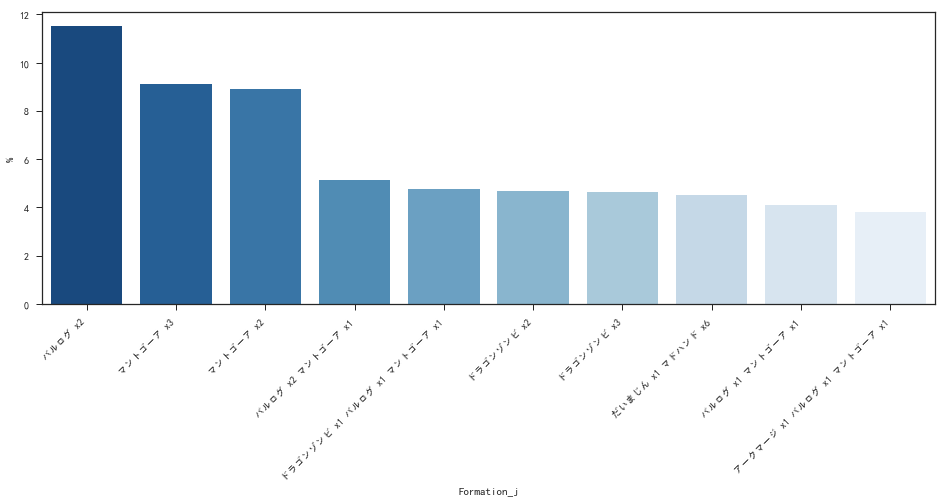

                                Formation_j          %
バルログ x2                                1151  11.511151
マントゴーア x3                               911   9.110911
マントゴーア x2                               890   8.900890
バルログ x2 マントゴーア x1                       515   5.150515
ドラゴンゾンビ x1 バルログ x1 マントゴーア x1            478   4.780478
ドラゴンゾンビ x2                              467   4.670467
ドラゴンゾンビ x3                              464   4.640464
だいまじん x1 マドハンド x6                       450   4.500450
バルログ x1 マントゴーア x1                       409   4.090409
アークマージ x1 バルログ x1 マントゴーア x1             382   3.820382
アークマージ x1 マントゴーア x2                     355   3.550355
ドラゴンゾンビ x1 マントゴーア x2                    345   3.450345
バルログ x1 マントゴーア x2                       326   3.260326
アークマージ x1 ドラゴンゾンビ x1 マントゴーア x1          298   2.980298
ドラゴンゾンビ x1 マントゴーア x1                    283   2.830283
ドラゴンゾンビ x1 バルログ x2                      253   2.530253
だいまじん x1 マドハンド x4                       246   2.460246
だいまじん x1 マ

**Zoma's Castle B3**

-----


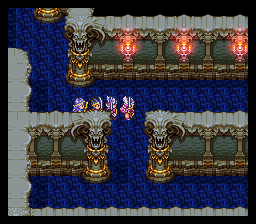

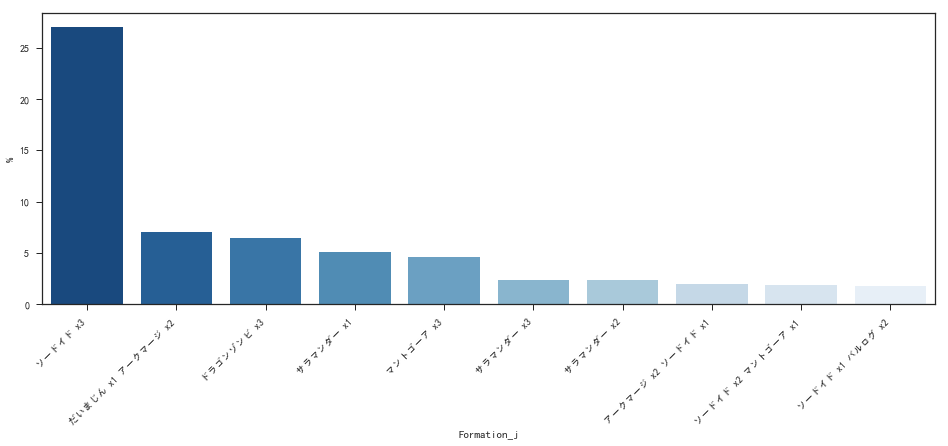

                                Formation_j          %
ソードイド x3                               2705  27.052705
だいまじん x1 アークマージ x2                      701   7.010701
ドラゴンゾンビ x3                              646   6.460646
サラマンダー x1                               511   5.110511
マントゴーア x3                               458   4.580458
サラマンダー x3                               241   2.410241
サラマンダー x2                               237   2.370237
アークマージ x2 ソードイド x1                      196   1.960196
ソードイド x2 マントゴーア x1                      187   1.870187
ソードイド x1 バルログ x2                        180   1.800180
アークマージ x1 ソードイド x1                      177   1.770177
アークマージ x1 ソードイド x2                      172   1.720172
ソードイド x1 バルログ x1                        166   1.660166
アークマージ x1 ソードイド x1 バルログ x1              166   1.660166
ソードイド x1 マントゴーア x1                      158   1.580158
ソードイド x1 バルログ x1 マントゴーア x1              156   1.560156
ソードイド x2 バルログ x1                        152   1.520152
アークマージ x1 

**Zoma's Castle B4**

-----


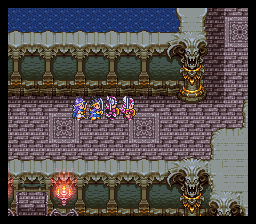

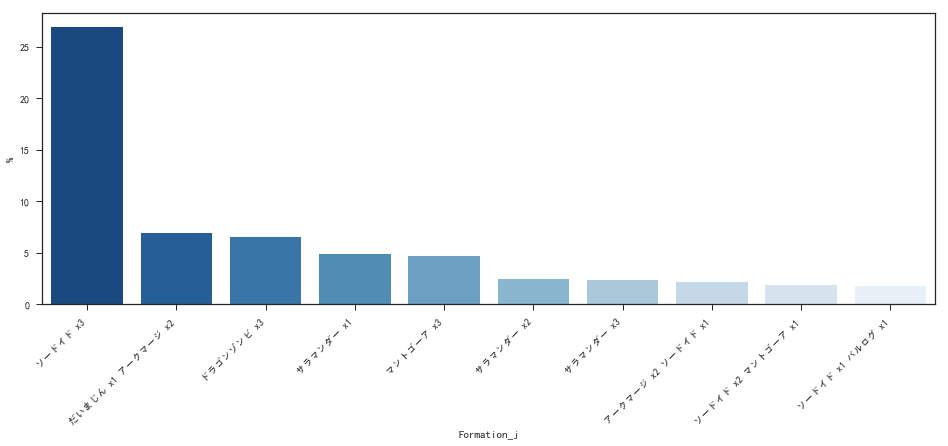

                                Formation_j          %
ソードイド x3                               2693  26.932693
だいまじん x1 アークマージ x2                      689   6.890689
ドラゴンゾンビ x3                              658   6.580658
サラマンダー x1                               487   4.870487
マントゴーア x3                               470   4.700470
サラマンダー x2                               243   2.430243
サラマンダー x3                               240   2.400240
アークマージ x2 ソードイド x1                      214   2.140214
ソードイド x2 マントゴーア x1                      185   1.850185
ソードイド x1 バルログ x1                        181   1.810181
アークマージ x1 ソードイド x1                      180   1.800180
ソードイド x1 バルログ x2                        174   1.740174
アークマージ x1 ソードイド x2                      168   1.680168
アークマージ x1 ソードイド x1 バルログ x1              166   1.660166
ソードイド x1 バルログ x1 マントゴーア x1              163   1.630163
ソードイド x2 バルログ x1                        161   1.610161
ソードイド x2 ドラゴンゾンビ x1                     151   1.510151
アークマージ x1 

**Map Type: Sea**

-----


**To Sioux (1)**

**Overworld zone hex: 0x00**

-----


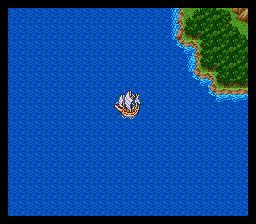

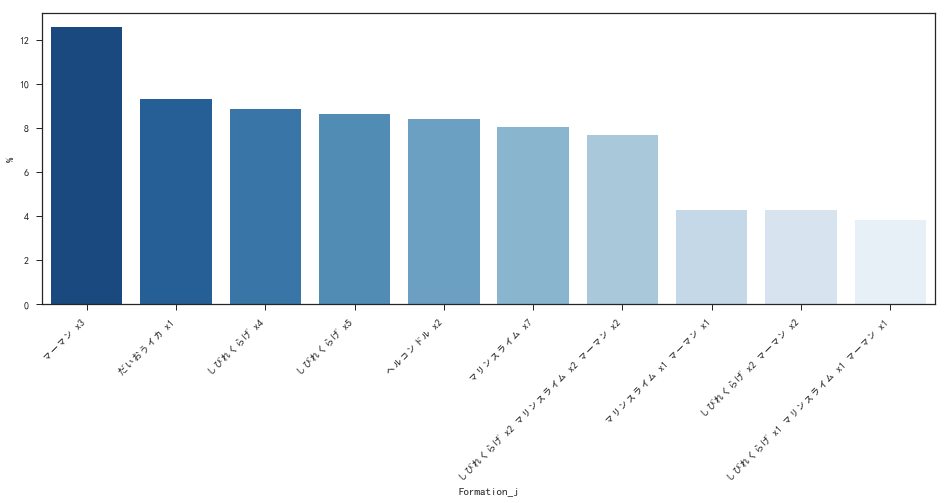

                              Formation_j          %
マーマン x3                              1260  12.601260
だいおうイカ x1                             932   9.320932
しびれくらげ x4                             888   8.880888
しびれくらげ x5                             861   8.610861
ヘルコンドル x2                             841   8.410841
マリンスライム x7                            802   8.020802
しびれくらげ x2 マリンスライム x2 マーマン x2          768   7.680768
マリンスライム x1 マーマン x1                    428   4.280428
しびれくらげ x2 マーマン x2                     427   4.270427
しびれくらげ x1 マリンスライム x1 マーマン x1          384   3.840384
しびれくらげ x1 マリンスライム x1                  378   3.780378
しびれくらげ x4 マリンスライム x4                  333   3.330333
マリンスライム x4 マーマン x2                    331   3.310331
しびれくらげ x1 マーマン x1                     314   3.140314
しびれくらげ x2 マリンスライム x2                  255   2.550255
マリンスライム x2 マーマン x2                    242   2.420242
しびれくらげ x3 マリンスライム x3                  173   1.730173
マリンスライム x3 マーマン x2                    155   1.

**To Sioux (2)**

**Overworld zone hex: 0x00**

-----


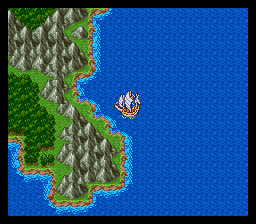

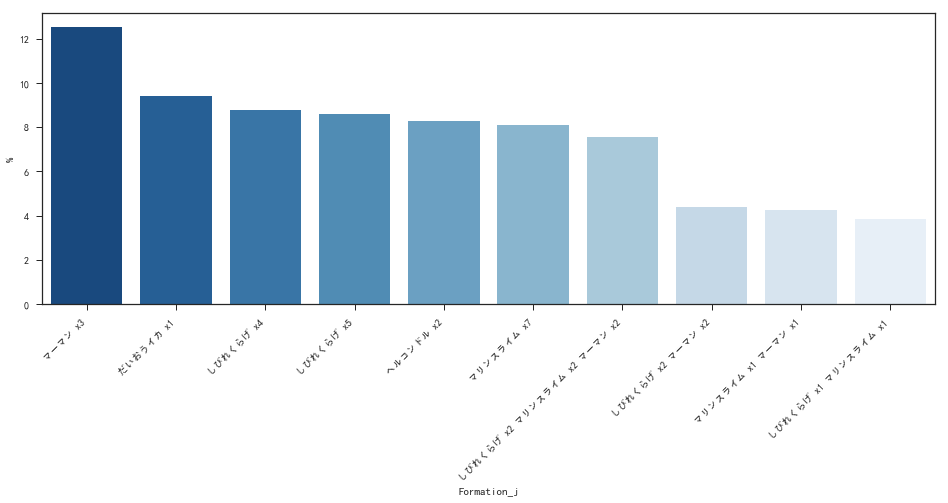

                              Formation_j          %
マーマン x3                              1255  12.551255
だいおうイカ x1                             943   9.430943
しびれくらげ x4                             880   8.800880
しびれくらげ x5                             862   8.620862
ヘルコンドル x2                             829   8.290829
マリンスライム x7                            809   8.090809
しびれくらげ x2 マリンスライム x2 マーマン x2          754   7.540754
しびれくらげ x2 マーマン x2                     441   4.410441
マリンスライム x1 マーマン x1                    427   4.270427
しびれくらげ x1 マリンスライム x1                  383   3.830383
しびれくらげ x1 マリンスライム x1 マーマン x1          372   3.720372
しびれくらげ x4 マリンスライム x4                  338   3.380338
マリンスライム x4 マーマン x2                    331   3.310331
しびれくらげ x1 マーマン x1                     321   3.210321
しびれくらげ x2 マリンスライム x2                  254   2.540254
マリンスライム x2 マーマン x2                    235   2.350235
しびれくらげ x3 マリンスライム x3                  175   1.750175
マリンスライム x3 マーマン x2                    159   1.

**To Necrogond**

**Overworld zone hex: 0x02**

-----


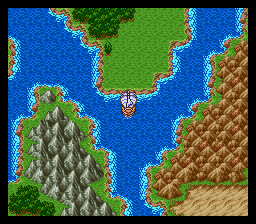

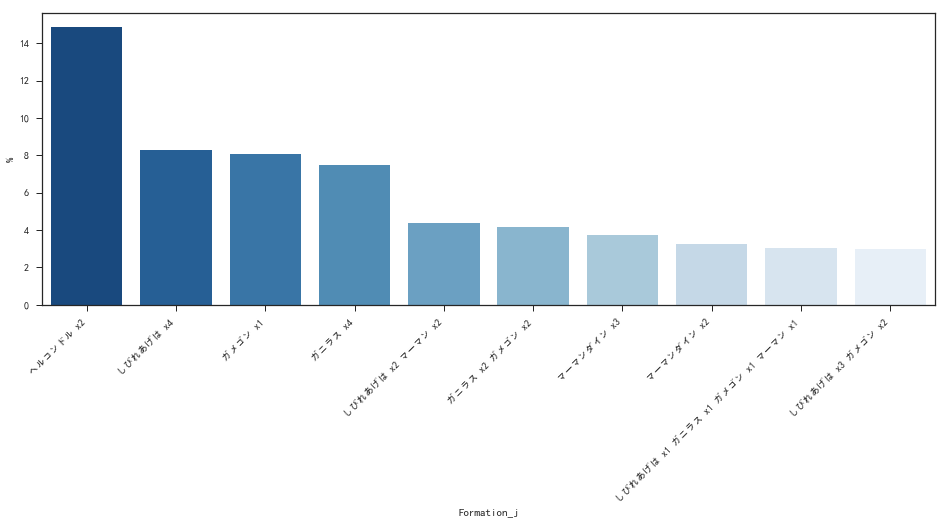

                                   Formation_j          %
ヘルコンドル x2                                 1488  14.881488
しびれあげは x4                                  827   8.270827
ガメゴン x1                                    804   8.040804
ガニラス x4                                    750   7.500750
しびれあげは x2 マーマン x2                          439   4.390439
ガニラス x2 ガメゴン x2                            418   4.180418
マーマンダイン x3                                 370   3.700370
マーマンダイン x2                                 327   3.270327
しびれあげは x1 ガニラス x1 ガメゴン x1 マーマン x1          303   3.030303
しびれあげは x3 ガメゴン x2                          296   2.960296
ガメゴン x2 マーマン x1                            264   2.640264
ガメゴン x1 マーマン x1                            261   2.610261
しびれあげは x2 ガニラス x2                          258   2.580258
ガニラス x1 ガメゴン x1 マーマン x1                    251   2.510251
ガニラス x1 マーマン x2                            248   2.480248
ガニラス x1 マーマン x1                            247   2.470247
ガニラス x1 ガメゴン x

**To Lamia Shrine**

**Overworld zone hex: 0x03**

-----


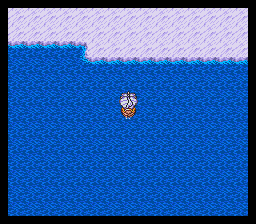

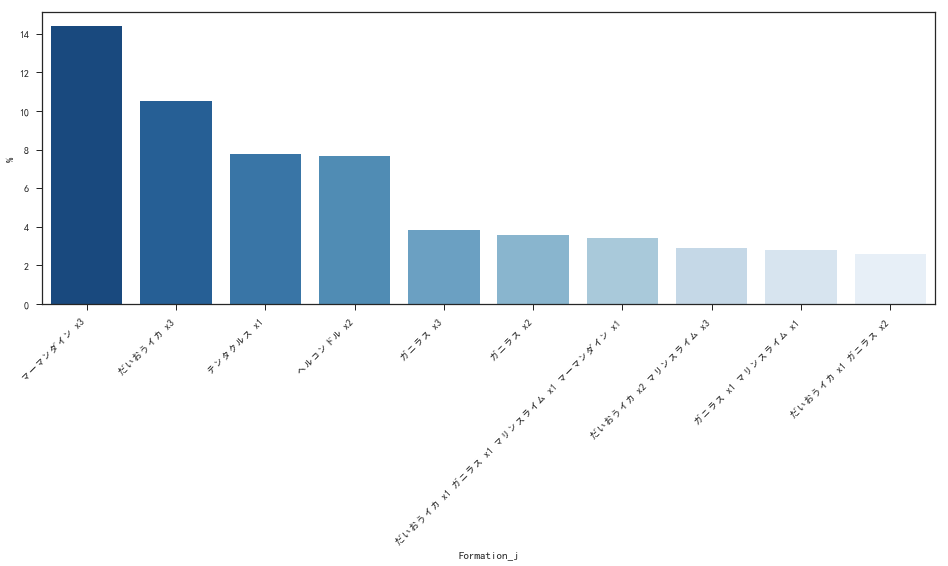

                                         Formation_j          %
マーマンダイン x3                                      1438  14.381438
だいおうイカ x3                                       1050  10.501050
テンタクルス x1                                        776   7.760776
ヘルコンドル x2                                        768   7.680768
ガニラス x3                                          383   3.830383
ガニラス x2                                          355   3.550355
だいおうイカ x1 ガニラス x1 マリンスライム x1 マーマンダイン x1          343   3.430343
だいおうイカ x2 マリンスライム x3                             290   2.900290
ガニラス x1 マリンスライム x1                               282   2.820282
だいおうイカ x1 ガニラス x2                                259   2.590259
ガニラス x2 マーマンダイン x1                               247   2.470247
だいおうイカ x1 ガニラス x1 マーマンダイン x1                     247   2.470247
マリンスライム x1 マーマンダイン x1                            226   2.260226
ガニラス x1 マーマンダイン x1                               218   2.180218
だいおうイカ x1 ガニラス x1                       

**Dark World (1)**

**Overworld zone hex: 0x00**

-----


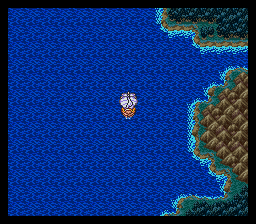

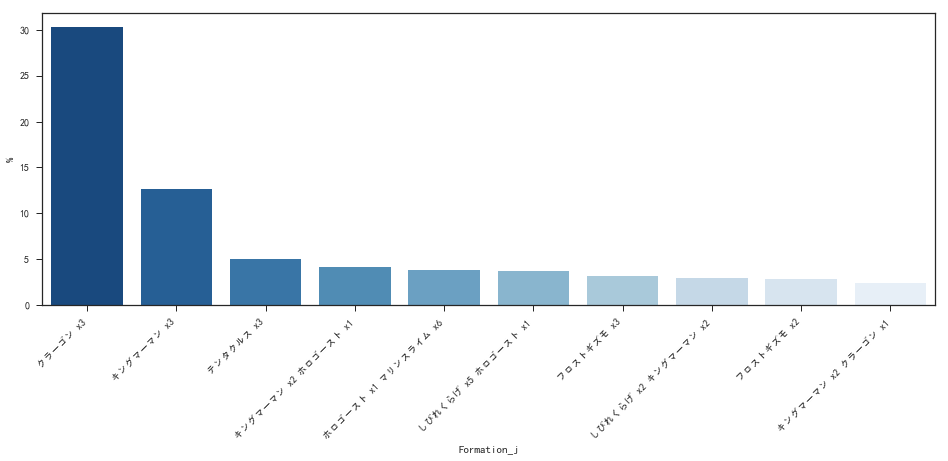

                                            Formation_j          %
クラーゴン x3                                           3034  30.343034
キングマーマン x3                                         1264  12.641264
テンタクルス x3                                           502   5.020502
キングマーマン x2 ホロゴースト x1                                413   4.130413
ホロゴースト x1 マリンスライム x6                                384   3.840384
しびれくらげ x5 ホロゴースト x1                                 369   3.690369
フロストギズモ x3                                          318   3.180318
しびれくらげ x2 キングマーマン x2                                295   2.950295
フロストギズモ x2                                          280   2.800280
キングマーマン x2 クラーゴン x1                                 232   2.320232
しびれくらげ x1 キングマーマン x1                                214   2.140214
キングマーマン x1 マリンスライム x1                               178   1.780178
キングマーマン x2 マリンスライム x4                               166   1.660166
しびれくらげ x1 マリンスライム x1                                153   1.53

**Dark World (2)**

**Overworld zone hex: 0x00**

-----


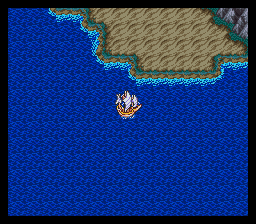

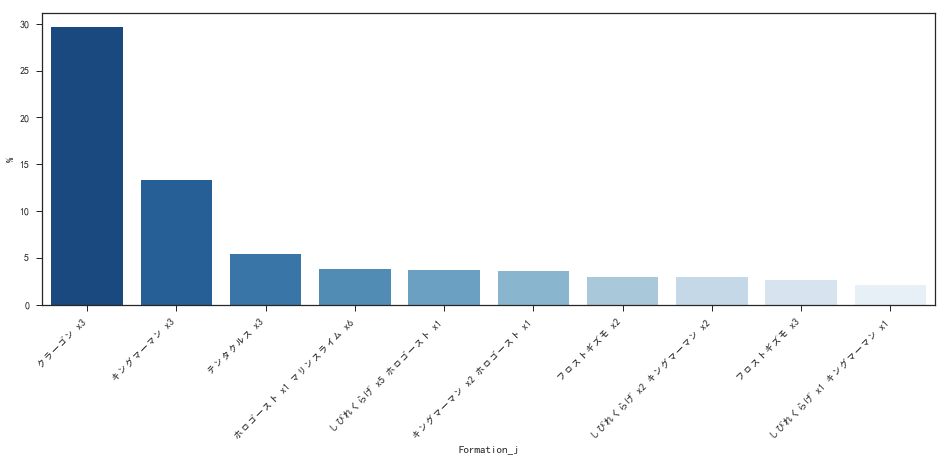

                                            Formation_j          %
クラーゴン x3                                           2965  29.652965
キングマーマン x3                                         1329  13.291329
テンタクルス x3                                           536   5.360536
ホロゴースト x1 マリンスライム x6                                377   3.770377
しびれくらげ x5 ホロゴースト x1                                 375   3.750375
キングマーマン x2 ホロゴースト x1                                361   3.610361
フロストギズモ x2                                          297   2.970297
しびれくらげ x2 キングマーマン x2                                295   2.950295
フロストギズモ x3                                          264   2.640264
しびれくらげ x1 キングマーマン x1                                206   2.060206
キングマーマン x2 クラーゴン x1                                 204   2.040204
しびれくらげ x1 マリンスライム x1                                190   1.900190
キングマーマン x1 マリンスライム x1                               187   1.870187
キングマーマン x2 マリンスライム x4                               167   1.67

In [3]:
#call_all_plots(df, maptypes_list, 'en')
call_all_plots(df, maptypes_list, 'jp')

## Initial encounter threshold

Encounter threshold refers to the initial value set for how many steps a new encounter will take place. This is set when entering a new area, entering a battle (thereby setting the next value for when the battle is over), or some other misc. means including using the lamp of darkness to change the time, thereby resetting this value. 

Depletion occurs by taking steps in areas with encounters, primarily overworld land, water/sea areas, and dungeons. Every area has a specific depletion rate for the type of tile (forest/field/mountain/sea, and dungeons), which may or may not align 1:1 between areas. For example, sea encounters have varying encounter rates depending on the area. The Sage skill Tiptoe/Shinobi Feet will influence depletion across all tile depletion rates.  

A 1:1 relationship exists between encounter depletion from walking & the likelihood of getting an encounter - therefore in layman's terms, the higher the initial value, the more amount of steps the player can take before getting into a fight. This is important for RTA, because it may influence the player's choices when trying to force an encounter or dodge it altogether. 

As stated before, this value exists at the 2-byte RAM address 0x00F796. Only the low byte (0x00F797) is set, but depletion occurs on both bytes.

The goal of what's presented here is to briefly show distribution of encounter thresholds. A more rigorous analysis dedicated to RTA routes & likelihood of encounters may be worthwhile. 

The below two charts demonstrate the results of logging starting threshold values at 8 different areas, polled at 10,000 encounters for each area, therefore 80,000 encounters. Note that these numbers are integers, not hexadecimal. The results are very straightforward (again, based off of this sample):
* Encounters appear to follow a normal distribution around the mean, which appears to be 24. 
* The range of starting thresholds appears to be between 1 and 48
* All areas (which vary in map type (overworld/sea/dungeon)) appear to use the same initial value threshold algorithm

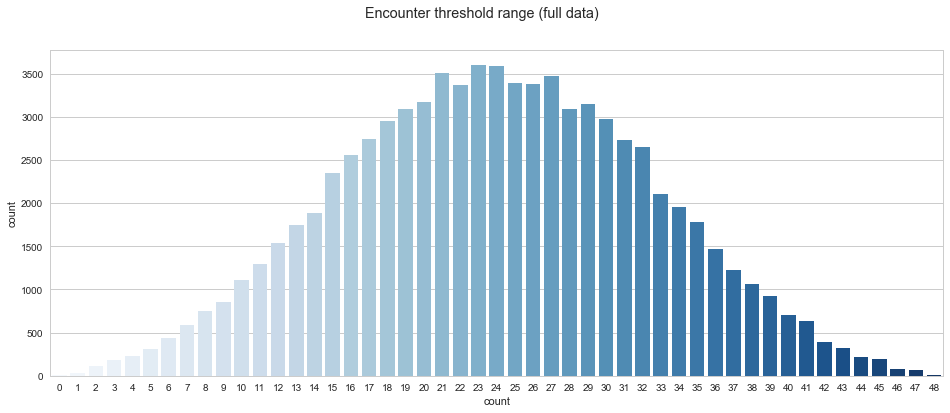

In [4]:
plot_thresholds(df_walks)

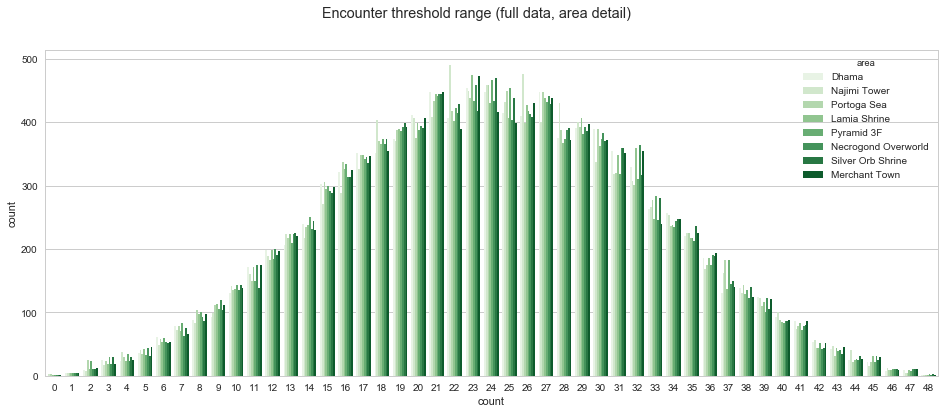

In [5]:
plot_thresholds_2(df_walks)

## To-do list

This will serve as a list of requests or areas to investigate:

* Investigate day/night in some dungeons, specifically Najimi Tower and Garuna Tower

## Special Thanks

* Kirkq for intially helping me get started with some Lua scripts regarding encounter zones & depletion, which I reused for this analysis
* Pinkus for supplying an easily accessible list of the English monster names
* EvilAsh, RAI-san, Pop-san and Maru-san for reviewing these documents and suggesting updates